# Imported libraries

In [67]:
# Make sure numpy is latest stable for Python 3.9
#!pip install --upgrade numpy==1.26.4

# Reinstall pmdarima freshly against the updated numpy
#!pip install --upgrade --force-reinstall pmdarima==2.0.4

In [68]:
!pip install arch

In [69]:
# Import required libraries
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from scipy import stats
import math
import matplotlib.colors as mcolors
from scipy.stats import pearsonr
from IPython.display import display
import warnings

# Stats/econometrics
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM, select_order as vecm_select_order
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR

#from pmdarima.arima import auto_arima
#import pmdarima
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [70]:
#print("NumPy:", np.__version__)
#print("pmdarima:", pmdarima.__version__)

In [71]:
print(list(mcolors.CSS4_COLORS.keys())[:120])

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

# FTSE100 Index

In [72]:
# Specify the start and end dates for the analysis period.
START_DATE = '1985-01-01'
END_DATE = '2024-12-31'

# Download FTSE100 data
print(f"Downloading historical data for FTSE100 from {START_DATE} to {END_DATE}...")
try:
    # The 'progress=Trye' argument displays the download progress bar.
    index_df = yf.download('^FTSE', start=START_DATE, end=END_DATE, progress=True)
    print("Download complete.")
except Exception as e:
    print(f"Error downloading data: {e}")
    # Exit if data download fails to prevent further errors.
    exit()

/tmp/ipython-input-948704596.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  index_df = yf.download('^FTSE', start=START_DATE, end=END_DATE, progress=True)
[*********************100%***********************]  1 of 1 completed

Download complete.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Data Cleaning and Inspection

In [73]:
# Data Inspection and Cleaning
print(index_df.head())
print(index_df.tail())

Price             Close         High          Low         Open Volume
Ticker            ^FTSE        ^FTSE        ^FTSE        ^FTSE  ^FTSE
Date                                                                 
1985-01-02  1220.000000  1230.400024  1220.000000  1230.400024      0
1985-01-03  1206.099976  1208.199951  1199.599976  1208.199951      0
1985-01-04  1214.599976  1215.699951  1204.699951  1206.099976      0
1985-01-07  1229.000000  1229.000000  1212.599976  1214.599976      0
1985-01-08  1243.500000  1243.500000  1233.199951  1233.199951      0
Price             Close         High          Low         Open      Volume
Ticker            ^FTSE        ^FTSE        ^FTSE        ^FTSE       ^FTSE
Date                                                                      
2024-12-20  8084.600098  8105.799805  8002.299805  8105.299805  1608807700
2024-12-23  8102.700195  8111.399902  8051.899902  8084.600098   573891100
2024-12-24  8137.000000  8152.000000  8102.700195  8102.700195   

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [74]:
# Show summary statistics (count, mean, std, min, quartiles, max) for each column in the DataFrame
index_df.describe()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Price          Close          High           Low          Open        Volume
Ticker         ^FTSE         ^FTSE         ^FTSE         ^FTSE         ^FTSE
count   10102.000000  10102.000000  10102.000000  10102.000000  1.010200e+04
mean     4999.401752   5030.177620   4967.220611   4999.011532  6.830620e+08
std      1942.521384   1953.830046   1931.243832   1942.539682  6.267578e+08
min      1206.099976   1208.199951   1199.599976   1206.099976  0.000000e+00
25%      3216.924988   3234.600098   3204.024902   3214.175049  0.000000e+00
50%      5476.550049   5522.649902   5424.500000   5477.000000  6.874204e+08
75%      6547.674805   6586.050049   6505.550171   6547.674805  1.067821e+09
max      8445.799805   8474.400391   8427.900391   8445.799805  4.420947e+09

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [75]:
# Display DataFrame structure: index type, column names, non-null counts, and data types
index_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10102 entries, 1985-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^FTSE)   10102 non-null  float64
 1   (High, ^FTSE)    10102 non-null  float64
 2   (Low, ^FTSE)     10102 non-null  float64
 3   (Open, ^FTSE)    10102 non-null  float64
 4   (Volume, ^FTSE)  10102 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 473.5 KB


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [76]:
print("Counting zero and NaN values for each column:")
# Create a dictionary to store the counts
counts_missing_data = {}

for col in index_df.columns:
    zero_count = (index_df[col] == 0).sum()
    nan_count = index_df[col].isnull().sum()

    # Store counts in the dictionary
    counts_missing_data[col] = {'Zero Count': zero_count, 'NaN Count': nan_count}

    # Print the counts (as requested)
    print(f"Column '{col}':")
    print(f"  Zero count: {zero_count}")
    print(f"  NaN count: {nan_count}")

# Create a DataFrame from the counts data for table display
counts_missing_data = pd.DataFrame.from_dict(counts_missing_data, orient='index')

print("\nSummary Table of Zero and NaN Counts:")
# Display the table
display(counts_missing_data)

Counting zero and NaN values for each column:
Column '('Close', '^FTSE')':
  Zero count: 0
  NaN count: 0
Column '('High', '^FTSE')':
  Zero count: 0
  NaN count: 0
Column '('Low', '^FTSE')':
  Zero count: 0
  NaN count: 0
Column '('Open', '^FTSE')':
  Zero count: 0
  NaN count: 0
Column '('Volume', '^FTSE')':
  Zero count: 3538
  NaN count: 0

Summary Table of Zero and NaN Counts:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Zero Count  NaN Count
Close  ^FTSE           0          0
High   ^FTSE           0          0
Low    ^FTSE           0          0
Open   ^FTSE           0          0
Volume ^FTSE        3538          0

In [77]:
# Check occurrence dates for zero values in each column
print("\nOccurrence dates for zero values in each column:")

for col in index_df.columns:
    zero_dates = index_df[index_df[col] == 0].index

    if not zero_dates.empty:
        first_zero_date = zero_dates[0]
        last_zero_date = zero_dates[-1]
        print(f"\nColumn '{col}':")
        print(f"  First zero value on: {first_zero_date}")
        print(f"  Last zero value on: {last_zero_date}")
        # display(zero_dates)  # shows all dates (can limit with .to_list()[:10] if too many)
    else:
        print(f"\nColumn '{col}': No zero values found.")

# Check occurrence dates for NaN values in each column
print("\nOccurrence dates for NaN values in each column:")

for col in index_df.columns:
    nan_dates = index_df.index[index_df[col].isnull()]

    if not nan_dates.empty:
        first_nan_date = nan_dates[0]
        last_nan_date = nan_dates[-1]
        print(f"\nColumn '{col}':")
        print(f"  First NaN value on: {first_nan_date}")
        print(f"  Last NaN value on: {last_nan_date}")
        display(nan_dates)
    else:
        print(f"\nColumn '{col}': No NaN values found.")


Occurrence dates for zero values in each column:

Column '('Close', '^FTSE')': No zero values found.

Column '('High', '^FTSE')': No zero values found.

Column '('Low', '^FTSE')': No zero values found.

Column '('Open', '^FTSE')': No zero values found.

Column '('Volume', '^FTSE')':
  First zero value on: 1985-01-02 00:00:00
  Last zero value on: 2024-07-01 00:00:00

Occurrence dates for NaN values in each column:

Column '('Close', '^FTSE')': No NaN values found.

Column '('High', '^FTSE')': No NaN values found.

Column '('Low', '^FTSE')': No NaN values found.

Column '('Open', '^FTSE')': No NaN values found.

Column '('Volume', '^FTSE')': No NaN values found.


In [78]:
# Make a copy of the original DataFrame
missing_data_df = index_df.copy()

# Mask for rows with any zero values
zero_mask = (missing_data_df  == 0).any(axis=1)

# Mask for rows with any NaN values
nan_mask = missing_data_df .isnull().any(axis=1)

# Combine both masks
problem_mask = zero_mask | nan_mask

# Create a new DataFrame with only problematic rows
missing_data_df = missing_data_df.loc[problem_mask].copy()

# Print the shape (rows, columns) of the DataFrame containing zero/NaN rows
print("Shape of DataFrame with zero/NaN rows:", missing_data_df .shape)
display(missing_data_df .head(10))  # show first 10 rows
display(missing_data_df .tail(10))  # show last 10 rows

Shape of DataFrame with zero/NaN rows: (3538, 5)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Price             Close         High          Low         Open Volume
Ticker            ^FTSE        ^FTSE        ^FTSE        ^FTSE  ^FTSE
Date                                                                 
1985-01-02  1220.000000  1230.400024  1220.000000  1230.400024      0
1985-01-03  1206.099976  1208.199951  1199.599976  1208.199951      0
1985-01-04  1214.599976  1215.699951  1204.699951  1206.099976      0
1985-01-07  1229.000000  1229.000000  1212.599976  1214.599976      0
1985-01-08  1243.500000  1243.500000  1233.199951  1233.199951      0
1985-01-09  1259.199951  1259.199951  1247.099976  1247.099976      0
1985-01-10  1261.000000  1263.900024  1252.900024  1259.199951      0
1985-01-11  1248.599976  1265.300049  1240.900024  1261.000000      0
1985-01-14  1220.500000  1233.400024  1220.500000  1233.400024      0
1985-01-15  1233.199951  1233.199951  1223.500000  1223.500000      0

Price             Close         High          Low         Open Volume
Ticker            ^FTSE        ^FTSE        ^FTSE        ^FTSE  ^FTSE
Date                                                                 
1998-12-16  5630.399902  5636.799805  5568.399902  5576.399902      0
1998-12-17  5685.200195  5685.500000  5591.100098  5634.899902      0
1998-12-18  5741.899902  5772.100098  5674.000000  5689.600098      0
1998-12-21  5876.500000  5892.299805  5736.100098  5736.899902      0
1998-12-22  5843.299805  5893.299805  5825.200195  5871.100098      0
1998-12-23  5908.799805  5908.799805  5835.899902  5835.899902      0
1998-12-24  5867.200195  5911.500000  5867.100098  5909.399902      0
1998-12-29  5941.500000  5970.100098  5873.399902  5873.399902      0
1998-12-30  5882.600098  5944.899902  5809.000000  5932.700195      0
2024-07-01  8166.799805  8225.099609  8164.100098  8164.100098      0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [79]:
# Keep only the 'Close' column from the DataFrame
index_df = index_df.loc[:, ['Close']]

# Calculate simple returns as percentage change in Closing Price from the previous day
index_df['Simple_Return'] = index_df['Close'].pct_change()

# Calculate log returns using the natural log of price ratio (today / yesterday)
index_df['Log_Return'] = np.log(index_df['Close'] / index_df['Close'].shift(1))

# Other method:
#if 'Simple_Return' not in index_df.columns:
#    index_df['Simple_Return'] = index_df['Closing_Price'].pct_change()

#if 'Log_Return' not in index_df.columns:
#    index_df['Log_Return'] = np.log(index_df['Close'] / index_df['Close'].shift(1))
#    # Optional: index_df['Log_Return'] = np.log(index_df['Closing_Price']).diff()

# Remove rows with missing values (first row will be NaN after return calculation)
index_df.dropna(inplace=True)

# Show cleaned-up DataFrame
print(index_df.head(10))

Price             Close Simple_Return Log_Return
Ticker            ^FTSE                         
Date                                            
1985-01-03  1206.099976     -0.011393  -0.011459
1985-01-04  1214.599976      0.007048   0.007023
1985-01-07  1229.000000      0.011856   0.011786
1985-01-08  1243.500000      0.011798   0.011729
1985-01-09  1259.199951      0.012626   0.012547
1985-01-10  1261.000000      0.001430   0.001428
1985-01-11  1248.599976     -0.009833  -0.009882
1985-01-14  1220.500000     -0.022505  -0.022762
1985-01-15  1233.199951      0.010406   0.010352
1985-01-16  1254.099976      0.016948   0.016806


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [80]:
# Ensure 'Date' is a column (not an index)
index_df = index_df.reset_index()

# Flatten MultiIndex columns if they exist (e.g., ('Close','^FTSE') → 'Close_^FTSE')
if isinstance(index_df.columns, pd.MultiIndex):
    index_df.columns = ['_'.join(col).strip() for col in index_df.columns.values]

# Rename columns to clean, consistent names
index_df.rename(columns={
    'Date_': 'Date',                 # Standardize date column name
    'Close_^FTSE': 'Closing_Price', # FTSE closing price
    'Simple_Return_': 'Simple_Return',
    'Log_Return_': 'Log_Return'
}, inplace=True)

# Preview the first 5 rows of the cleaned DataFrame
display(index_df.head())

# Convert 'Date' column to datetime format (important for time series analysis)
index_df['Date'] = pd.to_datetime(index_df['Date'])

# Count the number of unique years covered in the dataset
num_years = index_df['Date'].dt.year.nunique()

# Print the total number of years represented
print(f"Number of years in the DataFrame: {num_years}")

Date  Closing_Price  Simple_Return  Log_Return
0 1985-01-03    1206.099976      -0.011393   -0.011459
1 1985-01-04    1214.599976       0.007048    0.007023
2 1985-01-07    1229.000000       0.011856    0.011786
3 1985-01-08    1243.500000       0.011798    0.011729
4 1985-01-09    1259.199951       0.012626    0.012547

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Number of years in the DataFrame: 40


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Visualization

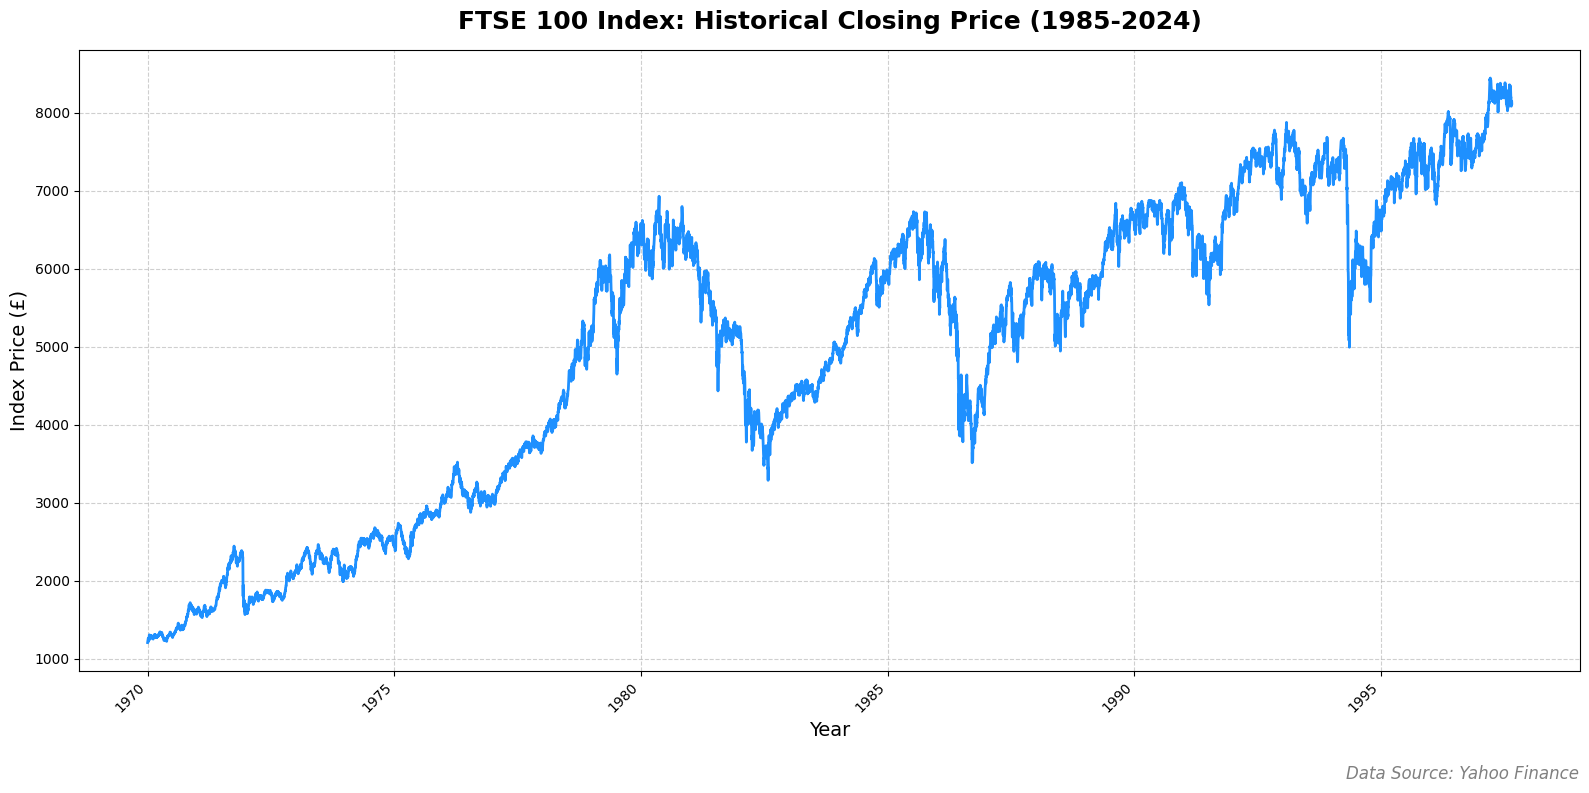

In [81]:
# Create the figure and axes for the plot
fig1, ax1 = plt.subplots(figsize=(16, 8))

# Plot the 'Close' price, which is the correct column name
ax1.plot(index_df.index, index_df['Closing_Price'], color='dodgerblue', linewidth=2)

# Set the title and axis labels
ax1.set_title('FTSE 100 Index: Historical Closing Price (1985-2024)', fontsize=18, fontweight='bold', pad=15, ha='center')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Index Price (£)', fontsize=14)

# Customize the x-axis for better readability
ax1.xaxis.set_major_locator(mdates.YearLocator(5))              # Tick every 5 years
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))       # Format as YYYY
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')        # Rotate labels nicely

# Add a grid and a caption for context
ax1.grid(True, which='major', linestyle='--', alpha=0.6)
fig1.text(0.99, 0.02, 'Data Source: Yahoo Finance',
         ha='right', fontsize=12, style='italic', color='gray')

# Layout adjustment
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space at bottom
plt.show()

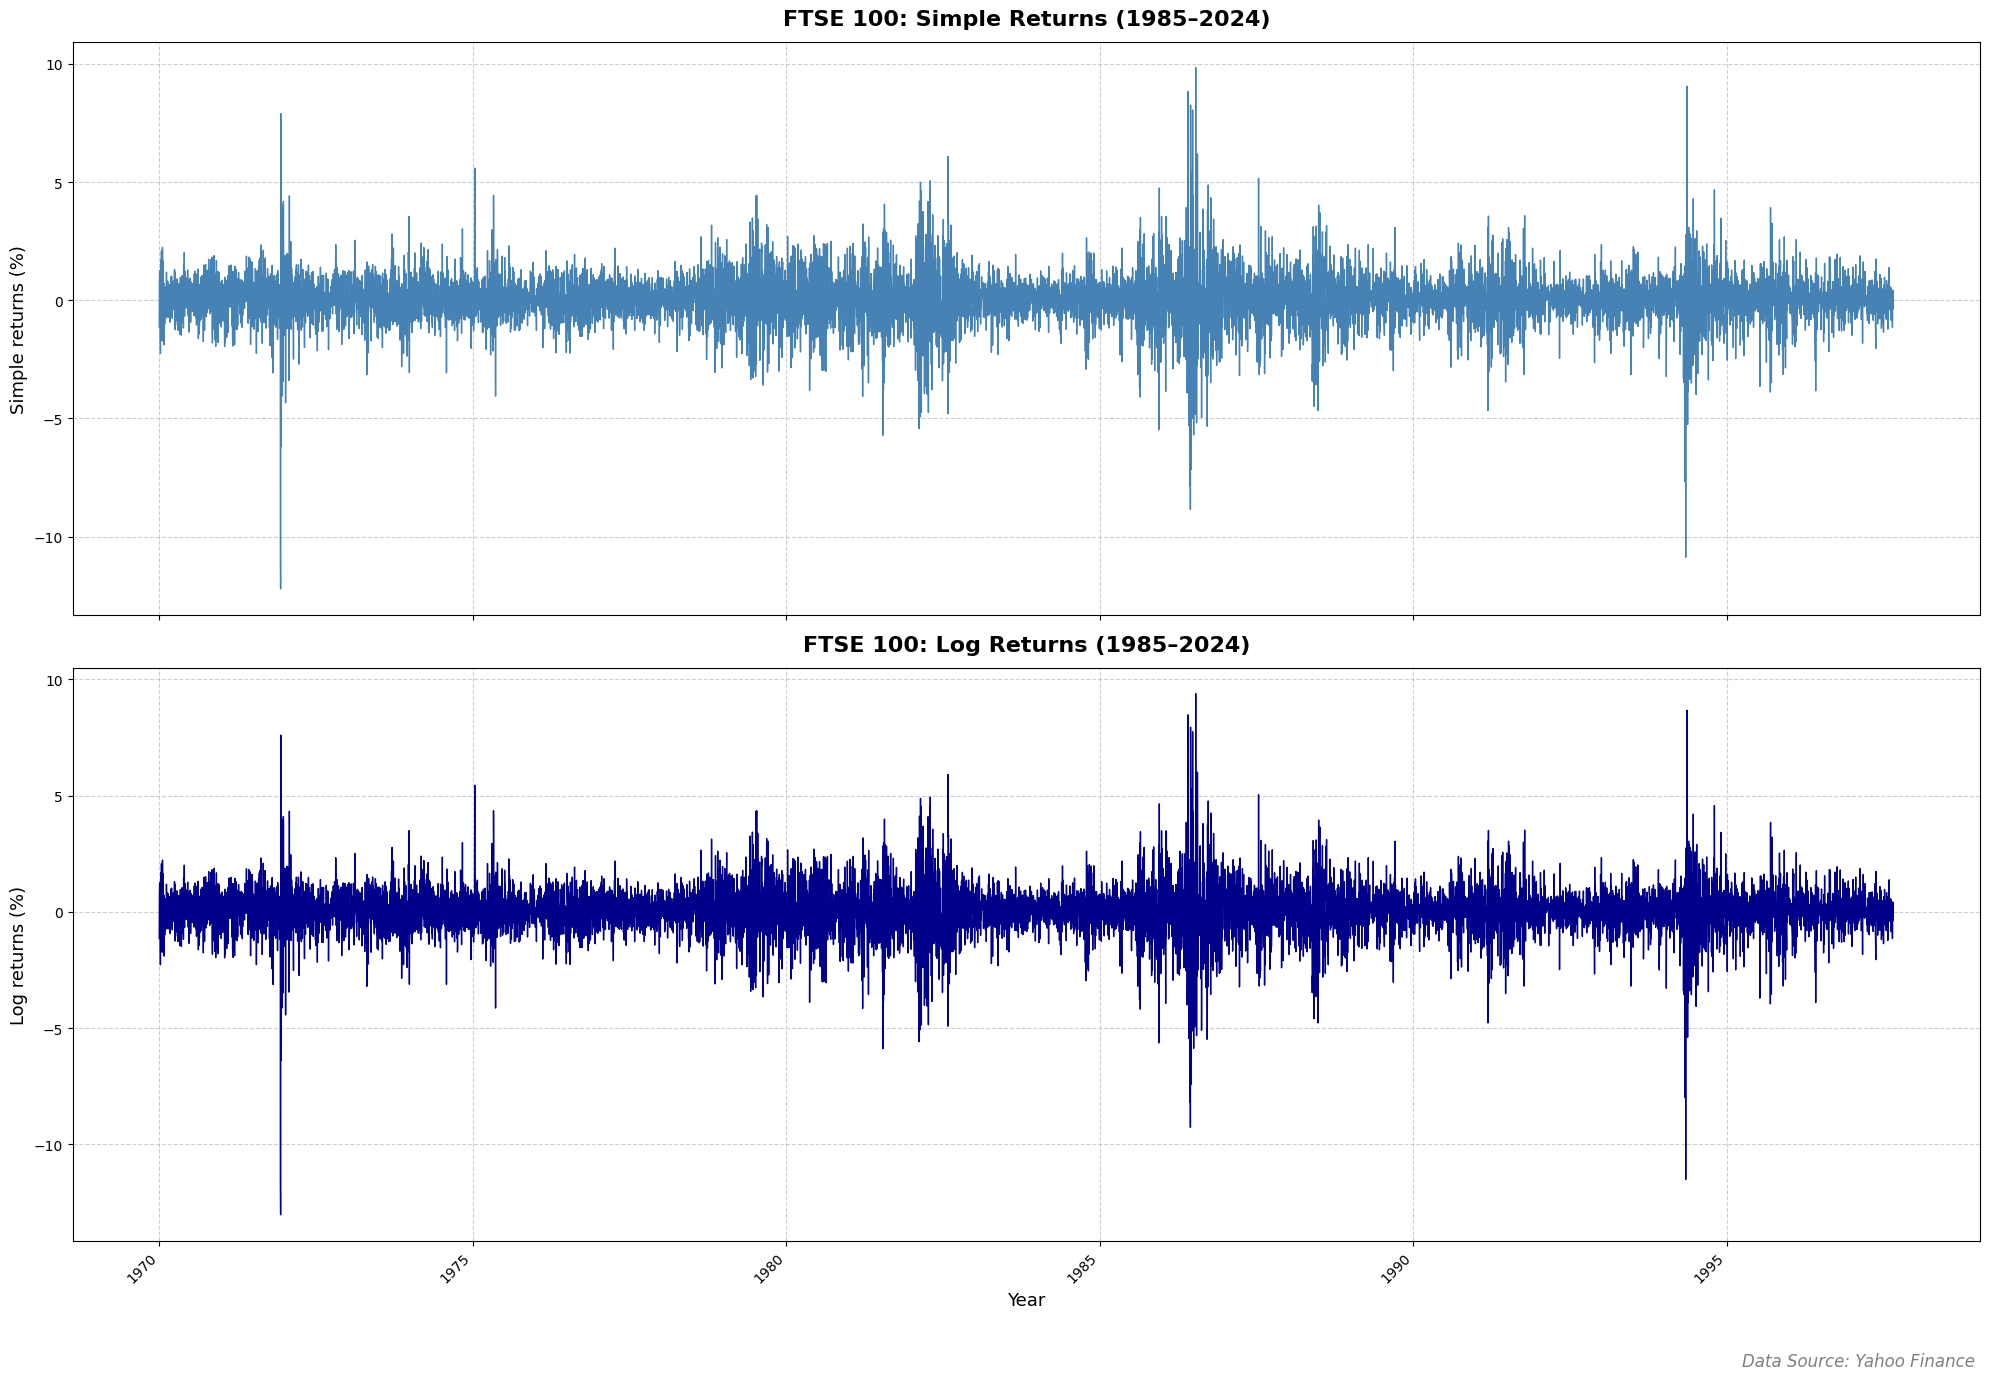

In [82]:
# Create the figure and axes for the plot
fig2, ax2 = plt.subplots(2, 1, figsize=(20, 14), sharex=True)

# Simple returns (convert to %)
ax2[0].plot(index_df.index, index_df['Simple_Return'] * 100, color='steelblue', linewidth=1)
ax2[0].set_title('FTSE 100: Simple Returns (1985–2024)', fontsize=16, fontweight='bold', pad=12)
ax2[0].set_ylabel('Simple returns (%)', fontsize=13)
ax2[0].grid(True, linestyle='--', alpha=0.6)

# Log returns (convert to %)
ax2[1].plot(index_df.index, index_df['Log_Return'] * 100, color='darkblue', linewidth=1)
ax2[1].set_title('FTSE 100: Log Returns (1985–2024)', fontsize=16, fontweight='bold', pad=12)
ax2[1].set_xlabel('Year', fontsize=13)
ax2[1].set_ylabel('Log returns (%)', fontsize=13)
ax2[1].grid(True, linestyle='--', alpha=0.6)

# Customize the x-axis for better readability
ax2[1].xaxis.set_major_locator(mdates.YearLocator(5))          # Tick every 5 years
ax2[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   # Format YYYY
plt.setp(ax2[1].get_xticklabels(), rotation=45, ha='right')    # Rotate label

# Add a caption for context
fig2.text(0.99, 0.02, 'Data Source: Yahoo Finance',
         ha='right', fontsize=12, style='italic', color='gray')

# Layout adjustment
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space at bottom for caption
plt.show()

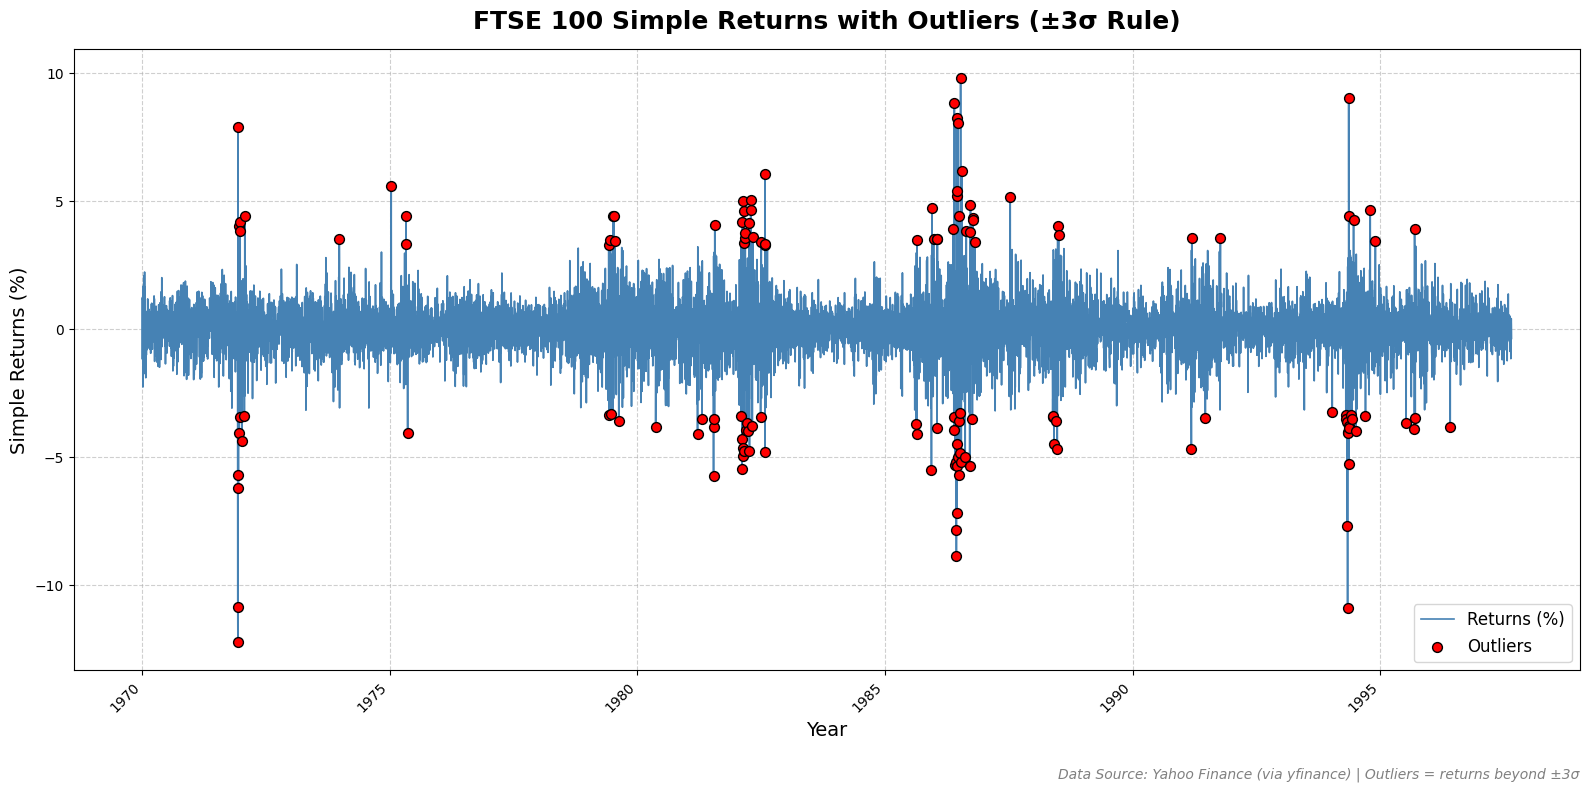

In [83]:
# --- Outlier Detection in FTSE Simple Returns (3σ Rule) ---

# Mean and standard deviation of simple returns
mean_simple_rtn = index_df['Simple_Return'].mean()
std_simple_rtn = index_df['Simple_Return'].std()

# Identify outliers: returns beyond ±3 standard deviations
threshold = 3 * std_simple_rtn
outliers = index_df[(index_df['Simple_Return'] > mean_simple_rtn + threshold) |
                    (index_df['Simple_Return'] < mean_simple_rtn - threshold)]

# Create the figure and axes for the plot
fig3, ax3 = plt.subplots(figsize=(16, 8))

# Plot all returns (blue line)
ax3.plot(index_df.index, index_df['Simple_Return'] * 100,
        color='steelblue', linewidth=1.2, label='Returns (%)')

# Highlight outliers (red scatter points)
ax3.scatter(outliers.index, outliers['Simple_Return'] * 100,
           color='red', edgecolor='black', s=50, zorder=3, label='Outliers')

# Titles and labels
ax3.set_title("FTSE 100 Simple Returns with Outliers (±3σ Rule)", fontsize=18, fontweight='bold', pad=15)
ax3.set_xlabel("Year", fontsize=14)
ax3.set_ylabel("Simple Returns (%)", fontsize=14)

# Customize the x-axis for better readability
ax3.xaxis.set_major_locator(mdates.YearLocator(5))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')

# Grid, legend, caption
ax3.grid(True, linestyle='--', alpha=0.6)
ax3.legend(loc='lower right', fontsize=12, frameon=True)
fig3.text(0.99, 0.02, 'Data Source: Yahoo Finance (via yfinance) | Outliers = returns beyond ±3σ',
         ha='right', fontsize=10, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

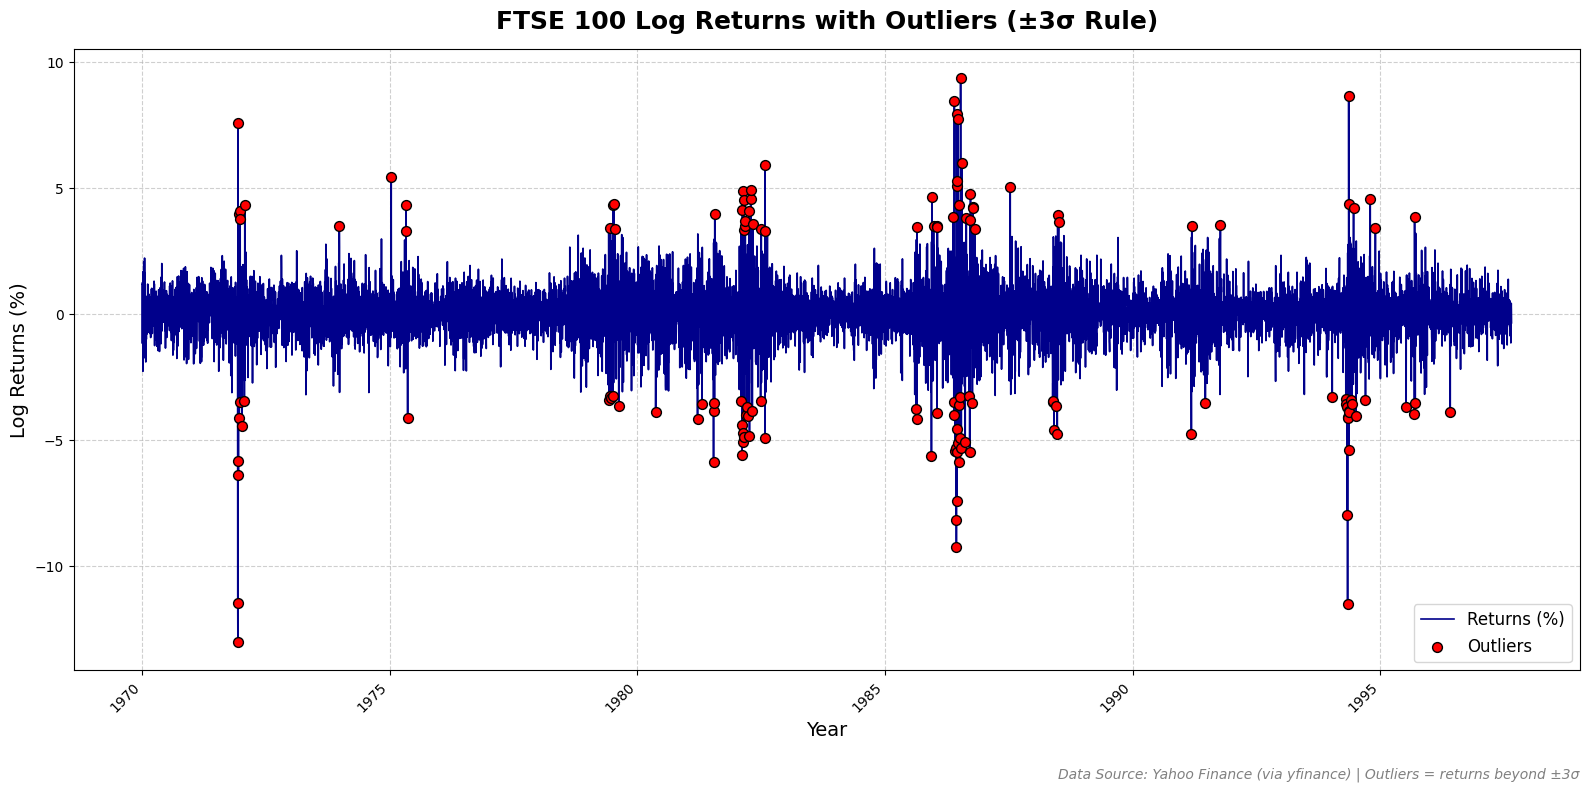

In [84]:
# --- Outlier Detection in FTSE Log Returns (3σ Rule) ---

# Mean and standard deviation of simple returns
mean_log_rtn = index_df['Log_Return'].mean()
std_log_rtn = index_df['Log_Return'].std()

# Identify outliers: returns beyond ±3 standard deviations
threshold = 3 * std_log_rtn
outliers = index_df[(index_df['Log_Return'] > mean_log_rtn + threshold) |
                    (index_df['Log_Return'] < mean_log_rtn - threshold)]

# Create the figure and axes for the plot
fig3, ax3 = plt.subplots(figsize=(16, 8))

# Plot all returns (blue line)
ax3.plot(index_df.index, index_df['Log_Return'] * 100,
        color='darkblue', linewidth=1.2, label='Returns (%)')

# Highlight outliers (red scatter points)
ax3.scatter(outliers.index, outliers['Log_Return'] * 100,
           color='red', edgecolor='black', s=50, zorder=3, label='Outliers')

# Titles and labels
ax3.set_title("FTSE 100 Log Returns with Outliers (±3σ Rule)", fontsize=18, fontweight='bold', pad=15)
ax3.set_xlabel("Year", fontsize=14)
ax3.set_ylabel("Log Returns (%)", fontsize=14)

# Customize the x-axis for better readability
ax3.xaxis.set_major_locator(mdates.YearLocator(5))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')

# Grid, legend, caption
ax3.grid(True, linestyle='--', alpha=0.6)
ax3.legend(loc='lower right', fontsize=12, frameon=True)
fig3.text(0.99, 0.02, 'Data Source: Yahoo Finance (via yfinance) | Outliers = returns beyond ±3σ',
         ha='right', fontsize=10, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [85]:
# Cumulative return from simple returns
# Formula: (1 + r1) * (1 + r2) * ... * (1 + rn) - 1
index_df['Cumulative_Simple_Return'] = (1 + index_df['Simple_Return']).cumprod() - 1

# Cumulative return from log returns
# Formula: exp(sum of log returns) - 1
index_df['Cumulative_Log_Return'] = np.exp(index_df['Log_Return'].cumsum()) - 1

# Show the first few rows
print(index_df[['Date', 'Closing_Price', 'Simple_Return', 'Log_Return',
                'Cumulative_Simple_Return', 'Cumulative_Log_Return']].head(10))

        Date  Closing_Price  Simple_Return  Log_Return  \
0 1985-01-03    1206.099976      -0.011393   -0.011459   
1 1985-01-04    1214.599976       0.007048    0.007023   
2 1985-01-07    1229.000000       0.011856    0.011786   
3 1985-01-08    1243.500000       0.011798    0.011729   
4 1985-01-09    1259.199951       0.012626    0.012547   
5 1985-01-10    1261.000000       0.001430    0.001428   
6 1985-01-11    1248.599976      -0.009833   -0.009882   
7 1985-01-14    1220.500000      -0.022505   -0.022762   
8 1985-01-15    1233.199951       0.010406    0.010352   
9 1985-01-16    1254.099976       0.016948    0.016806   

   Cumulative_Simple_Return  Cumulative_Log_Return  
0                 -0.011393              -0.011393  
1                 -0.004426              -0.004426  
2                  0.007377               0.007377  
3                  0.019262               0.019262  
4                  0.032131               0.032131  
5                  0.033607               0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


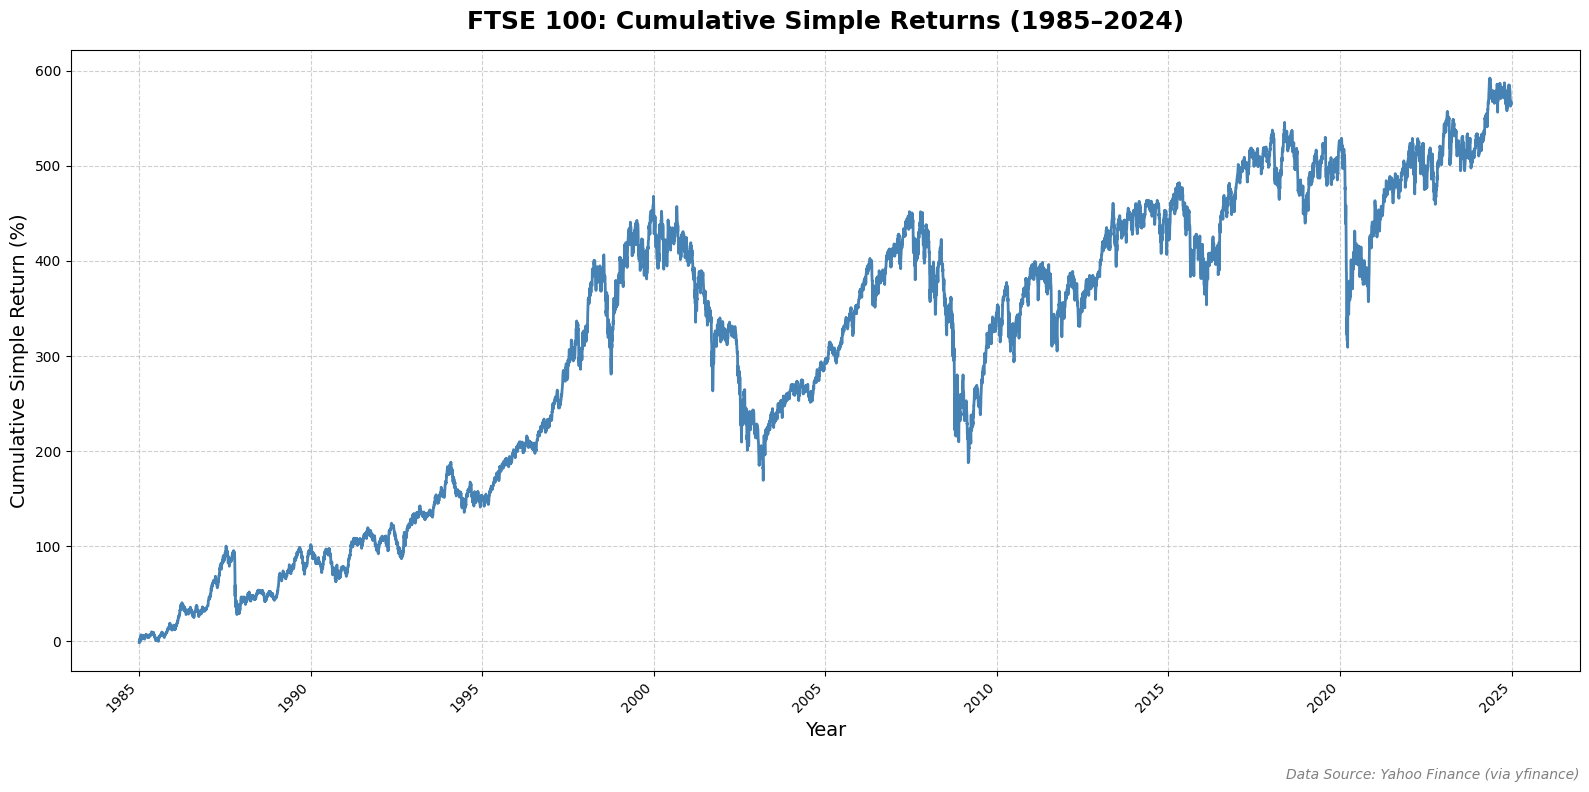

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [86]:
# Ensure 'Date' is datetime and set as index
if 'Date' in index_df.columns:
    index_df['Date'] = pd.to_datetime(index_df['Date'])
    index_df = index_df.set_index('Date')

# --- Plot cumulative simple returns ---
fig4, ax4 = plt.subplots(figsize=(16, 8))

# Plot cumulative simple returns (%)
ax4.plot(index_df.index, index_df['Cumulative_Simple_Return'] * 100,
         label='Cumulative Simple Return (%)', color='steelblue', linewidth=2)

# Title and labels
ax4.set_title("FTSE 100: Cumulative Simple Returns (1985–2024)", fontsize=18, fontweight='bold', pad=15)
ax4.set_xlabel("Year", fontsize=14)
ax4.set_ylabel("Cumulative Simple Return (%)", fontsize=14)

# Format x-axis with years
ax4.xaxis.set_major_locator(mdates.YearLocator(5))           # tick every 5 years
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))    # format as YYYY
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')     # rotate for readability

# Grid, legend, caption
ax4.grid(True, linestyle='--', alpha=0.6)
# ax4.legend(fontsize=12, frameon=True, loc='lower right')     # legend position
fig4.text(0.99, 0.02, 'Data Source: Yahoo Finance (via yfinance)',
          ha='right', fontsize=10, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


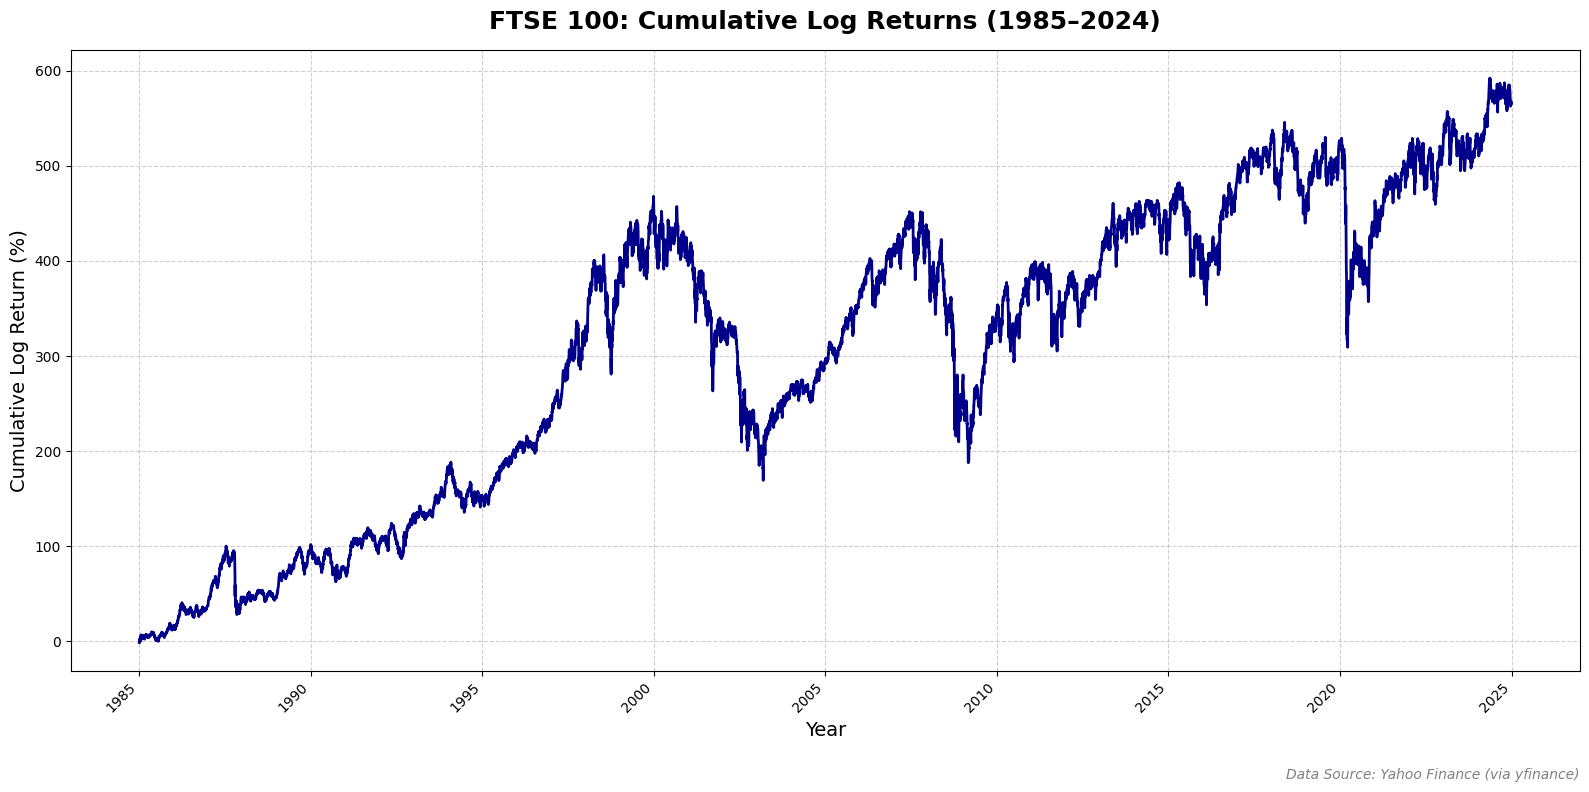

In [87]:
# --- Plot cumulative log returns ---
fig4, ax4 = plt.subplots(figsize=(16, 8))

# Plot cumulative log returns (%)
ax4.plot(index_df.index, index_df['Cumulative_Log_Return'] * 100,
         label='Cumulative Log Return (%)', color='darkblue', linewidth=2)

# Title and labels
ax4.set_title("FTSE 100: Cumulative Log Returns (1985–2024)", fontsize=18, fontweight='bold', pad=15)
ax4.set_xlabel("Year", fontsize=14)
ax4.set_ylabel("Cumulative Log Return (%)", fontsize=14)

# Format x-axis with years
ax4.xaxis.set_major_locator(mdates.YearLocator(5))           # tick every 5 years
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))    # format as YYYY
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')     # rotate for readability

# Grid, legend, caption
ax4.grid(True, linestyle='--', alpha=0.6)
# ax4.legend(fontsize=12, frameon=True, loc='lower right')     # legend position
fig4.text(0.99, 0.02, 'Data Source: Yahoo Finance (via yfinance)',
          ha='right', fontsize=10, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

# Performance comparision with other European Index

In [88]:
# Define a dictionary of major European stock indices with Yahoo Finance ticker symbols
tickers = {
    'CAC 40 (France)': '^FCHI',           # French CAC 40 Index (est. 1988)
    'DAX (Germany)': '^GDAXI',            # German DAX Index (est. 1989)
    'FTSE 100 (UK)': '^FTSE',             # UK's FTSE 100 Index (est. 1985)
    'SMI (Switzerland)': '^SSMI',         # Swiss Market Index (est. 1988)
    #'Euro Stoxx 50': '^STOXX50E'        # Euro Stoxx 50 Index (est. 1998)
}

# Specify the start and end dates for the European Index
EUROPE_START_DATE = '1998-01-01'
EUROPE_END_DATE = '2024-12-31'

# Download historical data for all indices in the dictionary
print(f"Downloading historical data for FTSE100 from {EUROPE_START_DATE} to {EUROPE_END_DATE}...")
try:
    # The 'progress=Trye' argument displays the download progress bar.
    europe_index = yf.download(list(tickers.values()), start=EUROPE_START_DATE, end=EUROPE_END_DATE, progress=True)
    print("Download complete.")
except Exception as e:
    print(f"Error downloading data: {e}")
    # Exit if data download fails to prevent further errors.
    exit()

/tmp/ipython-input-3921782786.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  europe_index = yf.download(list(tickers.values()), start=EUROPE_START_DATE, end=EUROPE_END_DATE, progress=True)
[                       0%                       ]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b51cfbf9780>
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  r

Download complete.


sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b51cfbf9940>

sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b51cfbf97f0>
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Data Cleaning and Inspection

In [89]:
# Show summary statistics (count, mean, std, min, quartiles, max) for each column in the DataFrame
europe_index.describe()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Price         Close                                                  High  \
Ticker        ^FCHI        ^FTSE        ^GDAXI         ^SSMI        ^FCHI   
count   6891.000000  6817.000000   6852.000000   6781.000000  6891.000000   
mean    4811.155157  6142.760334   8688.818739   8029.239464  4844.865346   
std     1240.360379  1074.343560   4093.784612   1994.250241  1242.509980   
min     2403.040039  3287.000000   2202.959961   3675.399902  2518.290039   
25%     3827.265015  5431.100098   5400.662598   6446.319824  3853.964966   
50%     4580.439941  6187.000000   7267.294922   7887.100098  4611.129883   
75%     5535.664795  6983.500000  12059.635254   9162.740234  5567.549805   
max     8239.990234  8445.799805  20426.269531  12970.530273  8259.190430   

Price                                                    Low               \
Ticker        ^FTSE        ^GDAXI         ^SSMI        ^FCHI        ^FTSE   
count   6817.000000   6852.000000   6781.000000  6891.000000  6817.000000   
mean    6182.904359   8749.800658   8075.774327  4775.620132  6101.145859   
std     1072.152041   4106.085480   1996.731020  1238.363718  1077.061714   
min     3466.399902   2319.649902   3760.199951  2401.149902  3277.500000   
25%     5471.200195   5452.092651   6485.640137  3797.939941  5384.299805   
50%     6233.100098   7320.454834   7929.399902  4544.689941  6140.399902   
75%     7025.700195  12130.427246   9200.080078  5508.185059  6937.100098   
max     8474.400391  20522.820312  12997.150391  8211.200195  8427.900391   

Price                                      Open                             \
Ticker        ^GDAXI         ^SSMI        ^FCHI        ^FTSE        ^GDAXI   
count    6852.000000   6781.000000  6891.000000  6817.000000   6852.000000   
mean     8623.280538   7980.964515  4811.843445  6142.494235   8689.200092   
std      4080.114372   1991.505563  1240.078637  1074.126601   4092.715719   
min      2188.750000   3618.000000  2453.050049  3287.000000   2203.969971   
25%      5351.174927   6414.810059  3826.864990  5430.299805   5404.085205   
50%      7207.239990   7838.299805  4581.160156  6187.700195   7262.375000   
75%     11989.905273   9121.019531  5533.739990  6983.500000  12054.745117   
max     20388.029297  12905.530273  8241.679688  8445.799805  20461.849609   

Price                       Volume                                            
Ticker         ^SSMI         ^FCHI         ^FTSE        ^GDAXI         ^SSMI  
count    6781.000000  6.891000e+03  6.817000e+03  6.852000e+03  6.781000e+03  
mean     8029.906334  8.237653e+07  1.012218e+09  9.335686e+07  4.625391e+07  
std      1993.198163  6.512183e+07  4.989210e+08  5.410970e+07  3.436886e+07  
min      3714.600098  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%      6451.859863  0.000000e+00  6.798853e+08  6.326728e+07  2.658030e+07  
50%      7889.700195  8.349320e+07  8.815791e+08  8.762755e+07  4.587480e+07  
75%      9160.320312  1.228568e+08  1.327051e+09  1.163760e+08  6.157900e+07  
max     12977.589844  5.312476e+08  4.420947e+09  5.101956e+08  4.160732e+08

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [90]:
# Display DataFrame structure: index type, column names, non-null counts, and data types
europe_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6926 entries, 1998-01-02 to 2024-12-30
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, ^FCHI)    6891 non-null   float64
 1   (Close, ^FTSE)    6817 non-null   float64
 2   (Close, ^GDAXI)   6852 non-null   float64
 3   (Close, ^SSMI)    6781 non-null   float64
 4   (High, ^FCHI)     6891 non-null   float64
 5   (High, ^FTSE)     6817 non-null   float64
 6   (High, ^GDAXI)    6852 non-null   float64
 7   (High, ^SSMI)     6781 non-null   float64
 8   (Low, ^FCHI)      6891 non-null   float64
 9   (Low, ^FTSE)      6817 non-null   float64
 10  (Low, ^GDAXI)     6852 non-null   float64
 11  (Low, ^SSMI)      6781 non-null   float64
 12  (Open, ^FCHI)     6891 non-null   float64
 13  (Open, ^FTSE)     6817 non-null   float64
 14  (Open, ^GDAXI)    6852 non-null   float64
 15  (Open, ^SSMI)     6781 non-null   float64
 16  (Volume, ^FCHI)   6891 n

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [91]:
# Check occurrence dates for zero values in each column
print("\nOccurrence dates for zero values in each column:")

for col in europe_index.columns:
    zero_dates = europe_index[europe_index[col] == 0].index

    if not zero_dates.empty:
        first_zero_date = zero_dates[0]
        last_zero_date = zero_dates[-1]
        print(f"\nColumn '{col}':")
        print(f"  First zero value on: {first_zero_date}")
        print(f"  Last zero value on: {last_zero_date}")
        # display(zero_dates)  # shows all dates (can limit with .to_list()[:10] if too many)
    else:
        print(f"\nColumn '{col}': No zero values found.")

# Check occurrence dates for NaN values in each column
print("\nOccurrence dates for NaN values in each column:")

for col in europe_index.columns:
    nan_dates = europe_index.index[europe_index[col].isnull()]

    if not nan_dates.empty:
        first_nan_date = nan_dates[0]
        last_nan_date = nan_dates[-1]
        print(f"\nColumn '{col}':")
        print(f"  First NaN value on: {first_nan_date}")
        print(f"  Last NaN value on: {last_nan_date}")
        display(nan_dates)
    else:
        print(f"\nColumn '{col}': No NaN values found.")


Occurrence dates for zero values in each column:

Column '('Close', '^FCHI')': No zero values found.

Column '('Close', '^FTSE')': No zero values found.

Column '('Close', '^GDAXI')': No zero values found.

Column '('Close', '^SSMI')': No zero values found.

Column '('High', '^FCHI')': No zero values found.

Column '('High', '^FTSE')': No zero values found.

Column '('High', '^GDAXI')': No zero values found.

Column '('High', '^SSMI')': No zero values found.

Column '('Low', '^FCHI')': No zero values found.

Column '('Low', '^FTSE')': No zero values found.

Column '('Low', '^GDAXI')': No zero values found.

Column '('Low', '^SSMI')': No zero values found.

Column '('Open', '^FCHI')': No zero values found.

Column '('Open', '^FTSE')': No zero values found.

Column '('Open', '^GDAXI')': No zero values found.

Column '('Open', '^SSMI')': No zero values found.

Column '('Volume', '^FCHI')':
  First zero value on: 1998-01-02 00:00:00
  Last zero value on: 2024-09-10 00:00:00

Column '('Vol

DatetimeIndex(['1998-05-01', '1998-05-08', '1998-05-21', '1998-06-01',
               '1998-07-13', '1998-07-14', '1998-11-11', '1998-12-24',
               '1999-05-24', '1999-07-14', '1999-11-01', '2000-06-12',
               '2000-07-14', '2001-05-01', '2001-06-04', '2001-12-31',
               '2002-05-01', '2003-05-01', '2007-05-01', '2008-05-01',
               '2009-05-01', '2010-12-24', '2010-12-31', '2012-01-02',
               '2012-05-01', '2012-12-24', '2012-12-31', '2013-05-01',
               '2014-05-01', '2015-05-01', '2015-12-31', '2018-05-01',
               '2019-05-01', '2020-05-01', '2024-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


Column '('Close', '^FTSE')':
  First NaN value on: 1998-05-04 00:00:00
  Last NaN value on: 2024-08-26 00:00:00


DatetimeIndex(['1998-05-04', '1998-05-25', '1998-08-31', '1998-12-28',
               '1999-05-03', '1999-05-31', '1999-08-30', '1999-12-27',
               '1999-12-28', '2000-01-03',
               ...
               '2022-08-29', '2022-09-19', '2022-12-27', '2023-01-02',
               '2023-05-08', '2023-05-29', '2023-08-28', '2024-05-06',
               '2024-05-27', '2024-08-26'],
              dtype='datetime64[ns]', name='Date', length=109, freq=None)


Column '('Close', '^GDAXI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-21', '1998-06-01', '1998-06-11',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-06-03',
               '1999-12-24', '2000-10-03', '2001-05-01', '2001-12-24',
               '2001-12-31', '2002-05-01', '2002-12-24', '2002-12-31',
               '2003-05-01', '2003-12-24', '2003-12-31', '2004-12-24',
               '2004-12-31', '2007-05-01', '2007-05-28', '2007-12-24',
               '2007-12-31', '2008-05-01', '2008-12-24', '2008-12-31',
               '2009-05-01', '2009-12-24', '2009-12-31', '2010-12-24',
               '2010-12-31', '2011-10-03', '2012-05-01', '2012-10-03',
               '2012-12-24', '2012-12-31', '2013-05-01', '2013-10-03',
               '2013-12-24', '2013-12-31', '2014-05-01', '2014-10-03',
               '2014-12-24', '2014-12-31', '2015-05-01', '2015-05-25',
               '2015-12-24', '2015-12-31', '2016-05-16', '2016-10-03',
               '2017-06-05', '2017-10-03', '2017-10-31', '2018-05-01',
      


Column '('Close', '^SSMI')':
  First NaN value on: 1998-01-02 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-01-02', '1998-05-01', '1998-05-21', '1998-06-01',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-11-12',
               '1999-12-24', '2000-01-03',
               ...
               '2023-05-18', '2023-05-29', '2023-08-01', '2024-01-02',
               '2024-02-19', '2024-05-01', '2024-05-09', '2024-05-20',
               '2024-08-01', '2024-12-24'],
              dtype='datetime64[ns]', name='Date', length=145, freq=None)


Column '('High', '^FCHI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-05-01 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-08', '1998-05-21', '1998-06-01',
               '1998-07-13', '1998-07-14', '1998-11-11', '1998-12-24',
               '1999-05-24', '1999-07-14', '1999-11-01', '2000-06-12',
               '2000-07-14', '2001-05-01', '2001-06-04', '2001-12-31',
               '2002-05-01', '2003-05-01', '2007-05-01', '2008-05-01',
               '2009-05-01', '2010-12-24', '2010-12-31', '2012-01-02',
               '2012-05-01', '2012-12-24', '2012-12-31', '2013-05-01',
               '2014-05-01', '2015-05-01', '2015-12-31', '2018-05-01',
               '2019-05-01', '2020-05-01', '2024-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


Column '('High', '^FTSE')':
  First NaN value on: 1998-05-04 00:00:00
  Last NaN value on: 2024-08-26 00:00:00


DatetimeIndex(['1998-05-04', '1998-05-25', '1998-08-31', '1998-12-28',
               '1999-05-03', '1999-05-31', '1999-08-30', '1999-12-27',
               '1999-12-28', '2000-01-03',
               ...
               '2022-08-29', '2022-09-19', '2022-12-27', '2023-01-02',
               '2023-05-08', '2023-05-29', '2023-08-28', '2024-05-06',
               '2024-05-27', '2024-08-26'],
              dtype='datetime64[ns]', name='Date', length=109, freq=None)


Column '('High', '^GDAXI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-21', '1998-06-01', '1998-06-11',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-06-03',
               '1999-12-24', '2000-10-03', '2001-05-01', '2001-12-24',
               '2001-12-31', '2002-05-01', '2002-12-24', '2002-12-31',
               '2003-05-01', '2003-12-24', '2003-12-31', '2004-12-24',
               '2004-12-31', '2007-05-01', '2007-05-28', '2007-12-24',
               '2007-12-31', '2008-05-01', '2008-12-24', '2008-12-31',
               '2009-05-01', '2009-12-24', '2009-12-31', '2010-12-24',
               '2010-12-31', '2011-10-03', '2012-05-01', '2012-10-03',
               '2012-12-24', '2012-12-31', '2013-05-01', '2013-10-03',
               '2013-12-24', '2013-12-31', '2014-05-01', '2014-10-03',
               '2014-12-24', '2014-12-31', '2015-05-01', '2015-05-25',
               '2015-12-24', '2015-12-31', '2016-05-16', '2016-10-03',
               '2017-06-05', '2017-10-03', '2017-10-31', '2018-05-01',
      


Column '('High', '^SSMI')':
  First NaN value on: 1998-01-02 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-01-02', '1998-05-01', '1998-05-21', '1998-06-01',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-11-12',
               '1999-12-24', '2000-01-03',
               ...
               '2023-05-18', '2023-05-29', '2023-08-01', '2024-01-02',
               '2024-02-19', '2024-05-01', '2024-05-09', '2024-05-20',
               '2024-08-01', '2024-12-24'],
              dtype='datetime64[ns]', name='Date', length=145, freq=None)


Column '('Low', '^FCHI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-05-01 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-08', '1998-05-21', '1998-06-01',
               '1998-07-13', '1998-07-14', '1998-11-11', '1998-12-24',
               '1999-05-24', '1999-07-14', '1999-11-01', '2000-06-12',
               '2000-07-14', '2001-05-01', '2001-06-04', '2001-12-31',
               '2002-05-01', '2003-05-01', '2007-05-01', '2008-05-01',
               '2009-05-01', '2010-12-24', '2010-12-31', '2012-01-02',
               '2012-05-01', '2012-12-24', '2012-12-31', '2013-05-01',
               '2014-05-01', '2015-05-01', '2015-12-31', '2018-05-01',
               '2019-05-01', '2020-05-01', '2024-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


Column '('Low', '^FTSE')':
  First NaN value on: 1998-05-04 00:00:00
  Last NaN value on: 2024-08-26 00:00:00


DatetimeIndex(['1998-05-04', '1998-05-25', '1998-08-31', '1998-12-28',
               '1999-05-03', '1999-05-31', '1999-08-30', '1999-12-27',
               '1999-12-28', '2000-01-03',
               ...
               '2022-08-29', '2022-09-19', '2022-12-27', '2023-01-02',
               '2023-05-08', '2023-05-29', '2023-08-28', '2024-05-06',
               '2024-05-27', '2024-08-26'],
              dtype='datetime64[ns]', name='Date', length=109, freq=None)


Column '('Low', '^GDAXI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-21', '1998-06-01', '1998-06-11',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-06-03',
               '1999-12-24', '2000-10-03', '2001-05-01', '2001-12-24',
               '2001-12-31', '2002-05-01', '2002-12-24', '2002-12-31',
               '2003-05-01', '2003-12-24', '2003-12-31', '2004-12-24',
               '2004-12-31', '2007-05-01', '2007-05-28', '2007-12-24',
               '2007-12-31', '2008-05-01', '2008-12-24', '2008-12-31',
               '2009-05-01', '2009-12-24', '2009-12-31', '2010-12-24',
               '2010-12-31', '2011-10-03', '2012-05-01', '2012-10-03',
               '2012-12-24', '2012-12-31', '2013-05-01', '2013-10-03',
               '2013-12-24', '2013-12-31', '2014-05-01', '2014-10-03',
               '2014-12-24', '2014-12-31', '2015-05-01', '2015-05-25',
               '2015-12-24', '2015-12-31', '2016-05-16', '2016-10-03',
               '2017-06-05', '2017-10-03', '2017-10-31', '2018-05-01',
      


Column '('Low', '^SSMI')':
  First NaN value on: 1998-01-02 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-01-02', '1998-05-01', '1998-05-21', '1998-06-01',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-11-12',
               '1999-12-24', '2000-01-03',
               ...
               '2023-05-18', '2023-05-29', '2023-08-01', '2024-01-02',
               '2024-02-19', '2024-05-01', '2024-05-09', '2024-05-20',
               '2024-08-01', '2024-12-24'],
              dtype='datetime64[ns]', name='Date', length=145, freq=None)


Column '('Open', '^FCHI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-05-01 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-08', '1998-05-21', '1998-06-01',
               '1998-07-13', '1998-07-14', '1998-11-11', '1998-12-24',
               '1999-05-24', '1999-07-14', '1999-11-01', '2000-06-12',
               '2000-07-14', '2001-05-01', '2001-06-04', '2001-12-31',
               '2002-05-01', '2003-05-01', '2007-05-01', '2008-05-01',
               '2009-05-01', '2010-12-24', '2010-12-31', '2012-01-02',
               '2012-05-01', '2012-12-24', '2012-12-31', '2013-05-01',
               '2014-05-01', '2015-05-01', '2015-12-31', '2018-05-01',
               '2019-05-01', '2020-05-01', '2024-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


Column '('Open', '^FTSE')':
  First NaN value on: 1998-05-04 00:00:00
  Last NaN value on: 2024-08-26 00:00:00


DatetimeIndex(['1998-05-04', '1998-05-25', '1998-08-31', '1998-12-28',
               '1999-05-03', '1999-05-31', '1999-08-30', '1999-12-27',
               '1999-12-28', '2000-01-03',
               ...
               '2022-08-29', '2022-09-19', '2022-12-27', '2023-01-02',
               '2023-05-08', '2023-05-29', '2023-08-28', '2024-05-06',
               '2024-05-27', '2024-08-26'],
              dtype='datetime64[ns]', name='Date', length=109, freq=None)


Column '('Open', '^GDAXI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-21', '1998-06-01', '1998-06-11',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-06-03',
               '1999-12-24', '2000-10-03', '2001-05-01', '2001-12-24',
               '2001-12-31', '2002-05-01', '2002-12-24', '2002-12-31',
               '2003-05-01', '2003-12-24', '2003-12-31', '2004-12-24',
               '2004-12-31', '2007-05-01', '2007-05-28', '2007-12-24',
               '2007-12-31', '2008-05-01', '2008-12-24', '2008-12-31',
               '2009-05-01', '2009-12-24', '2009-12-31', '2010-12-24',
               '2010-12-31', '2011-10-03', '2012-05-01', '2012-10-03',
               '2012-12-24', '2012-12-31', '2013-05-01', '2013-10-03',
               '2013-12-24', '2013-12-31', '2014-05-01', '2014-10-03',
               '2014-12-24', '2014-12-31', '2015-05-01', '2015-05-25',
               '2015-12-24', '2015-12-31', '2016-05-16', '2016-10-03',
               '2017-06-05', '2017-10-03', '2017-10-31', '2018-05-01',
      


Column '('Open', '^SSMI')':
  First NaN value on: 1998-01-02 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-01-02', '1998-05-01', '1998-05-21', '1998-06-01',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-11-12',
               '1999-12-24', '2000-01-03',
               ...
               '2023-05-18', '2023-05-29', '2023-08-01', '2024-01-02',
               '2024-02-19', '2024-05-01', '2024-05-09', '2024-05-20',
               '2024-08-01', '2024-12-24'],
              dtype='datetime64[ns]', name='Date', length=145, freq=None)


Column '('Volume', '^FCHI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-05-01 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-08', '1998-05-21', '1998-06-01',
               '1998-07-13', '1998-07-14', '1998-11-11', '1998-12-24',
               '1999-05-24', '1999-07-14', '1999-11-01', '2000-06-12',
               '2000-07-14', '2001-05-01', '2001-06-04', '2001-12-31',
               '2002-05-01', '2003-05-01', '2007-05-01', '2008-05-01',
               '2009-05-01', '2010-12-24', '2010-12-31', '2012-01-02',
               '2012-05-01', '2012-12-24', '2012-12-31', '2013-05-01',
               '2014-05-01', '2015-05-01', '2015-12-31', '2018-05-01',
               '2019-05-01', '2020-05-01', '2024-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


Column '('Volume', '^FTSE')':
  First NaN value on: 1998-05-04 00:00:00
  Last NaN value on: 2024-08-26 00:00:00


DatetimeIndex(['1998-05-04', '1998-05-25', '1998-08-31', '1998-12-28',
               '1999-05-03', '1999-05-31', '1999-08-30', '1999-12-27',
               '1999-12-28', '2000-01-03',
               ...
               '2022-08-29', '2022-09-19', '2022-12-27', '2023-01-02',
               '2023-05-08', '2023-05-29', '2023-08-28', '2024-05-06',
               '2024-05-27', '2024-08-26'],
              dtype='datetime64[ns]', name='Date', length=109, freq=None)


Column '('Volume', '^GDAXI')':
  First NaN value on: 1998-05-01 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-05-01', '1998-05-21', '1998-06-01', '1998-06-11',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-06-03',
               '1999-12-24', '2000-10-03', '2001-05-01', '2001-12-24',
               '2001-12-31', '2002-05-01', '2002-12-24', '2002-12-31',
               '2003-05-01', '2003-12-24', '2003-12-31', '2004-12-24',
               '2004-12-31', '2007-05-01', '2007-05-28', '2007-12-24',
               '2007-12-31', '2008-05-01', '2008-12-24', '2008-12-31',
               '2009-05-01', '2009-12-24', '2009-12-31', '2010-12-24',
               '2010-12-31', '2011-10-03', '2012-05-01', '2012-10-03',
               '2012-12-24', '2012-12-31', '2013-05-01', '2013-10-03',
               '2013-12-24', '2013-12-31', '2014-05-01', '2014-10-03',
               '2014-12-24', '2014-12-31', '2015-05-01', '2015-05-25',
               '2015-12-24', '2015-12-31', '2016-05-16', '2016-10-03',
               '2017-06-05', '2017-10-03', '2017-10-31', '2018-05-01',
      


Column '('Volume', '^SSMI')':
  First NaN value on: 1998-01-02 00:00:00
  Last NaN value on: 2024-12-24 00:00:00


DatetimeIndex(['1998-01-02', '1998-05-01', '1998-05-21', '1998-06-01',
               '1998-12-24', '1999-05-13', '1999-05-24', '1999-11-12',
               '1999-12-24', '2000-01-03',
               ...
               '2023-05-18', '2023-05-29', '2023-08-01', '2024-01-02',
               '2024-02-19', '2024-05-01', '2024-05-09', '2024-05-20',
               '2024-08-01', '2024-12-24'],
              dtype='datetime64[ns]', name='Date', length=145, freq=None)

In [92]:
# Replace 0 with NaN (so they can be backward-filled too)
europe_index.replace(0, np.nan, inplace=True)

# Forward-fill missing values
# europe_index.fillna(method='ffill', inplace=True)

# Backward-fill because first row(s) are NaN
europe_index.fillna(method='bfill', inplace=True)

# Verify there are no NaN or 0 values left
print("\nCheck for remaining NaN or 0 values:")
print(europe_index.isnull().sum())   # should be all 0
print((europe_index == 0).sum())     # should be all 0


Check for remaining NaN or 0 values:
Price   Ticker
Close   ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
High    ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
Low     ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
Open    ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
Volume  ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
dtype: int64
Price   Ticker
Close   ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
High    ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
Low     ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
Open    ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
Volume  ^FCHI     0
        ^FTSE     0
        ^GDAXI    0
        ^SSMI     0
dtype: int64


/tmp/ipython-input-1206904166.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  europe_index.fillna(method='bfill', inplace=True)


In [93]:
# Select only the 'Close' column from the europe_index DataFrame
europe_index = europe_index.loc[:, ['Close']]

# Display the resulting DataFrame to check its content
display(europe_index)

Price             Close                                         
Ticker            ^FCHI        ^FTSE        ^GDAXI         ^SSMI
Date                                                            
1998-01-02  3038.699951  5193.500000   4364.319824   6397.000000
1998-01-05  3072.800049  5262.500000   4416.950195   6397.000000
1998-01-06  3037.699951  5264.399902   4360.049805   6375.700195
1998-01-07  3006.699951  5224.100098   4339.979980   6390.000000
1998-01-08  2954.899902  5237.100098   4293.640137   6330.200195
...                 ...          ...           ...           ...
2024-12-20  7274.479980  8084.600098  19884.750000  11384.919922
2024-12-23  7272.319824  8102.700195  19848.769531  11488.280273
2024-12-24  7282.689941  8137.000000  19984.320312  11589.339844
2024-12-27  7355.370117  8149.799805  19984.320312  11589.339844
2024-12-30  7313.560059  8121.000000  19909.140625  11600.900391

[6926 rows x 4 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [94]:
# Loop through each ticker symbol in the dataset
for ticker in europe_index.columns.get_level_values(1).unique():
    # Select the 'Close' price column for the current ticker
    close_col = ('Close', ticker)
    # Calculate simple returns: (P_t / P_(t-1)) - 1
    europe_index[('Simple_Return', ticker)] = europe_index[close_col].pct_change()
    # Calculate log returns: ln(P_t / P_(t-1))
    europe_index[('Log_Return', ticker)] = np.log(europe_index[close_col] / europe_index[close_col].shift(1))

# Drop the first row(s) with NaN values created by return calculations
europe_index.dropna(inplace=True)

# Display the first few rows of the cleaned DataFrame
display(europe_index.head())
europe_index.shape

Price             Close                                        Simple_Return  \
Ticker            ^FCHI        ^FTSE       ^GDAXI        ^SSMI         ^FCHI   
Date                                                                           
1998-01-05  3072.800049  5262.500000  4416.950195  6397.000000      0.011222   
1998-01-06  3037.699951  5264.399902  4360.049805  6375.700195     -0.011423   
1998-01-07  3006.699951  5224.100098  4339.979980  6390.000000     -0.010205   
1998-01-08  2954.899902  5237.100098  4293.640137  6330.200195     -0.017228   
1998-01-09  2919.800049  5138.299805  4237.750000  6251.799805     -0.011879   

Price      Log_Return Simple_Return Log_Return Simple_Return Log_Return  \
Ticker          ^FCHI         ^FTSE      ^FTSE        ^GDAXI     ^GDAXI   
Date                                                                      
1998-01-05   0.011159      0.013286   0.013198      0.012059   0.011987   
1998-01-06  -0.011489      0.000361   0.000361     -0.012882  -0.012966   
1998-01-07  -0.010258     -0.007655  -0.007685     -0.004603  -0.004614   
1998-01-08  -0.017378      0.002488   0.002485     -0.010677  -0.010735   
1998-01-09  -0.011950     -0.018865  -0.019046     -0.013017  -0.013102   

Price      Simple_Return Log_Return  
Ticker             ^SSMI      ^SSMI  
Date                                 
1998-01-05      0.000000   0.000000  
1998-01-06     -0.003330  -0.003335  
1998-01-07      0.002243   0.002240  
1998-01-08     -0.009358  -0.009402  
1998-01-09     -0.012385  -0.012462

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


(6925, 12)

## Visualization

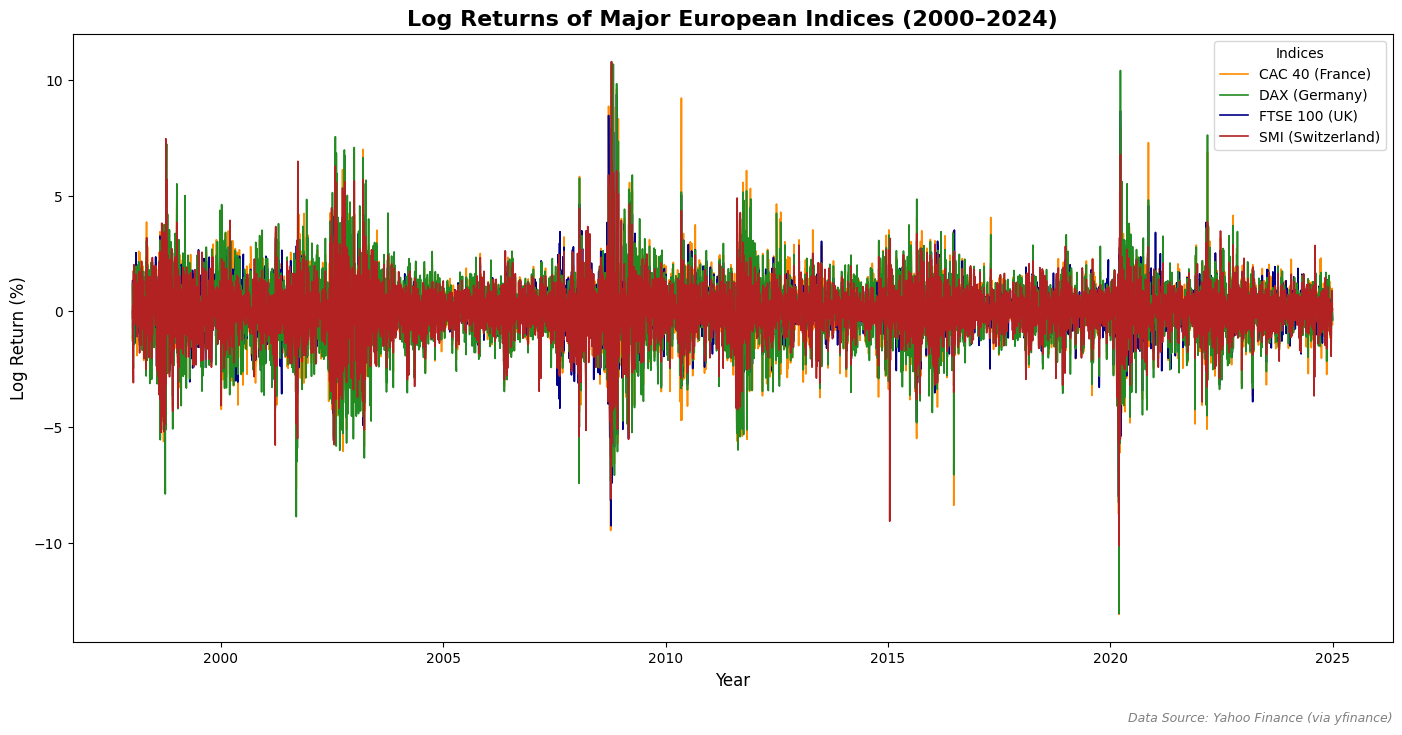

In [95]:
# Extract log returns
log_europe_returns = europe_index['Log_Return']

# Reverse mapping (ticker → human name)
ticker_labels = {v: k for k, v in tickers.items()}

color_map = {
    'FTSE 100 (UK)': 'darkblue',      # deep blue
    'SMI (Switzerland)': 'firebrick', # bold red
    'DAX (Germany)': 'forestgreen',   # leaf green
    'CAC 40 (France)': 'darkorange'   # thick orange
}

# Create figure and axis
fig5, ax5 = plt.subplots(figsize=(16, 8))

# Plot each series with human-readable label and fixed color
for col in log_europe_returns.columns:
    label = ticker_labels.get(col, col)
    color = color_map.get(label, 'gray')
    ax5.plot(log_europe_returns.index, log_europe_returns[col] * 100,
             label=label,
             color=color,
             linewidth=1.2)

# Titles and labels
ax5.set_title("Log Returns of Major European Indices (2000–2024)",
              fontsize=16, weight='bold')
ax5.set_xlabel("Year", fontsize=12)
ax5.set_ylabel("Log Return (%)", fontsize=12)

# Format x-axis (5-year ticks, year labels)
ax5.xaxis.set_major_locator(mdates.YearLocator(5))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Sort legend alphabetically
handles, labels = ax5.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: x[0])
labels, handles = zip(*sorted_handles_labels)
ax5.legend(handles, labels, title="Indices", fontsize=10)

# Adjust margins: add bottom space for caption, reduce right margin
plt.subplots_adjust(bottom=0.12, right=0.95)

# Caption (bottom-right, slightly lower for breathing room)
fig5.text(0.95, 0.02,   # closer to plot, not flush with edge
          "Data Source: Yahoo Finance (via yfinance)",
          ha="right", fontsize=9, style='italic', color='gray')

plt.show()

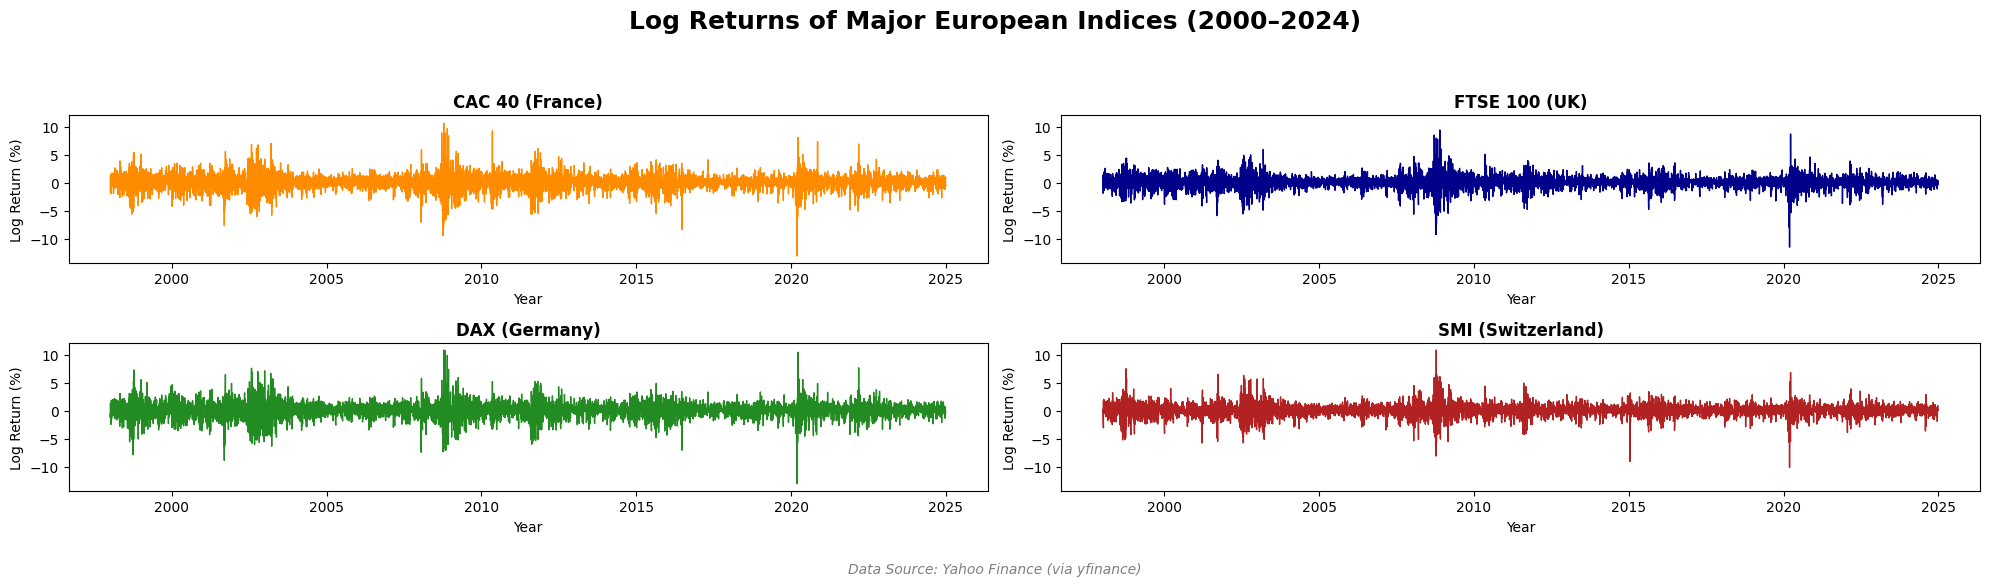

In [96]:
# Convert log returns into % scale
log_europe_returns_pct = europe_index['Log_Return'] * 100

# Grid size for subplots (rows × cols)
n_indices = len(log_europe_returns_pct.columns)
n_cols = math.ceil(math.sqrt(n_indices))
n_rows = math.ceil(n_indices / n_cols)

# Create figure and axis
fig6, axes6 = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows), sharex=True)
axes6 = axes6.flatten()

# Make a consistent y-range across panels
ymin = log_europe_returns_pct.min().min()
ymax = log_europe_returns_pct.max().max()
ypad = 0.05 * (ymax - ymin)
ylims = (ymin - ypad, ymax + ypad)

# Plot each series in its own panel
for i, col in enumerate(log_europe_returns_pct.columns):
    ax = axes6[i]
    label = ticker_labels.get(col, col)
    color = color_map.get(label, 'gray')

    ax.plot(log_europe_returns_pct.index, log_europe_returns_pct[col],
            color=color, linewidth=1)

    # Titles and axes labels
    ax.set_title(label, fontsize=12, weight='bold')
    ax.set_ylabel("Log Return (%)", fontsize=10)
    ax.set_xlabel("Year", fontsize=10)

    # Year ticks every 5 years on every subplot
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', which='both', labelbottom=True)

    # Show y-tick labels on EVERY subplot
    ax.tick_params(axis='y', which='both', labelleft=True)

    # Use the same y-limits everywhere
    ax.set_ylim(*ylims)

    # Force y-axis ticks at -10, -5, 0, 5, 10
    ax.set_yticks([-10, -5, 0, 5, 10])

# Remove unused axes
for j in range(i + 1, len(axes6)):
    fig6.delaxes(axes6[j])

# Main title (centered with extra space above subplots)
fig6.suptitle("Log Returns of Major European Indices (2000–2024)",
             fontsize=18, weight='bold', y=0.98)

# Caption (centered, lifted slightly higher to avoid cramping)
fig6.text(0.5, 0.04, "Data Source: Yahoo Finance (via yfinance)",
         ha="center", fontsize=10, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.08, 1, 0.93])
plt.show()

| Style String          | Effect        |
| --------------------- | ------------- |
| `'-'` or `'solid'`    | Solid line    |
| `'--'` or `'dashed'`  | Dashed line   |
| `'-.'` or `'dashdot'` | Dash-dot line |
| `':'` or `'dotted'`   | Dotted line   |

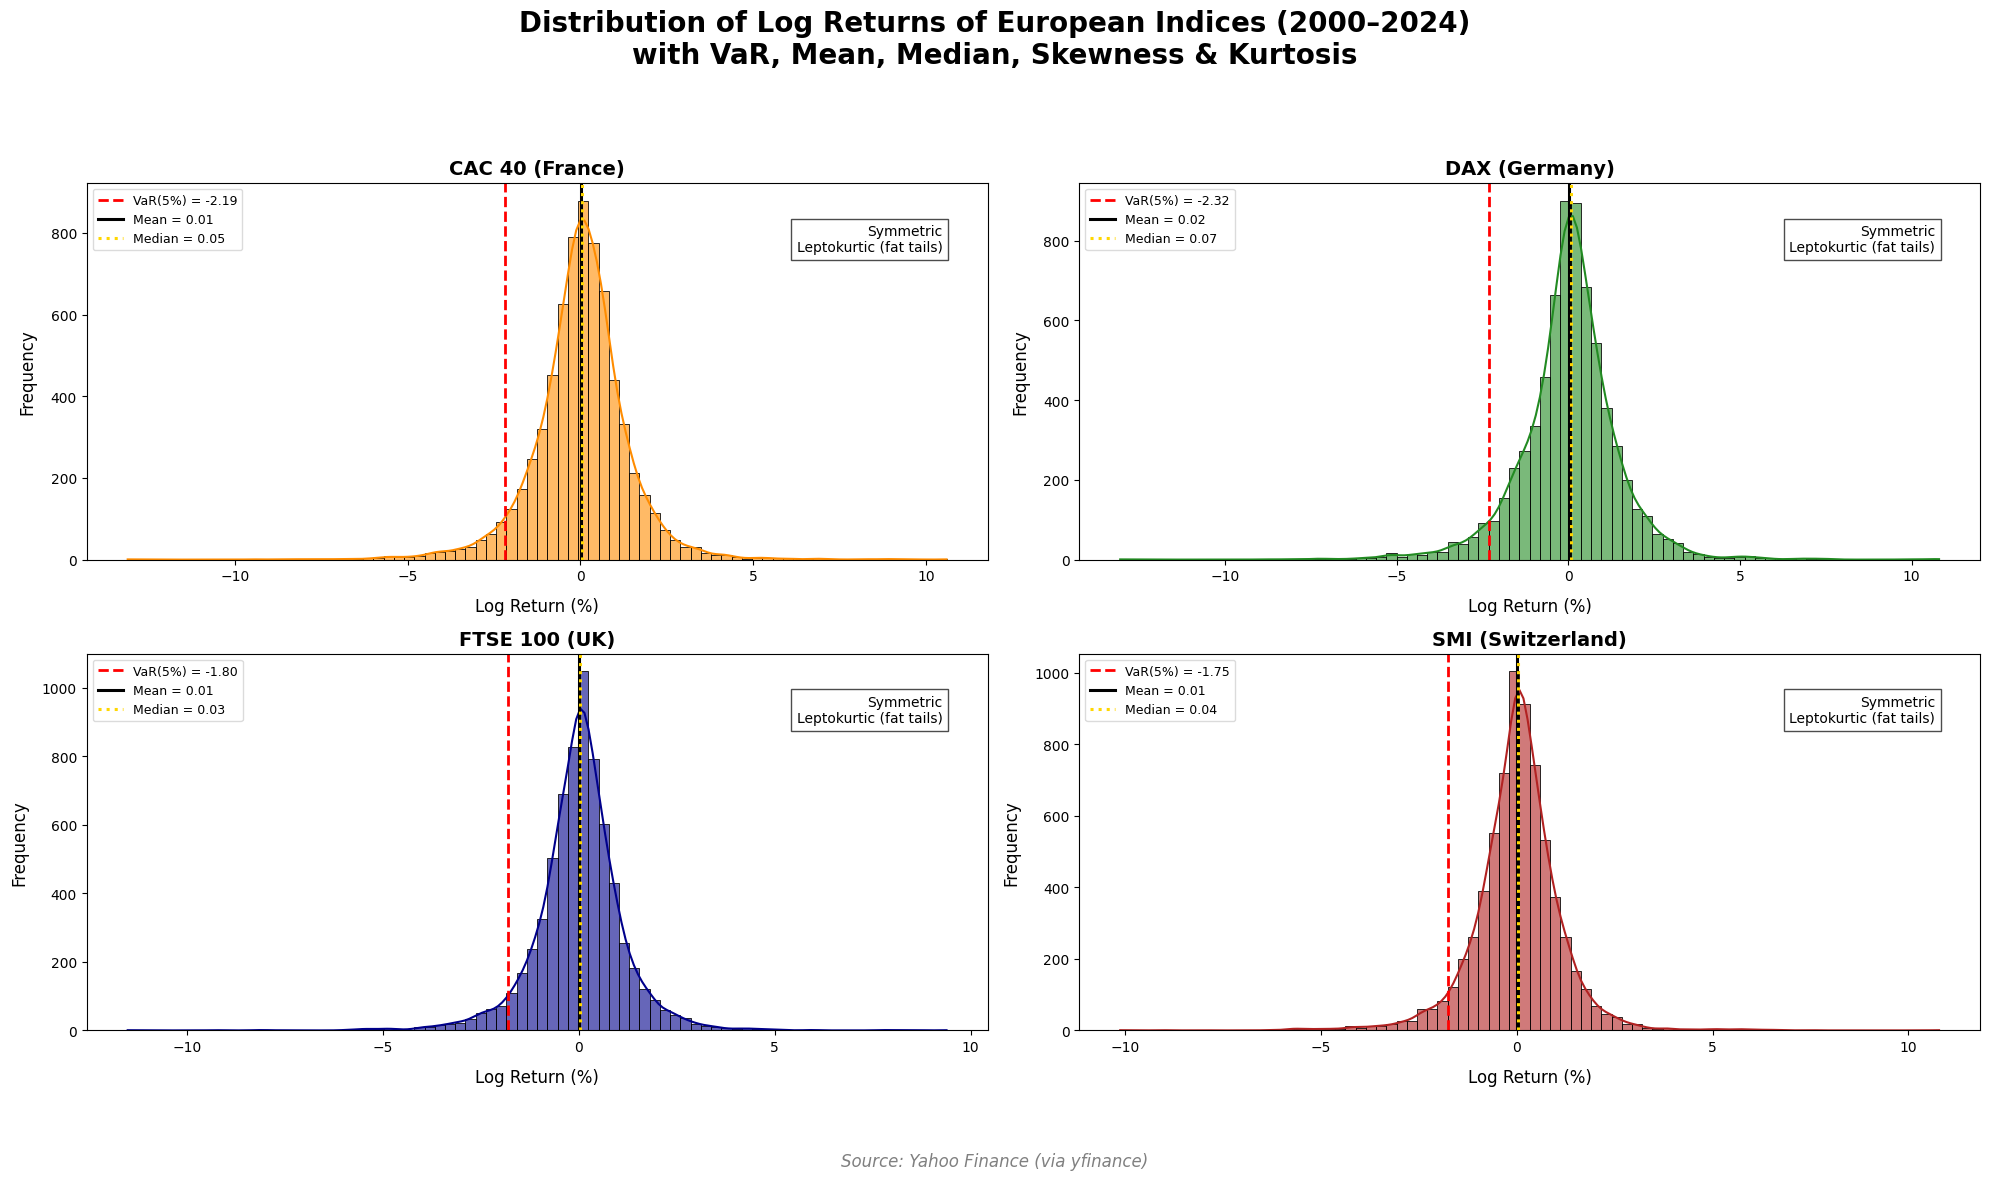

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [97]:
# Reverse mapping (ticker → human name)
ticker_labels = {v: k for k, v in tickers.items()}

# Select indices to plot (tickers list)
indices = list(tickers.values())

# Grid size for subplots (rows × cols)
n = len(indices)           # number of indices
cols = 2                   # 2 columns in subplot grid
rows = math.ceil(n / cols) # rows calculated automatically

# x-axis ticks (in %)
xticks = [-10, -5, 0, 5, 10]

# Create figure and axes for subplots (no sharex/sharey)
fig7, axes7 = plt.subplots(rows, cols, figsize=(20, rows * 6))  # bigger size
axes7 = np.array(axes7).reshape(-1)  # flatten axes for easy iteration

# Loop through each index and plot histogram
for ax, col in zip(axes7, indices):
    name = ticker_labels.get(col, col)           # map ticker to readable name
    data = log_europe_returns_pct[col].dropna()  # drop NaN values

    # Descriptive statistics
    var_5 = np.percentile(data, 5)   # 5% Value-at-Risk
    mean = data.mean()
    median = data.median()

    # Skewness classification
    skewness = stats.skew(data)
    if skewness > 0.5:
        skew_text = "Right-skewed"
    elif skewness < -0.5:
        skew_text = "Left-skewed"
    else:
        skew_text = "Symmetric"

    # Kurtosis classification
    kurt = stats.kurtosis(data, fisher=True)
    if kurt > 3:
        kurt_text = "Leptokurtic (fat tails)"
    elif kurt < -3:
        kurt_text = "Platykurtic (thin tails)"
    else:
        kurt_text = "Mesokurtic"

    # histogram with KDE curve
    sns.histplot(data, bins=80, kde=True, color=color_map.get(name, "gray"),
                 ax=ax, alpha=0.6)

    # titles and labels (force label on EVERY subplot)
    ax.set_title(name, fontsize=14, weight='bold')
    ax.set_xlabel("Log Return (%)", fontsize=12, labelpad=10)
    ax.set_ylabel("Frequency", fontsize=12, labelpad=10)

    # force consistent x-axis ticks
    ax.set_xticks(xticks)

    # add vertical lines for key stats
    ax.axvline(var_5, color='red', linestyle='--', linewidth=2, label=f"VaR(5%) = {var_5:.2f}")
    ax.axvline(mean, color='black', linestyle='-', linewidth=2.2, label=f"Mean = {mean:.2f}")
    ax.axvline(median, color='gold', linestyle=':', linewidth=2.2, label=f"Median = {median:.2f}")

    # add classification textbox
    textstr = f"{skew_text}\n{kurt_text}"
    ax.text(0.95, 0.85, textstr, ha='right', va='center',
            transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    # legend inside each subplot
    ax.legend(fontsize=9, loc="upper left", frameon=True, facecolor="white", framealpha=0.7)

    # make sure ALL tick labels show
    ax.tick_params(axis='both', which='both', labelleft=True, labelbottom=True)

# Hide unused subplot axes (if grid > number of indices)
for i in range(len(indices), len(axes7)):
    axes7[i].set_visible(False)

# Global title for the entire figure
plt.suptitle("Distribution of Log Returns of European Indices (2000–2024)\n"
             "with VaR, Mean, Median, Skewness & Kurtosis",
             fontsize=20, weight='bold')

# Caption with data source
plt.figtext(0.5, 0.02, "Source: Yahoo Finance (via yfinance)",
            ha="center", va="center", fontsize=12, style='italic', color='gray')

# Adjust layout
plt.tight_layout(rect=[0, 0.07, 1, 0.93])

# Show figure
plt.show()

In [98]:
# Create an empty list to collect stats
summary_data = []

for col in indices:
    name = ticker_labels.get(col, col)
    data = log_europe_returns_pct[col].dropna()

    # Descriptive statistics
    var_5 = np.percentile(data, 5)
    mean = data.mean()
    median = data.median()
    mode_val = stats.mode(data, keepdims=True).mode[0]

    # Skewness & classification
    skewness = stats.skew(data)
    if skewness > 0.5:
        skew_class = "Right-skewed"
    elif skewness < -0.5:
        skew_class = "Left-skewed"
    else:
        skew_class = "Symmetric"

    # Kurtosis & classification
    kurt = stats.kurtosis(data, fisher=True)
    if kurt > 3:
        kurt_class = "Leptokurtic (fat tails)"
    elif kurt < -3:
        kurt_class = "Platykurtic (thin tails)"
    else:
        kurt_class = "Mesokurtic"

    # Append results
    summary_data.append({
        "Index": name,
        "Mean": round(mean, 3),
        "Median": round(median, 3),
        "Mode": round(mode_val, 3),
        "VaR(5%)": round(var_5, 3),
        "Skewness": round(skewness, 3),
        "Skewness Type": skew_class,
        "Kurtosis": round(kurt, 3),
        "Kurtosis Type": kurt_class
    })

# Convert list to DataFrame and set index to start at 1
summary_df = pd.DataFrame(summary_data)
summary_df.index = summary_df.index + 1

# Show result
display(summary_df)

Index   Mean  Median  Mode  VaR(5%)  Skewness Skewness Type  \
1    CAC 40 (France)  0.013   0.045   0.0   -2.189    -0.208     Symmetric   
2      DAX (Germany)  0.022   0.067   0.0   -2.317    -0.183     Symmetric   
3      FTSE 100 (UK)  0.006   0.032   0.0   -1.798    -0.320     Symmetric   
4  SMI (Switzerland)  0.009   0.036   0.0   -1.754    -0.262     Symmetric   

   Kurtosis            Kurtosis Type  
1     6.189  Leptokurtic (fat tails)  
2     5.733  Leptokurtic (fat tails)  
3     7.627  Leptokurtic (fat tails)  
4     7.359  Leptokurtic (fat tails)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


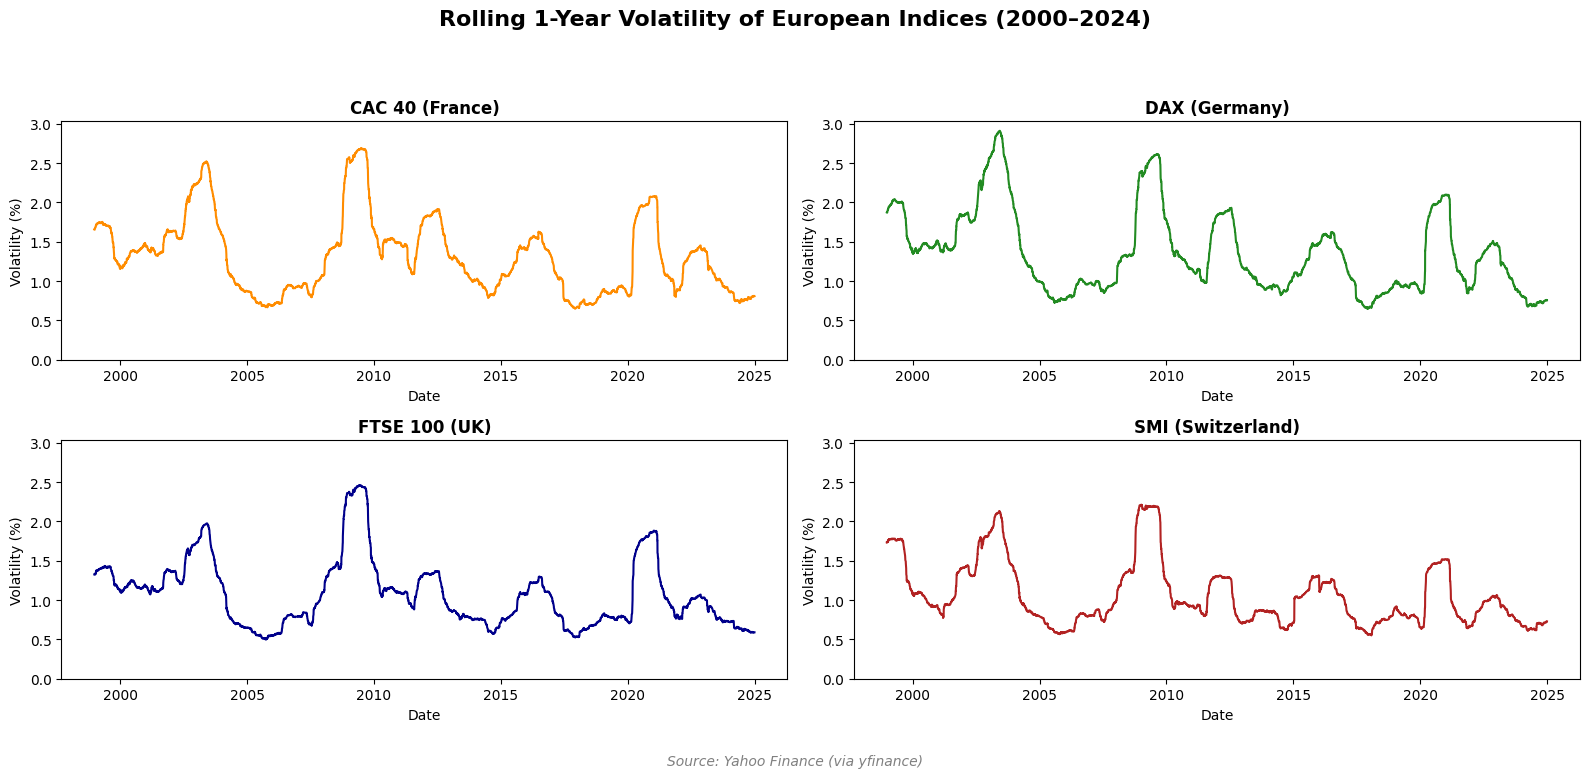

In [99]:
# Compute 252-day rolling volatility (%)
rolling_vol = (europe_index['Log_Return'] * 100).rolling(252).std()

# Indices to plot
indices = list(tickers.values())

# Grid size for subplots (rows × cols)
n = len(indices)
cols = 2
rows = math.ceil(n / cols)

# Create figure and axes for subplots
fig8, axes8 = plt.subplots(rows, cols, figsize=(16, rows * 4), sharex=True, sharey=True)
axes8 = np.array(axes8).reshape(-1)  # flatten axes

# Loop through each index
for ax, col in zip(axes8, indices):
    name = ticker_labels.get(col, col)          # readable name
    data = rolling_vol[col].dropna()            # rolling volatility

    # Plot rolling volatility
    ax.plot(data.index, data, color=color_map.get(name, "gray"))

    # Titles and labels
    ax.set_title(name, fontsize=12, weight='bold')
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel("Volatility (%)", fontsize=10)

    # Format x-axis ticks (show every 5 years)
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', which='both', labelbottom=True)   # force labels on all rows

    # Force y-tick labels on every subplot
    ax.tick_params(axis='y', which='both', labelleft=True)

    # Fix y-axis ticks to your requested values
    ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])

# Hide unused subplot axes if grid is bigger than number of indices
for i in range(len(indices), len(axes8)):
    axes8[i].set_visible(False)

# Global title
plt.suptitle("Rolling 1-Year Volatility of European Indices (2000–2024)",
             fontsize=16, weight='bold', y=0.98)

# Caption with data source (centered at bottom, not cramped)
plt.figtext(0.5, 0.04, "Source: Yahoo Finance (via yfinance)",
            ha="center", va="center", fontsize=10, style='italic', color='gray')

# Adjust layout
plt.tight_layout(rect=[0, 0.07, 1, 0.93])

# Show figure
plt.show()

/tmp/ipython-input-1655477138.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[i, j] = f"{corr_matrix.loc[i, j]:.2f}{stars}"
/tmp/ipython-input-1655477138.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.86***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[i, j] = f"{corr_matrix.loc[i, j]:.2f}{stars}"
/tmp/ipython-input-1655477138.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.89***' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[i, j] = f"{corr_matrix.loc[i, j]:.2f}{stars}"
/tmp/ipython-input-1655477138.py:31: 

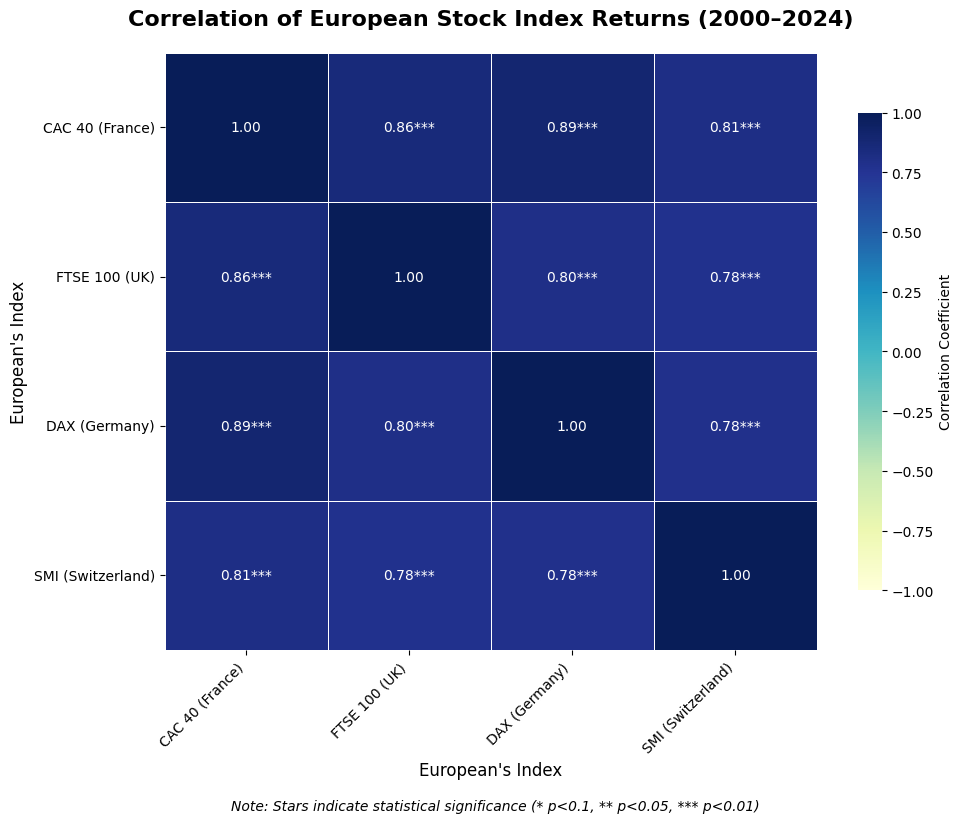

In [100]:
# Reverse mapping (Yahoo ticker → Human-readable label)
ticker_labels = {v: k for k, v in tickers.items()}

# Compute correlation matrix
corr_matrix = log_europe_returns.corr()

# Compute significance (p-values) for each correlation
pvals = pd.DataFrame(np.ones(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j:
            r, p = pearsonr(log_europe_returns[i].dropna(), log_europe_returns[j].dropna())
            pvals.loc[i, j] = p

# Function to add stars based on p-value
def significance_stars(p):
    if p < 0.01:
        return "***"  # highly significant
    elif p < 0.05:
        return "**"
    elif p < 0.1:
        return "*"
    else:
        return ""

# Annotate with correlation + stars
annot = corr_matrix.copy()
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        stars = significance_stars(pvals.loc[i, j])
        annot.loc[i, j] = f"{corr_matrix.loc[i, j]:.2f}{stars}"

# Replace tickers with human-readable labels
corr_matrix.rename(index=ticker_labels, columns=ticker_labels, inplace=True)
annot.rename(index=ticker_labels, columns=ticker_labels, inplace=True)

# Plot Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix.astype(float),
    annot=annot,              # show correlation + significance stars
    fmt="",                   # keep as string
    cmap="YlGnBu",            # blue-green colormap
    vmin=-1, vmax=1,          # fix scale to [-1, 1]
    linewidths=0.7,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Bold title
plt.title("Correlation of European Stock Index Returns (2000–2024)", fontsize=16, fontweight="bold", pad=20)

# Axis labels
plt.xlabel("European's Index", fontsize=12)
plt.ylabel("European's Index", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Caption at the bottom center
plt.figtext(0.5, -0.02, "Note: Stars indicate statistical significance (* p<0.1, ** p<0.05, *** p<0.01)",
            ha="center", fontsize=10, style="italic")

plt.tight_layout()
plt.show()

In [101]:
# Prepare empty list for results
corr_results = []

# Loop through combinations of indices
cols = log_europe_returns.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):   # avoid duplicates & self-correlation
        idx1, idx2 = cols[i], cols[j]
        series1, series2 = log_europe_returns[idx1].dropna(), log_europe_returns[idx2].dropna()

        # Compute correlation and p-value
        corr, pval = pearsonr(series1, series2)

        # Add significance stars
        if pval < 0.01:
            sig = "***"
        elif pval < 0.05:
            sig = "**"
        elif pval < 0.1:
            sig = "*"
        else:
            sig = ""

        # Append result
        corr_results .append([ticker_labels[idx1], ticker_labels[idx2], corr, pval, sig])

# Convert to DataFrame
corr_table = pd.DataFrame(corr_results , columns=["Index 1", "Index 2", "Correlation", "p-value", "Significance"])

# Reset index to start at 1
corr_table.index = corr_table.index + 1

# Round numbers for readability
corr_table["Correlation"] = corr_table["Correlation"].round(3)
corr_table["p-value"] = corr_table["p-value"].round(4)

# Display final table
print(corr_table)

           Index 1            Index 2  Correlation  p-value Significance
1  CAC 40 (France)      FTSE 100 (UK)        0.858      0.0          ***
2  CAC 40 (France)      DAX (Germany)        0.891      0.0          ***
3  CAC 40 (France)  SMI (Switzerland)        0.807      0.0          ***
4    FTSE 100 (UK)      DAX (Germany)        0.797      0.0          ***
5    FTSE 100 (UK)  SMI (Switzerland)        0.781      0.0          ***
6    DAX (Germany)  SMI (Switzerland)        0.781      0.0          ***


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# Econometric Analysis

In [102]:
def extract_panels(europe_index, tickers):
    """
    Extracts 'Close', 'Simple_Return', and 'Log_Return' panels from a MultiIndex DataFrame
    and renames columns to human-readable names.

    This function is designed to handle a DataFrame with a multi-level column index,
    such as those often created by data libraries like `yfinance`. It efficiently
    selects specific data series (e.g., Close prices, log returns) and uses a
    provided dictionary to replace cryptic ticker symbols with clear names,
    making the data much easier to work with.

    Parameters
    ----------
    europe_index : pandas.DataFrame
        A MultiIndex DataFrame (from yfinance) with columns
        like ('Close', '^FTSE'), ('Log_Return', '^GDAXI'), etc.
    tickers : dict
        A dictionary mapping human-readable names to Yahoo Finance tickers.

    Returns
    -------
    tuple of pandas.DataFrame
        - close_prices   : DataFrame of closing prices (columns = human-readable names)
        - simple_returns : DataFrame of simple returns (columns = human-readable names)
        - log_returns    : DataFrame of log returns (columns = human-readable names)
    """
    # Create a reverse mapping from Yahoo ticker symbols to human-readable names.
    # This dictionary comprehension efficiently swaps keys and values from the input 'tickers' dictionary.
    ticker_labels = {v: k for k, v in tickers.items()}

    # Extract closing prices
    # Use the `.xs()` method to select a cross-section of the DataFrame.
    # We are selecting all columns at `level=0` that have the label 'Close'.
    close_prices = europe_index.xs('Close', axis=1, level=0, drop_level=False).copy()
    # The columns of 'close_prices' are still tuples like ('Close', '^FTSE').
    # This line renames the columns using the 'ticker_labels' mapping.
    # It gets the human-readable name for each ticker (the second element of the tuple) or keeps the original name if not found.
    close_prices.columns = [ticker_labels.get(col[1], col[1]) for col in close_prices.columns]

    # Extract simple returns
    # The same process is repeated to extract the 'Simple_Return' data.
    simple_returns = europe_index.xs('Simple_Return', axis=1, level=0, drop_level=False).copy()
    # Rename the columns from ticker symbols to human-readable names.
    simple_returns.columns = [ticker_labels.get(col[1], col[1]) for col in simple_returns.columns]

    # Extract log returns
    # And again for the 'Log_Return' data.
    log_returns = europe_index.xs('Log_Return', axis=1, level=0, drop_level=False).copy()
    # Rename the columns from ticker symbols to human-readable names.
    log_returns.columns = [ticker_labels.get(col[1], col[1]) for col in log_returns.columns]

    # Return the three newly created DataFrames in a tuple.
    return close_prices, simple_returns, log_returns

# Call the function to execute the data extraction and renaming.
# The returned tuple is unpacked into three separate variables for easy access.
close_prices, simple_returns, log_returns = extract_panels(europe_index, tickers)

# Print the first few rows of the cleaned DataFrames to verify the changes.
print("Close Prices (human-readable):")
print(close_prices.head())
print("\nSimple Returns (human-readable):")
print(simple_returns.head())
print("\nLog Returns (human-readable):")
print(log_returns.head())

Close Prices (human-readable):
            CAC 40 (France)  FTSE 100 (UK)  DAX (Germany)  SMI (Switzerland)
Date                                                                        
1998-01-05      3072.800049    5262.500000    4416.950195        6397.000000
1998-01-06      3037.699951    5264.399902    4360.049805        6375.700195
1998-01-07      3006.699951    5224.100098    4339.979980        6390.000000
1998-01-08      2954.899902    5237.100098    4293.640137        6330.200195
1998-01-09      2919.800049    5138.299805    4237.750000        6251.799805

Simple Returns (human-readable):
            CAC 40 (France)  FTSE 100 (UK)  DAX (Germany)  SMI (Switzerland)
Date                                                                        
1998-01-05         0.011222       0.013286       0.012059           0.000000
1998-01-06        -0.011423       0.000361      -0.012882          -0.003330
1998-01-07        -0.010205      -0.007655      -0.004603           0.002243
1998-01-08 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [103]:
def validate_ftse_and_peers(data, ftse_name='FTSE 100 (UK)', tickers=None):
    """
    Validate the presence of a primary index (e.g., FTSE 100) in a processed DataFrame
    and separate it from its peers.

    This function uses a DataFrame with human-readable column names (e.g., from extract_panels)
    to validate the FTSE index and identify its peer indices.
    It ensures the specified FTSE name exists and separates it from other indices.

    Parameters
    ----------
    data : pandas.DataFrame
        A DataFrame of closing prices with human-readable column names (e.g., from extract_panels).
    ftse_name : str, optional
        The human-readable name of the FTSE index to validate. Defaults to 'FTSE 100 (UK)'.
    tickers : dict, optional
        Dictionary mapping human-readable index names to Yahoo Finance tickers.
        Example: {'CAC 40 (France)': '^FCHI', 'DAX (Germany)': '^GDAXI',
                  'FTSE 100 (UK)': '^FTSE', 'SMI (Switzerland)': '^SSMI'}

    Returns
    -------
    tuple (ftse_name, peers)
        - ftse_name : str
            The validated FTSE index name (human-readable).
        - peers : list of str
            Human-readable names for all other indices.

    Raises
    ------
    ValueError
        If the specified 'ftse_name' is not found in the DataFrame columns or if tickers is None.
    """
    # Ensure tickers dictionary is provided.
    if tickers is None:
        raise ValueError("You must provide a dictionary of tickers to validate indices.")

    # Check if FTSE name exists in the tickers dictionary
    if ftse_name not in tickers:
        raise ValueError(
            f"'{ftse_name}' not found in tickers dictionary. "
            f"Available keys: {list(tickers.keys())}"
        )

    # Check if FTSE name is present in DataFrame columns
    if ftse_name not in data.columns:
        raise ValueError(
            f"'{ftse_name}' not found in DataFrame columns. "
            f"Available columns: {list(data.columns)}"
        )

    # Create a list of all human-readable names from the DataFrame columns.
    available_indices = list(data.columns)

    # Create a list of peer names by excluding the FTSE name.
    peers = [index for index in available_indices if index != ftse_name]

    # Print a confirmation message to show that the validation was successful.
    print(f"✅ FTSE index '{ftse_name}' found successfully.")
    print("📊 Peers to compare with FTSE:")
    print(peers)

    # Return the validated FTSE name and the list of its peers.
    return ftse_name, peers


# Call the function to perform the validation and separation
ftse, peers = validate_ftse_and_peers(close_prices, ftse_name="FTSE 100 (UK)", tickers=tickers)

# Print the final, validated variables to the console for confirmation
print("\n--- Function Return Values ---")
print("FTSE Index:", ftse)
print("Peers:", peers)

✅ FTSE index 'FTSE 100 (UK)' found successfully.
📊 Peers to compare with FTSE:
['CAC 40 (France)', 'DAX (Germany)', 'SMI (Switzerland)']

--- Function Return Values ---
FTSE Index: FTSE 100 (UK)
Peers: ['CAC 40 (France)', 'DAX (Germany)', 'SMI (Switzerland)']


## ADF test

In [104]:
def adf_stationary_test(panel, ftse_name, peers, panel_name="Close Prices", alpha=0.05):
    """
    Perform Augmented Dickey-Fuller (ADF) tests on financial time series data.

    This function checks whether time series (panel data and their first differences)
    are stationary. It runs the ADF test using both the Akaike Information Criterion (AIC)
    and Bayesian Information Criterion (BIC) for automatic lag selection.

    The function prints detailed console output for each series and produces a tidy
    summary table as a pandas DataFrame.

    Parameters
    ----------
    panel : pandas.DataFrame
        DataFrame containing financial time series (from extract_panels),
        with human-readable column names.
        Examples: close_prices, simple_returns, log_returns.
    ftse_name : str
        The human-readable name of the primary index (e.g., "FTSE 100 (UK)").
    peers : list of str
        List of peer indices to compare with the FTSE index.
    panel_name : str, optional
        A label for the panel being tested. Defaults to "Close Prices".
    alpha : float, optional
        Significance level for stationarity classification. Defaults to 0.05.

    Returns
    -------
    pandas.DataFrame
        A summary DataFrame containing ADF statistics, p-values,
        number of lags, number of observations, and classification
        (Stationary or Non-stationary).
    """

    # --- Subset the DataFrame to include only FTSE and peers ---
    # Create a list of columns that are present in the input panel.
    cols = [c for c in panel.columns if c in [ftse_name] + peers]
    df_panel = panel[cols].dropna(how='all')   # Drop any rows that are completely empty.

    # --- Compute first differences of the panel ---
    dpanel = df_panel.diff().dropna(how='all') # Drop any rows that become empty after differencing.

    # --- Helper function: run and print one ADF test ---
    def run_adf_test(series, label, criterion='AIC'):
        """
        Run the ADF test for one series and print the results.
        """
        # Convert the input to a pandas Series and drop any missing values to ensure the test runs correctly.
        s = pd.Series(series).dropna()
        # Perform the ADF test with a constant term ('c') and automatic lag selection based on the given criterion.
        stat, p, usedlag, nobs, crit, icbest = adfuller(
            s, regression='c', autolag=criterion
        )
        # Print a neatly formatted line with the test results for the console.
        print(f"{label:<35} | [{criterion}] ADF stat: {stat:>8.3f} | "
              f"p-value: {p:>6.4f} | lags: {usedlag:>2} | nobs: {nobs}")
        # Return the key statistics from the test.
        return stat, p, usedlag, nobs

    # --- Helper function: run ADF test with both AIC and BIC ---
    def run_adf_test_both(series):
        """
        Run the ADF test twice (once with AIC, once with BIC)
        and return the results in a dictionary.
        """
        # Ensure the series has no missing values.
        s = pd.Series(series).dropna()
        # Run the ADF test using AIC for lag selection. `*_` is used to discard unwanted return values.
        a_stat, a_p, a_lags, a_nobs, *_ = adfuller(s, regression='c', autolag='AIC')
        # Run the ADF test using BIC for lag selection.
        b_stat, b_p, b_lags, b_nobs, *_ = adfuller(s, regression='c', autolag='BIC')
        # Return a dictionary containing the results from both tests.
        return {
            'AIC': {'stat': a_stat, 'p': a_p, 'lags': a_lags, 'nobs': a_nobs},
            'BIC': {'stat': b_stat, 'p': b_p, 'lags': b_lags, 'nobs': b_nobs},
        }

    # --- Run and print ADF tests ---
    print(f"\n📊 Running ADF Tests on {panel_name}")

    # Run ADF test on the original series using AIC
    print(f"\nADF on {panel_name} (AIC)")
    for name in [ftse_name] + peers:
        if name in df_panel.columns:
            run_adf_test(df_panel[name], f"{panel_name}: {name}", 'AIC')

    # Run ADF test on the original series using BIC
    print(f"\nADF on {panel_name} (BIC)")
    for name in [ftse_name] + peers:
        if name in df_panel.columns:
            run_adf_test(df_panel[name], f"{panel_name}: {name}", 'BIC')

    # Run ADF test on the first-differenced series using AIC
    print(f"\nADF on Δ{panel_name} (AIC)")
    for name in [ftse_name] + peers:
        if name in dpanel.columns:
            run_adf_test(dpanel[name], f"Δ{panel_name}: {name}", 'AIC')

    # Run ADF test on the first-differenced series using BIC
    print(f"\nADF on Δ{panel_name} (BIC)")
    for name in [ftse_name] + peers:
        if name in dpanel.columns:
            run_adf_test(dpanel[name], f"Δ{panel_name}: {name}", 'BIC')


    # --- Build a summary table for results ---
    rows = [] # Initialize a list to hold the rows of our summary table.
    # Create a list of tuples with labels and their corresponding dataframes.
    ordered_variants = [
        (f'{panel_name}', df_panel),
        (f'Δ{panel_name}', dpanel),
    ]

    # Loop through each index and each data variant to generate a row for the summary table.
    for name in [ftse_name] + peers:
        for variant_label, df in ordered_variants:
            # Skip if the DataFrame or column is missing for the current index.
            if df is None or name not in df.columns:
                continue
            # Run the ADF test using both AIC and BIC to get all necessary statistics.
            res = run_adf_test_both(df[name])
            # Get the p-values from the test results.
            aic_p, bic_p = res['AIC']['p'], res['BIC']['p']
            # Append a dictionary representing a row to the `rows` list.
            rows.append({
                'Series': name,
                'Variant': variant_label,
                'ADF stat (AIC)': res['AIC']['stat'],
                'p-value (AIC)': aic_p,
                'Lags (AIC)': res['AIC']['lags'],
                'Nobs (AIC)': res['AIC']['nobs'],
                # Classify the series as stationary or non-stationary based on the AIC p-value.
                'Classification (AIC)': 'Stationary' if aic_p < alpha else 'Non-stationary (unit root)',
                'ADF stat (BIC)': res['BIC']['stat'],
                'p-value (BIC)': bic_p,
                'Lags (BIC)': res['BIC']['lags'],
                'Nobs (BIC)': res['BIC']['nobs'],
                # Classify the series based on the BIC p-value.
                'Classification (BIC)': 'Stationary' if bic_p < alpha else 'Non-stationary (unit root)',
            })

    # Convert the list of dictionaries into a pandas DataFrame.
    result_df = pd.DataFrame(rows)

    # If the DataFrame is not empty, proceed with formatting.
    if not result_df.empty:
        # Define categories for the 'Variant' column to ensure a stable sorting order.
        result_df['Variant'] = pd.Categorical(
            result_df['Variant'],
            categories=[f'{panel_name}', f'Δ{panel_name}'],
            ordered=True
        )
        # Sort the DataFrame by the series name and then by the variant type.
        result_df = result_df.sort_values(['Series', 'Variant']).reset_index(drop=True)
        # Start the index from 1 for better readability.
        result_df.index = result_df.index + 1

        # Print a success message and display the final summary table.
        print(f"\n✅ ADF Summary for {panel_name} and Δ{panel_name}")
        # display(result_df)
    else:
        # If no data was processed, print a warning message.
        print(f"⚠️ No matching columns found in {panel_name} for the requested series.")

    # Return the final DataFrame containing the ADF test results.
    return result_df

In [105]:
# Step 1: Extract panels (already human-readable)
close_prices, simple_returns, log_returns = extract_panels(europe_index, tickers)

# Step 2: Validate FTSE and peers
ftse_name, peers = validate_ftse_and_peers(close_prices, ftse_name="FTSE 100 (UK)", tickers=tickers)

# Step 3: Run ADF tests
adf_close  = adf_stationary_test(close_prices, ftse_name, peers, panel_name="Close Prices", alpha=0.05)
adf_log    = adf_stationary_test(log_returns, ftse_name, peers, panel_name="Log Returns", alpha=0.05)
adf_simple = adf_stationary_test(simple_returns, ftse_name, peers, panel_name="Simple Returns", alpha=0.05)

✅ FTSE index 'FTSE 100 (UK)' found successfully.
📊 Peers to compare with FTSE:
['CAC 40 (France)', 'DAX (Germany)', 'SMI (Switzerland)']

📊 Running ADF Tests on Close Prices

ADF on Close Prices (AIC)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Close Prices: FTSE 100 (UK)         | [AIC] ADF stat:   -1.952 | p-value: 0.3079 | lags:  7 | nobs: 6917


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Close Prices: CAC 40 (France)       | [AIC] ADF stat:   -1.644 | p-value: 0.4604 | lags:  6 | nobs: 6918


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Close Prices: DAX (Germany)         | [AIC] ADF stat:    0.270 | p-value: 0.9759 | lags:  0 | nobs: 6924


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Close Prices: SMI (Switzerland)     | [AIC] ADF stat:   -1.259 | p-value: 0.6475 | lags:  6 | nobs: 6918

ADF on Close Prices (BIC)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Close Prices: FTSE 100 (UK)         | [BIC] ADF stat:   -2.219 | p-value: 0.1996 | lags:  0 | nobs: 6924


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Close Prices: CAC 40 (France)       | [BIC] ADF stat:   -1.799 | p-value: 0.3808 | lags:  0 | nobs: 6924


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Close Prices: DAX (Germany)         | [BIC] ADF stat:    0.270 | p-value: 0.9759 | lags:  0 | nobs: 6924


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Close Prices: SMI (Switzerland)     | [BIC] ADF stat:   -1.384 | p-value: 0.5899 | lags:  0 | nobs: 6924

ADF on ΔClose Prices (AIC)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔClose Prices: FTSE 100 (UK)        | [AIC] ADF stat:  -32.764 | p-value: 0.0000 | lags:  6 | nobs: 6917


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔClose Prices: CAC 40 (France)      | [AIC] ADF stat:  -35.861 | p-value: 0.0000 | lags:  5 | nobs: 6918


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔClose Prices: DAX (Germany)        | [AIC] ADF stat:  -83.884 | p-value: 0.0000 | lags:  0 | nobs: 6923


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔClose Prices: SMI (Switzerland)    | [AIC] ADF stat:  -36.201 | p-value: 0.0000 | lags:  5 | nobs: 6918

ADF on ΔClose Prices (BIC)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔClose Prices: FTSE 100 (UK)        | [BIC] ADF stat:  -51.448 | p-value: 0.0000 | lags:  2 | nobs: 6921


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔClose Prices: CAC 40 (France)      | [BIC] ADF stat:  -84.457 | p-value: 0.0000 | lags:  0 | nobs: 6923


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔClose Prices: DAX (Germany)        | [BIC] ADF stat:  -83.884 | p-value: 0.0000 | lags:  0 | nobs: 6923


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔClose Prices: SMI (Switzerland)    | [BIC] ADF stat:  -81.430 | p-value: 0.0000 | lags:  0 | nobs: 6923


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



✅ ADF Summary for Close Prices and ΔClose Prices

📊 Running ADF Tests on Log Returns

ADF on Log Returns (AIC)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Log Returns: FTSE 100 (UK)          | [AIC] ADF stat:  -15.787 | p-value: 0.0000 | lags: 33 | nobs: 6891


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Log Returns: CAC 40 (France)        | [AIC] ADF stat:  -14.508 | p-value: 0.0000 | lags: 33 | nobs: 6891


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Log Returns: DAX (Germany)          | [AIC] ADF stat:  -14.571 | p-value: 0.0000 | lags: 30 | nobs: 6894


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Log Returns: SMI (Switzerland)      | [AIC] ADF stat:  -37.030 | p-value: 0.0000 | lags:  5 | nobs: 6919

ADF on Log Returns (BIC)
Log Returns: FTSE 100 (UK)          | [BIC] ADF stat:  -37.390 | p-value: 0.0000 | lags:  5 | nobs: 6919


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Log Returns: CAC 40 (France)        | [BIC] ADF stat:  -84.417 | p-value: 0.0000 | lags:  0 | nobs: 6924
Log Returns: DAX (Germany)          | [BIC] ADF stat:  -83.720 | p-value: 0.0000 | lags:  0 | nobs: 6924


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Log Returns: SMI (Switzerland)      | [BIC] ADF stat:  -37.030 | p-value: 0.0000 | lags:  5 | nobs: 6919

ADF on ΔLog Returns (AIC)
ΔLog Returns: FTSE 100 (UK)         | [AIC] ADF stat:  -23.891 | p-value: 0.0000 | lags: 35 | nobs: 6888


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔLog Returns: CAC 40 (France)       | [AIC] ADF stat:  -23.636 | p-value: 0.0000 | lags: 35 | nobs: 6888
ΔLog Returns: DAX (Germany)         | [AIC] ADF stat:  -25.994 | p-value: 0.0000 | lags: 31 | nobs: 6892


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔLog Returns: SMI (Switzerland)     | [AIC] ADF stat:  -24.394 | p-value: 0.0000 | lags: 34 | nobs: 6889

ADF on ΔLog Returns (BIC)
ΔLog Returns: FTSE 100 (UK)         | [BIC] ADF stat:  -28.014 | p-value: 0.0000 | lags: 28 | nobs: 6895


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔLog Returns: CAC 40 (France)       | [BIC] ADF stat:  -28.294 | p-value: 0.0000 | lags: 28 | nobs: 6895
ΔLog Returns: DAX (Germany)         | [BIC] ADF stat:  -28.148 | p-value: 0.0000 | lags: 28 | nobs: 6895


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔLog Returns: SMI (Switzerland)     | [BIC] ADF stat:  -28.173 | p-value: 0.0000 | lags: 28 | nobs: 6895


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


✅ ADF Summary for Log Returns and ΔLog Returns

📊 Running ADF Tests on Simple Returns

ADF on Simple Returns (AIC)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Simple Returns: FTSE 100 (UK)       | [AIC] ADF stat:  -16.007 | p-value: 0.0000 | lags: 33 | nobs: 6891


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Simple Returns: CAC 40 (France)     | [AIC] ADF stat:  -14.725 | p-value: 0.0000 | lags: 33 | nobs: 6891
Simple Returns: DAX (Germany)       | [AIC] ADF stat:  -14.751 | p-value: 0.0000 | lags: 30 | nobs: 6894


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Simple Returns: SMI (Switzerland)   | [AIC] ADF stat:  -37.212 | p-value: 0.0000 | lags:  5 | nobs: 6919

ADF on Simple Returns (BIC)
Simple Returns: FTSE 100 (UK)       | [BIC] ADF stat:  -37.606 | p-value: 0.0000 | lags:  5 | nobs: 6919


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Simple Returns: CAC 40 (France)     | [BIC] ADF stat:  -51.321 | p-value: 0.0000 | lags:  2 | nobs: 6922
Simple Returns: DAX (Germany)       | [BIC] ADF stat:  -83.871 | p-value: 0.0000 | lags:  0 | nobs: 6924


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Simple Returns: SMI (Switzerland)   | [BIC] ADF stat:  -37.212 | p-value: 0.0000 | lags:  5 | nobs: 6919

ADF on ΔSimple Returns (AIC)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔSimple Returns: FTSE 100 (UK)      | [AIC] ADF stat:  -23.925 | p-value: 0.0000 | lags: 35 | nobs: 6888
ΔSimple Returns: CAC 40 (France)    | [AIC] ADF stat:  -23.675 | p-value: 0.0000 | lags: 35 | nobs: 6888


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔSimple Returns: DAX (Germany)      | [AIC] ADF stat:  -26.029 | p-value: 0.0000 | lags: 31 | nobs: 6892


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔSimple Returns: SMI (Switzerland)  | [AIC] ADF stat:  -24.471 | p-value: 0.0000 | lags: 34 | nobs: 6889

ADF on ΔSimple Returns (BIC)
ΔSimple Returns: FTSE 100 (UK)      | [BIC] ADF stat:  -28.094 | p-value: 0.0000 | lags: 28 | nobs: 6895


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔSimple Returns: CAC 40 (France)    | [BIC] ADF stat:  -28.381 | p-value: 0.0000 | lags: 28 | nobs: 6895
ΔSimple Returns: DAX (Germany)      | [BIC] ADF stat:  -28.200 | p-value: 0.0000 | lags: 28 | nobs: 6895


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


ΔSimple Returns: SMI (Switzerland)  | [BIC] ADF stat:  -28.238 | p-value: 0.0000 | lags: 28 | nobs: 6895


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


✅ ADF Summary for Simple Returns and ΔSimple Returns


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


| **Column**         | **Meaning**                                                                                                          |
| ------------------ | -------------------------------------------------------------------------------------------------------------------- |
| **Series**         | The stock index being tested (e.g., CAC 40, DAX, FTSE 100, SMI).                                                     |
| **Variant**        | The type of data tested: original **Close Prices** or **ΔClose Prices** (first differences).                         |
| **ADF stat (AIC)** | Test statistic from the ADF test using AIC-based lag selection. More negative = stronger evidence of stationarity.   |
| **p-value (AIC)**  | Probability of observing data if the series has a unit root (null hypothesis). If **p < α**, reject H₀ → stationary. |
| **Lags (AIC)**     | Number of lags chosen under AIC criterion for the ADF regression.                                                    |
| **Nobs (AIC)**     | Number of usable observations (after lags removed) for the ADF test.                                                 |
| **Classification (AIC)**    | Interpretation: “Stationary” if p < α, otherwise “Non-stationary (unit root)”.                                       |
| **ADF stat (BIC)** | Same as ADF stat but using BIC-based lag selection.                                                                  |
| **p-value (BIC)**  | Same as p-value but under BIC criterion.                                                                             |
| **Lags (BIC)**     | Number of lags chosen under BIC criterion.                                                                           |
| **Nobs (BIC)**     | Number of observations used under BIC.                                                                               |
| **Classification (BIC)**    | Stationarity classification under BIC.                                                                               |


In [106]:
display(adf_close)

Series        Variant  ADF stat (AIC)  p-value (AIC)  \
1    CAC 40 (France)   Close Prices       -1.643567       0.460398   
2    CAC 40 (France)  ΔClose Prices      -35.860726       0.000000   
3      DAX (Germany)   Close Prices        0.269803       0.975916   
4      DAX (Germany)  ΔClose Prices      -83.883607       0.000000   
5      FTSE 100 (UK)   Close Prices       -1.952139       0.307944   
6      FTSE 100 (UK)  ΔClose Prices      -32.763662       0.000000   
7  SMI (Switzerland)   Close Prices       -1.259472       0.647504   
8  SMI (Switzerland)  ΔClose Prices      -36.200576       0.000000   

   Lags (AIC)  Nobs (AIC)        Classification (AIC)  ADF stat (BIC)  \
1           6        6918  Non-stationary (unit root)       -1.799366   
2           5        6918                  Stationary      -84.457321   
3           0        6924  Non-stationary (unit root)        0.269803   
4           0        6923                  Stationary      -83.883607   
5           7        6917  Non-stationary (unit root)       -2.218639   
6           6        6917                  Stationary      -51.448144   
7           6        6918  Non-stationary (unit root)       -1.384055   
8           5        6918                  Stationary      -81.429554   

   p-value (BIC)  Lags (BIC)  Nobs (BIC)        Classification (BIC)  
1       0.380776           0        6924  Non-stationary (unit root)  
2       0.000000           0        6923                  Stationary  
3       0.975916           0        6924  Non-stationary (unit root)  
4       0.000000           0        6923                  Stationary  
5       0.199550           0        6924  Non-stationary (unit root)  
6       0.000000           2        6921                  Stationary  
7       0.589896           0        6924  Non-stationary (unit root)  
8       0.000000           0        6923                  Stationary

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [107]:
adf_delta_close = adf_close[adf_close["Variant"] == "ΔClose Prices"]
adf_delta_close

Series        Variant  ADF stat (AIC)  p-value (AIC)  \
2    CAC 40 (France)  ΔClose Prices      -35.860726            0.0   
4      DAX (Germany)  ΔClose Prices      -83.883607            0.0   
6      FTSE 100 (UK)  ΔClose Prices      -32.763662            0.0   
8  SMI (Switzerland)  ΔClose Prices      -36.200576            0.0   

   Lags (AIC)  Nobs (AIC) Classification (AIC)  ADF stat (BIC)  p-value (BIC)  \
2           5        6918           Stationary      -84.457321            0.0   
4           0        6923           Stationary      -83.883607            0.0   
6           6        6917           Stationary      -51.448144            0.0   
8           5        6918           Stationary      -81.429554            0.0   

   Lags (BIC)  Nobs (BIC) Classification (BIC)  
2           0        6923           Stationary  
4           0        6923           Stationary  
6           2        6921           Stationary  
8           0        6923           Stationary

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## Cointegration test

"Even though the FTSE, CAC, DAX, and SMI closing prices levels are  all non-stationary (as confirmed with the ADF test), do they move together in the long run? Is there a stable, predictable relationship between them?. The key idea is that if the time series are cointegrated, the residuals from their long-run regression will be stationary (i.e., I(0))"

In [108]:
def engle_granger_pairwise(panel, ftse_name, peers, panel_name="Close Prices", alpha=0.05, ic="aic", visualize=True):
    """
    Perform Engle-Granger (EG) pairwise cointegration tests between FTSE 100
    and each of its peer indices, with optional visualization.

    Parameters
    ----------
    panel : pandas.DataFrame
        DataFrame containing financial time series (from extract_panels),
        with human-readable column names (e.g., close_prices, log_returns).
    ftse_name : str
        Human-readable name of FTSE index (e.g., "FTSE 100 (UK)").
    peers : list of str
        Human-readable names of peer indices to compare against FTSE.
    panel_name : str, optional
        A label for the panel being tested. Defaults to "Close Prices".
    alpha : float, optional
        Significance level for rejecting the null hypothesis of no cointegration.
        Defaults to 0.05.
    ic : str, optional
        Information criterion for lag selection ("aic" or "bic"). Defaults to "aic".
        Aligned with adf_stationary_test.
    visualize : bool, optional
        If True, generates scatterplots with regression lines and residual plots
        for each FTSE–peer pair.

    Returns
    -------
    pd.DataFrame
        A summary DataFrame with results for each FTSE–peer pair, including:
        - Engle-Granger test statistic
        - p-value
        - Critical values
        - Lag length selected
        - Information criterion used
        - Classification
    """

    rows = []

    for peer in peers:
        if ftse_name not in panel.columns or peer not in panel.columns:
            continue

        # Drop missing values
        df_pair = panel[[ftse_name, peer]].dropna()

        # Run Engle-Granger cointegration test
        eg_stat, eg_pval, eg_crit = coint(df_pair[ftse_name], df_pair[peer], trend="c", autolag=ic)

        # Run regression to get coefficients
        X = sm.add_constant(df_pair[peer])
        model = sm.OLS(df_pair[ftse_name], X).fit()
        intercept, slope = model.params

        # Residuals
        fitted = model.predict(X)
        residuals = df_pair[ftse_name] - fitted

        # Estimate lag length explicitly using ADF on residuals
        adf_stat, adf_p, usedlag, nobs, crit_vals, icbest = adfuller(residuals, regression="c", autolag=ic)

        # Store results
        rows.append({
            "FTSE vs Peer": f"{ftse_name} vs {peer}",
            "EG Stat": eg_stat,
            "EG p-value": eg_pval,
            "EG 1% Critical": eg_crit[0],
            "EG 5% Critical": eg_crit[1],
            "EG 10% Critical": eg_crit[2],
            "Lag Criterion": ic.upper(),
            "Lags Used": usedlag,
            "Classification": "Cointegrated" if eg_pval < alpha else "Not Cointegrated"
        })

        # Visualization
        if visualize:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))

            # Scatterplot + regression line
            axes[0].scatter(df_pair[peer], df_pair[ftse_name], alpha=0.5, label="Observed values")
            axes[0].plot(df_pair[peer], fitted, color="red", linewidth=2,
                         label=f"OLS: {ftse_name} = {intercept:.2f} + {slope:.2f}·{peer}")
            axes[0].set_title(
                f"{ftse_name} vs {peer} — {panel_name}\n"
                f"Engle-Granger p={eg_pval:.4f} → {('Cointegrated' if eg_pval < alpha else 'Not Cointegrated')}"
            )
            axes[0].set_xlabel(peer)
            axes[0].set_ylabel(ftse_name)
            axes[0].legend()
            axes[0].grid(True, linestyle="--", alpha=0.6)

            # Residual plot
            axes[1].plot(residuals, color="blue", alpha=0.7, label="Residuals")
            axes[1].axhline(y=0, color="red", linestyle="--", linewidth=1, label="Zero Line")
            axes[1].set_title(
                f"Residuals from FTSE–{peer} Regression\n(IC={ic.upper()}, Lags={usedlag})"
            )
            axes[1].set_xlabel("Time")
            axes[1].set_ylabel("Residuals")
            axes[1].legend()
            axes[1].grid(True, linestyle="--", alpha=0.6)

            plt.figtext(
                0.5, -0.02,
                f"Note: Scatter shows FTSE vs {peer} with OLS regression line; "
                f"right panel shows residuals. Engle–Granger test applied using {ic.upper()} "
                f"for lag selection (Lags={usedlag}).",
                wrap=True, ha="center", fontsize=9, style="italic"
            )

            plt.tight_layout()
            plt.show()

    result_df = pd.DataFrame(rows)
    result_df.index = result_df.index + 1

    #print("\n--- Engle-Granger Pairwise Results ---")
    #print(result_df)

    return result_df

✅ FTSE index 'FTSE 100 (UK)' found successfully.
📊 Peers to compare with FTSE:
['CAC 40 (France)', 'DAX (Germany)', 'SMI (Switzerland)']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


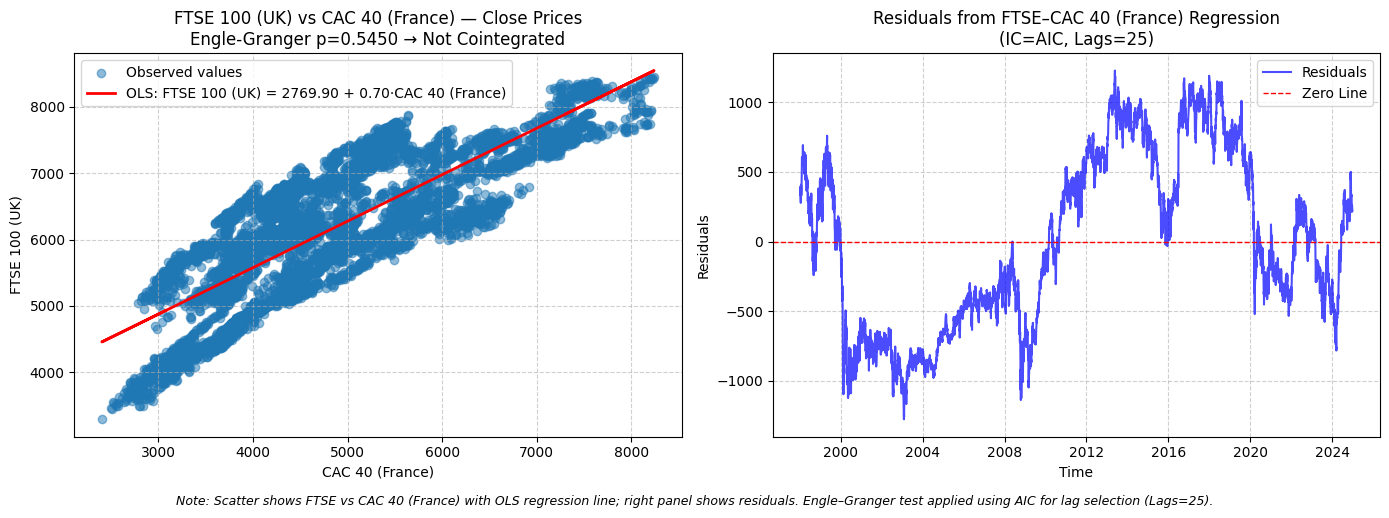

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

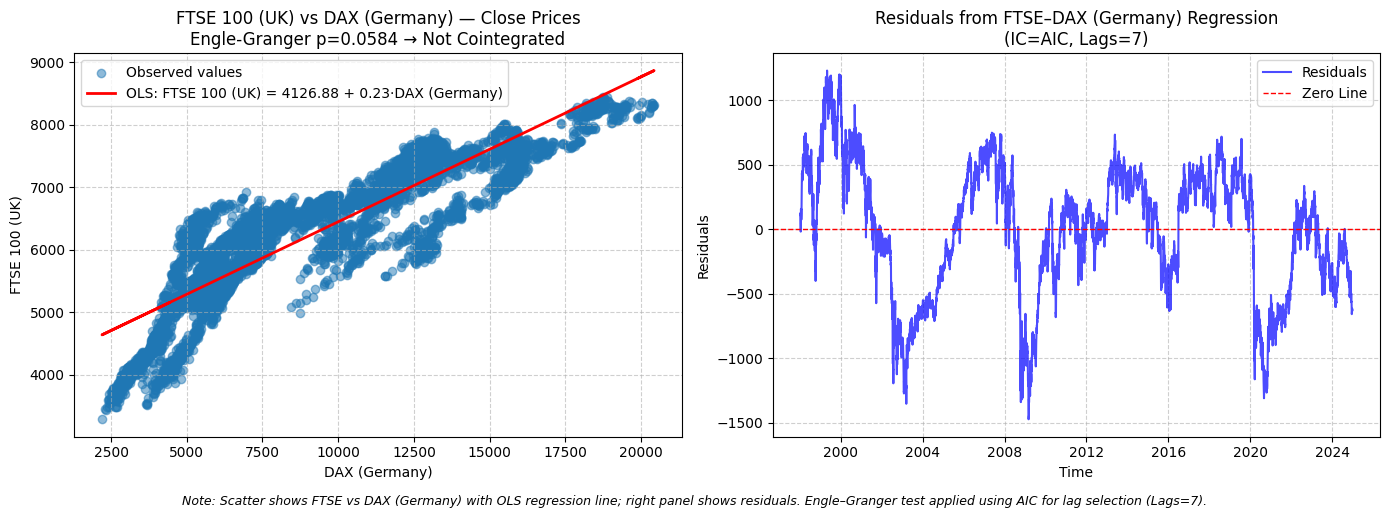

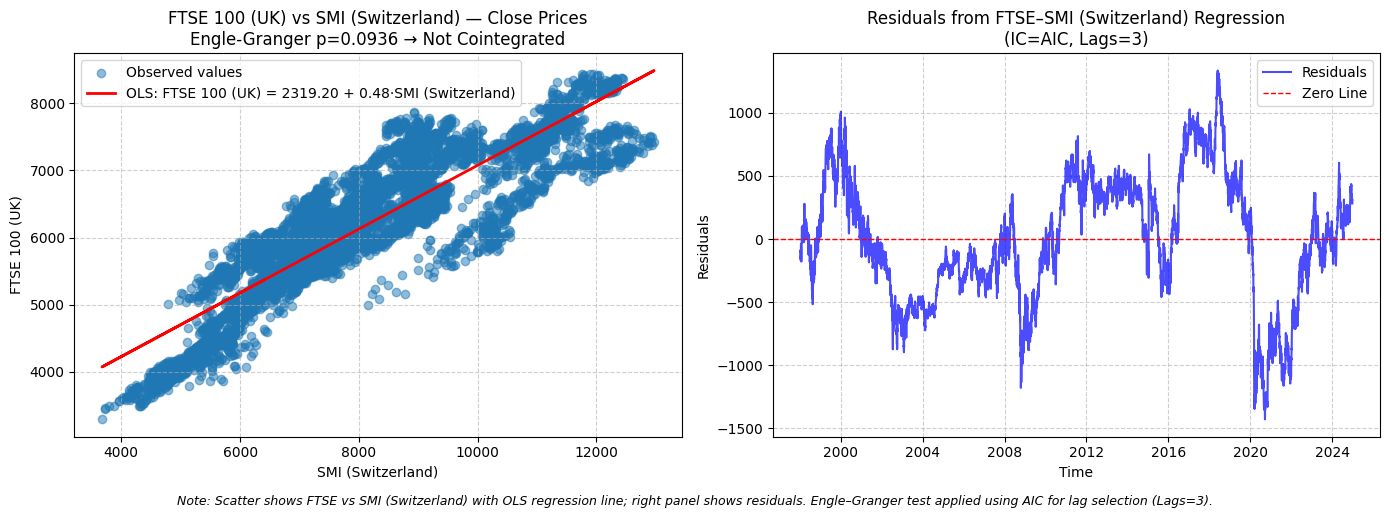

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [109]:
# Step 1: Extract panels
close_prices, simple_returns, log_returns = extract_panels(europe_index, tickers)

# Step 2: Validate FTSE and peers
ftse_name, peers = validate_ftse_and_peers(close_prices, ftse_name="FTSE 100 (UK)", tickers=tickers)

# Step 3: Run Engle-Granger tests (aligned with adf_stationary_test)
eg_results = engle_granger_pairwise(
    close_prices, ftse_name, peers, panel_name="Close Prices", alpha=0.05, ic="aic", visualize=True)

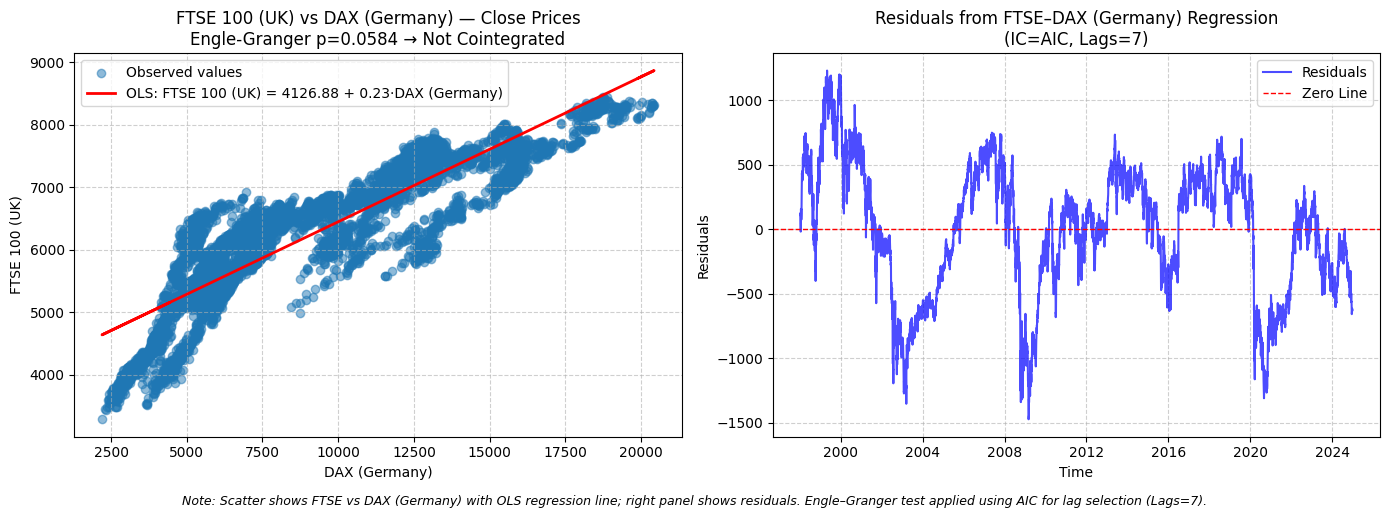

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


FTSE vs Peer   EG Stat  EG p-value  EG 1% Critical  \
1  FTSE 100 (UK) vs DAX (Germany) -3.274169    0.058375       -3.898022   

   EG 5% Critical  EG 10% Critical Lag Criterion  Lags Used    Classification  
1       -3.337013        -3.045063           AIC          7  Not Cointegrated

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [110]:
# Example: run Engle-Granger only for FTSE vs DAX (Germany)
eg_results_dax = engle_granger_pairwise(
    close_prices,
    ftse_name,
    peers=["DAX (Germany)"],   # ✅ pass a list with only one peer
    panel_name="Close Prices",
    alpha=0.05,
    ic="aic",
    visualize=True
)

# Display results
display(eg_results_dax)

In [111]:
print("\n--- Engle-Granger Pairwise Results ---")
display(eg_results)


--- Engle-Granger Pairwise Results ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


FTSE vs Peer   EG Stat  EG p-value  EG 1% Critical  \
1    FTSE 100 (UK) vs CAC 40 (France) -1.968415    0.544952       -3.898022   
2      FTSE 100 (UK) vs DAX (Germany) -3.274169    0.058375       -3.898022   
3  FTSE 100 (UK) vs SMI (Switzerland) -3.074075    0.093629       -3.898022   

   EG 5% Critical  EG 10% Critical Lag Criterion  Lags Used    Classification  
1       -3.337013        -3.045063           AIC         25  Not Cointegrated  
2       -3.337013        -3.045063           AIC          7  Not Cointegrated  
3       -3.337013        -3.045063           AIC          3  Not Cointegrated

## Identify parameter for ARIMA model (p,d,q)
*   p = The number of lagged observations
*   d = Order of differencing
*   q = The order of the moving average (MA)

Source: https://www.datacamp.com/tutorial/arima

In [112]:
adf_delta_close = close_prices.diff().dropna(how="all")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [113]:
def identify_arima_order(data, series_list, d=1, lags=40, alpha=0.05, ic="aic", title="ARIMA Identification"):
    """
    Identify the optimal ARIMA(p,d,q) order for one or multiple indices using ACF/PACF cutoffs and IC.

    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing differenced time series (e.g., ΔClose Prices).
    series_list : str or list
        Column name(s) of the series to analyze (e.g., "FTSE 100 (UK)" or ["FTSE 100 (UK)", "DAX (Germany)"]).
    d : int, optional
        Differencing order applied. Defaults to 1.
    lags : int, optional
        Number of lags for ACF/PACF plots. Defaults to 40.
    alpha : float, optional
        Significance level for ACF/PACF confidence intervals. Defaults to 0.05.
    ic : str, optional
        Information criterion ("aic" or "bic"). Defaults to "aic".
    title : str, optional
        Title prefix for plots.

    Returns
    -------
    pd.DataFrame
        Summary DataFrame with cutoff suggestion, cutoff IC, best ARIMA order, and best IC.
    """

    # Ensure input is a list
    if isinstance(series_list, str):
        series_list = [series_list]

    results = []

    # Suppress warnings
    warnings.filterwarnings("ignore")

    for series_name in series_list:
        # === Step 1: Select and clean series ===
        if series_name not in data.columns:
            raise KeyError(f"'{series_name}' not found in DataFrame columns: {list(data.columns)}")
        s = pd.Series(data[series_name]).dropna()

        # === Step 2: Cutoff rules ===
        acf_vals = sm.tsa.stattools.acf(s, nlags=lags, fft=False)
        pacf_vals = sm.tsa.stattools.pacf(s, nlags=lags)
        ci = 1.96 / (len(s) ** 0.5)

        q_cutoff = next((i for i, v in enumerate(acf_vals[1:], 1) if abs(v) < ci), 0)
        p_cutoff = next((i for i, v in enumerate(pacf_vals[1:], 1) if abs(v) < ci), 0)

        cutoff_order = (p_cutoff, d, q_cutoff)

        # === Step 3: Fit candidate models ===
        candidate_orders = []
        for p in range(max(0, p_cutoff-1), p_cutoff+2):
            for q in range(max(0, q_cutoff-1), q_cutoff+2):
                try:
                    model = sm.tsa.ARIMA(s, order=(p, d, q))
                    res = model.fit()
                    candidate_orders.append((p, d, q, getattr(res, ic)))
                except Exception:
                    continue

        # Best model
        if candidate_orders:
            best_p, best_d, best_q, best_ic = min(candidate_orders, key=lambda x: x[3])
        else:
            best_p, best_d, best_q, best_ic = p_cutoff, d, q_cutoff, None

        # Cutoff model IC
        try:
            cutoff_model = sm.tsa.ARIMA(s, order=cutoff_order)
            cutoff_res = cutoff_model.fit()
            cutoff_ic = getattr(cutoff_res, ic)
        except Exception:
            cutoff_ic = None

        # === Print explanation BEFORE plots ===
        if (p_cutoff, d, q_cutoff) != (best_p, best_d, best_q):
            print(f"⚖️ {series_name}: Cutoff suggested {cutoff_order} with Cutoff {ic.upper()}={cutoff_ic:.2f}, "
                  f"but {ic.upper()} preferred ({best_p},{best_d},{best_q}) with {ic.upper()}={best_ic:.2f}")
        else:
            print(f"✅ {series_name}: Cutoff and {ic.upper()} agree on {cutoff_order} "
                  f"with {ic.upper()}={best_ic:.2f}")

        # === Step 4: Plot ACF & PACF ===
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        plot_acf(s, lags=lags, alpha=alpha, ax=axes[0])
        axes[0].set_title(f"{title} — {series_name} — ACF (q from cutoff)")
        plot_pacf(s, lags=lags, alpha=alpha, ax=axes[1])
        axes[1].set_title(f"{title} — {series_name} — PACF (p from cutoff)")
        plt.tight_layout()
        plt.show()

        # Save results
        results.append({
            "Series": series_name,
            "cutoff_p": p_cutoff, "cutoff_d": d, "cutoff_q": q_cutoff,
            "AIC_p": best_p, "AIC_d": best_d, "AIC_q": best_q,
            "IC_value_Cutoff": cutoff_ic,
            "IC_value_AIC": best_ic
        })

    # Reset warnings
    warnings.filterwarnings("default")

    # Build result DataFrame with index starting at 1
    results_df = pd.DataFrame(results)
    results_df.index = results_df.index + 1

    print("\n--- ARIMA Order Selection Summary ---")
    return results_df

⚖️ FTSE 100 (UK): Cutoff suggested (1, 1, 1) with Cutoff AIC=77303.08, but AIC preferred (2,1,1) with AIC=77295.50


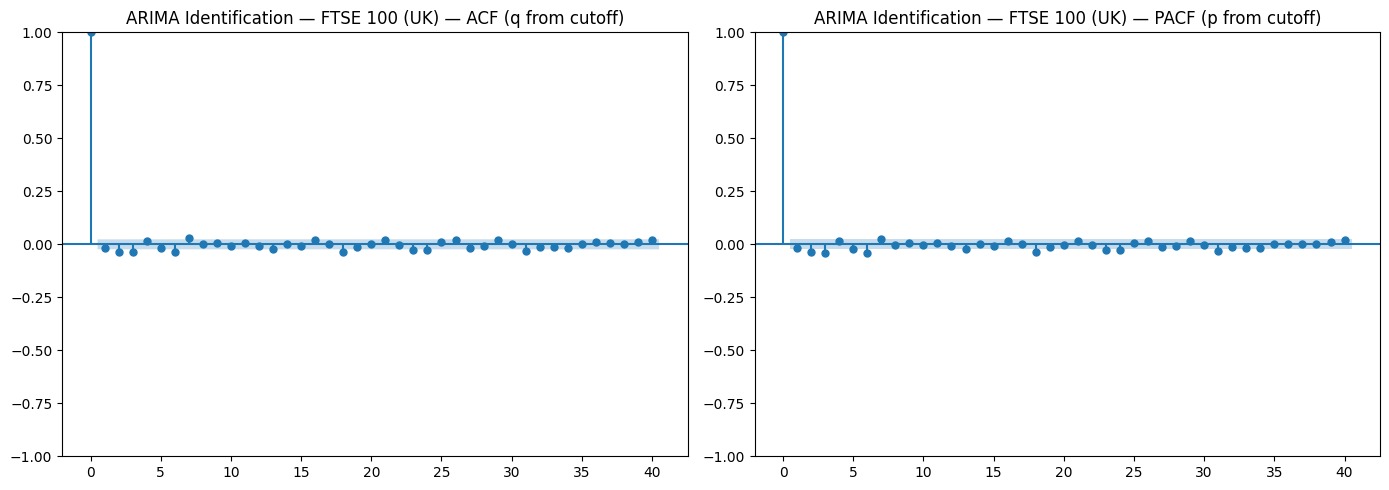

⚖️ DAX (Germany): Cutoff suggested (1, 1, 1) with Cutoff AIC=85007.38, but AIC preferred (0,1,1) with AIC=85006.26


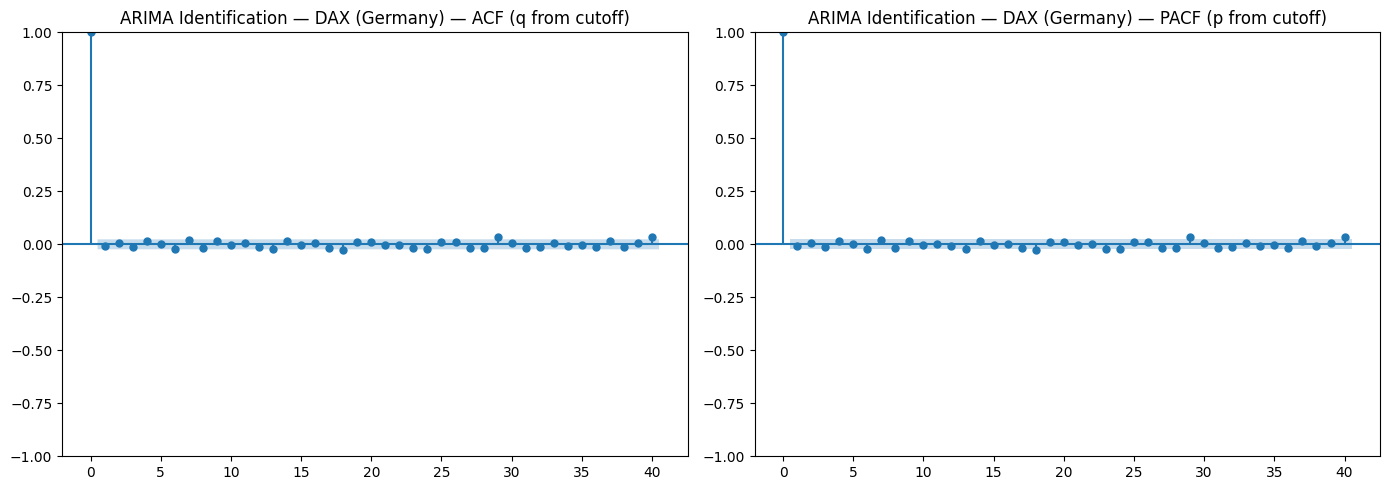

⚖️ CAC 40 (France): Cutoff suggested (1, 1, 1) with Cutoff AIC=76637.36, but AIC preferred (0,1,2) with AIC=76636.63


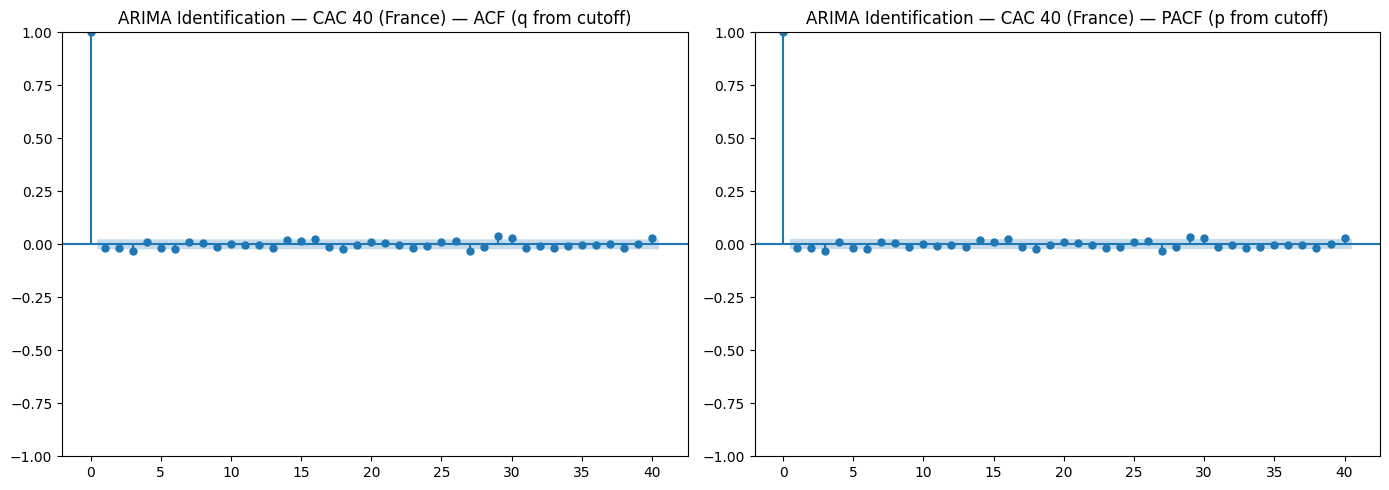

⚖️ SMI (Switzerland): Cutoff suggested (1, 1, 1) with Cutoff AIC=80954.59, but AIC preferred (2,1,1) with AIC=80950.86


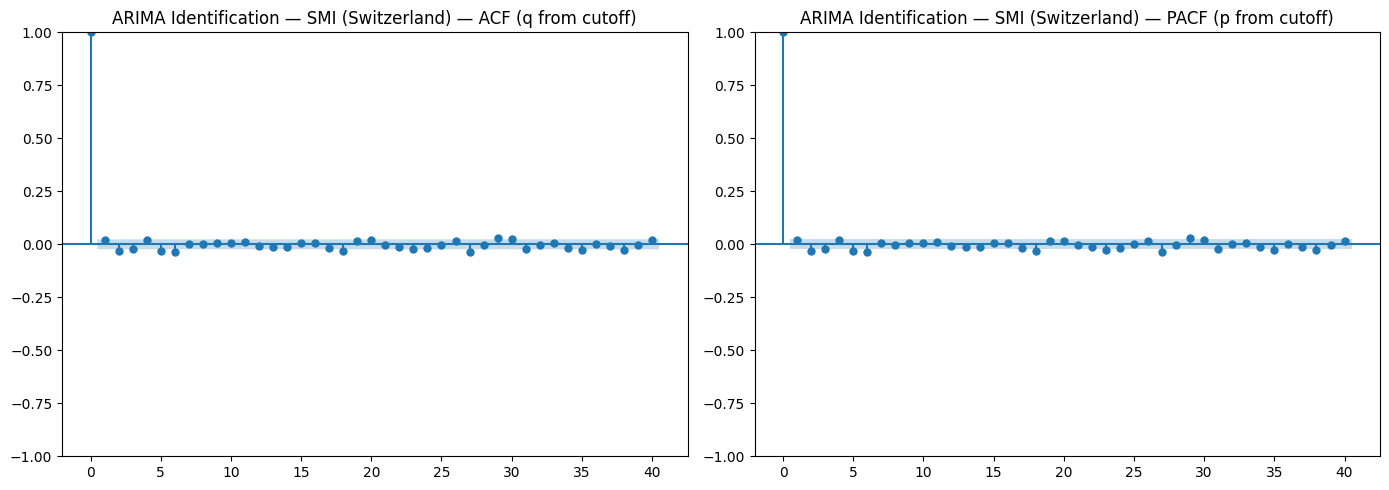


--- ARIMA Order Selection Summary ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Series  cutoff_p  cutoff_d  cutoff_q  AIC_p  AIC_d  AIC_q  \
1      FTSE 100 (UK)         1         1         1      2      1      1   
2      DAX (Germany)         1         1         1      0      1      1   
3    CAC 40 (France)         1         1         1      0      1      2   
4  SMI (Switzerland)         1         1         1      2      1      1   

   IC_value_Cutoff  IC_value_AIC  
1     77303.080000  77295.496299  
2     85007.383309  85006.256906  
3     76637.355583  76636.627600  
4     80954.588375  80950.863390

In [114]:
# Run for FTSE and peers
identify_arima_order(adf_delta_close, ["FTSE 100 (UK)", "DAX (Germany)", "CAC 40 (France)", "SMI (Switzerland)"], d=1, lags=40, ic="aic")

Optional: auto_arima model

def identify_arima_auto(data, series_list, d=None, lags=40, alpha=0.05, ic="aic", title="ARIMA Auto Identification"):
    """
    Identify optimal ARIMA(p,d,q) order using auto_arima().

    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing stationary or differenced time series.
    series_list : str or list
        Column name(s) of the series to analyze (e.g., "FTSE 100 (UK)" or ["FTSE 100 (UK)", "DAX (Germany)"]).
    d : int, optional
        Differencing order. If None, auto_arima will select d. Defaults to None.
    lags : int, optional
        Number of lags to show in ACF/PACF plots. Defaults to 40.
    alpha : float, optional
        Significance level for confidence intervals in ACF/PACF. Defaults to 0.05.
    ic : str, optional
        Information criterion ("aic" or "bic") used for model selection. Defaults to "aic".
    title : str, optional
        Plot title prefix.

    Returns
    -------
    pd.DataFrame
        Summary DataFrame with best ARIMA orders and IC values.
    """

    # Ensure input is a list
    if isinstance(series_list, str):
        series_list = [series_list]

    results = []
    warnings.filterwarnings("ignore")

    for series_name in series_list:
        if series_name not in data.columns:
            raise KeyError(f"'{series_name}' not found in DataFrame columns: {list(data.columns)}")

        # Select series
        s = pd.Series(data[series_name]).dropna()

        # === Step 1: Run auto_arima ===
        model = auto_arima(
            s,
            d=d,
            seasonal=False,
            stepwise=True,
            information_criterion=ic,
            suppress_warnings=True,
            error_action="ignore",
            max_p=5, max_q=5,  # can increase if needed
            trace=False
        )

        # Extract best order & IC
        best_order = model.order
        best_ic = model.aic() if ic == "aic" else model.bic()

        print(f"🏆 {series_name}: auto_arima selected {best_order} with {ic.upper()}={best_ic:.2f}")

        # === Step 2: Plot ACF & PACF ===
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        plot_acf(s, lags=lags, alpha=alpha, ax=axes[0])
        axes[0].set_title(f"{title} — {series_name} — ACF")
        plot_pacf(s, lags=lags, alpha=alpha, ax=axes[1])
        axes[1].set_title(f"{title} — {series_name} — PACF")
        plt.tight_layout()
        plt.show()

        # Save results
        results.append({
            "Series": series_name,
            "Best_p": best_order[0],
            "Best_d": best_order[1],
            "Best_q": best_order[2],
            f"{ic.upper()}_Value": best_ic
        })

    # Reset warnings
    warnings.filterwarnings("default")

    # Build result DataFrame
    results_df = pd.DataFrame(results)
    results_df.index = results_df.index + 1

    print("\n--- Auto ARIMA Order Selection Summary ---")
    # display(results_df)

    return results_df


    identify_arima_auto(
    adf_delta_close,
    ["FTSE 100 (UK)", "DAX (Germany)", "CAC 40 (France)", "SMI (Switzerland)"], d=None, lags=40, ic="aic")

## ARIMA model (p,d,q)

In [115]:
def run_arima_for_all(data, series_list, d=1, lags=40, ic="aic"):
    """
    Run ARIMA identification, fit, and diagnostics for FTSE and peers.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame of differenced log/close prices (stationary).
    series_list : list
        List of human-readable index names to run ARIMA on.
    d : int, optional
        Differencing order. Default is 1.
    lags : int, optional
        Number of lags for ACF/PACF. Default is 40.
    ic : str, optional
        Information criterion ("aic" or "bic"). Default is "aic".

    Returns
    -------
    pd.DataFrame
        Summary of best ARIMA orders for all indices.
    """

    all_results = []

    for series_name in series_list:
        print(f"\n==============================")
        print(f"📊 Running ARIMA for {series_name}")
        print(f"==============================")

        # Step 1: Identify ARIMA order (cutoff vs IC)
        results_df = identify_arima_order(
            data,
            series_list=series_name,
            d=d,
            lags=lags,
            ic=ic,
            title="ARIMA Identification"
        )

        # Save best ARIMA order
        best_order = (
            int(results_df.loc[1, "AIC_p"]),
            int(results_df.loc[1, "AIC_d"]),
            int(results_df.loc[1, "AIC_q"])
        )
        print(f"\n✅ Best ARIMA order for {series_name}: {best_order}")

        # Step 2: Fit ARIMA model
        series = data[series_name].dropna()
        model = sm.tsa.ARIMA(series, order=best_order)
        fit_res = model.fit()

        print("\n--- ARIMA Model Summary ---")
        print(fit_res.summary())

        # Step 3: Diagnostics plots
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle(f"ARIMA Diagnostics — {series_name} (Best {best_order}, IC={ic.upper()})", fontsize=14)

        # Observed vs Fitted
        axes[0, 0].plot(series, label="Observed", color="blue")
        axes[0, 0].plot(fit_res.fittedvalues, label="Fitted", color="red")
        axes[0, 0].set_title("Observed vs Fitted Values")
        axes[0, 0].legend()

        # Residuals
        axes[0, 1].plot(fit_res.resid, color="purple")
        axes[0, 1].axhline(0, linestyle="--", color="black")
        axes[0, 1].set_title("Residuals over Time")

        # ACF of residuals
        sm.graphics.tsa.plot_acf(fit_res.resid, lags=40, ax=axes[1, 0])
        axes[1, 0].set_title("ACF of Residuals")

        # QQ plot
        sm.qqplot(fit_res.resid, line="s", ax=axes[1, 1])
        axes[1, 1].set_title("QQ Plot of Residuals")

        plt.tight_layout()
        plt.show()

        # Append to summary
        all_results.append(results_df)

    # Combine all results
    final_results = pd.concat(all_results, axis=0)
    final_results.index = range(1, len(final_results) + 1)

    print("\n--- 📋 Final ARIMA Summary for All Indices ---")
    display(final_results)

    return final_results


📊 Running ARIMA for FTSE 100 (UK)
⚖️ FTSE 100 (UK): Cutoff suggested (1, 1, 1) with Cutoff AIC=77303.08, but AIC preferred (2,1,1) with AIC=77295.50


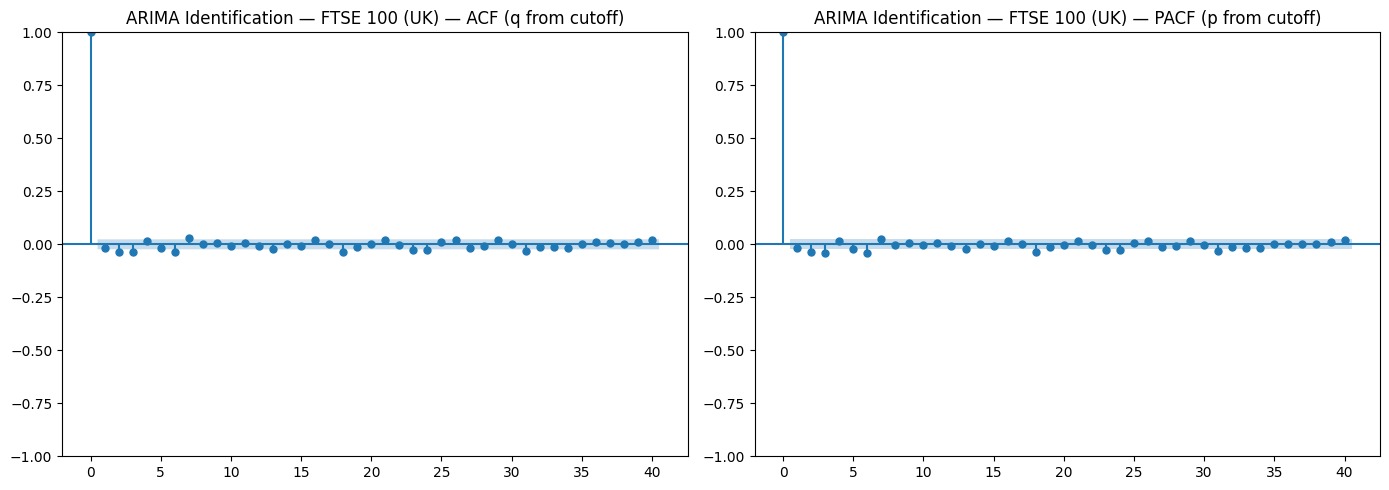


--- ARIMA Order Selection Summary ---

✅ Best ARIMA order for FTSE 100 (UK): (2, 1, 1)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



--- ARIMA Model Summary ---
                               SARIMAX Results                                
Dep. Variable:          FTSE 100 (UK)   No. Observations:                 6924
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -38643.748
Date:                Sun, 21 Sep 2025   AIC                          77295.496
Time:                        21:39:35   BIC                          77322.867
Sample:                             0   HQIC                         77304.933
                               - 6924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0189      0.008     -2.263      0.024      -0.035      -0.003
ar.L2         -0.0365      0.008     -4.477      0.000      -0.052      -0.021
ma.L1         -1.0000  

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


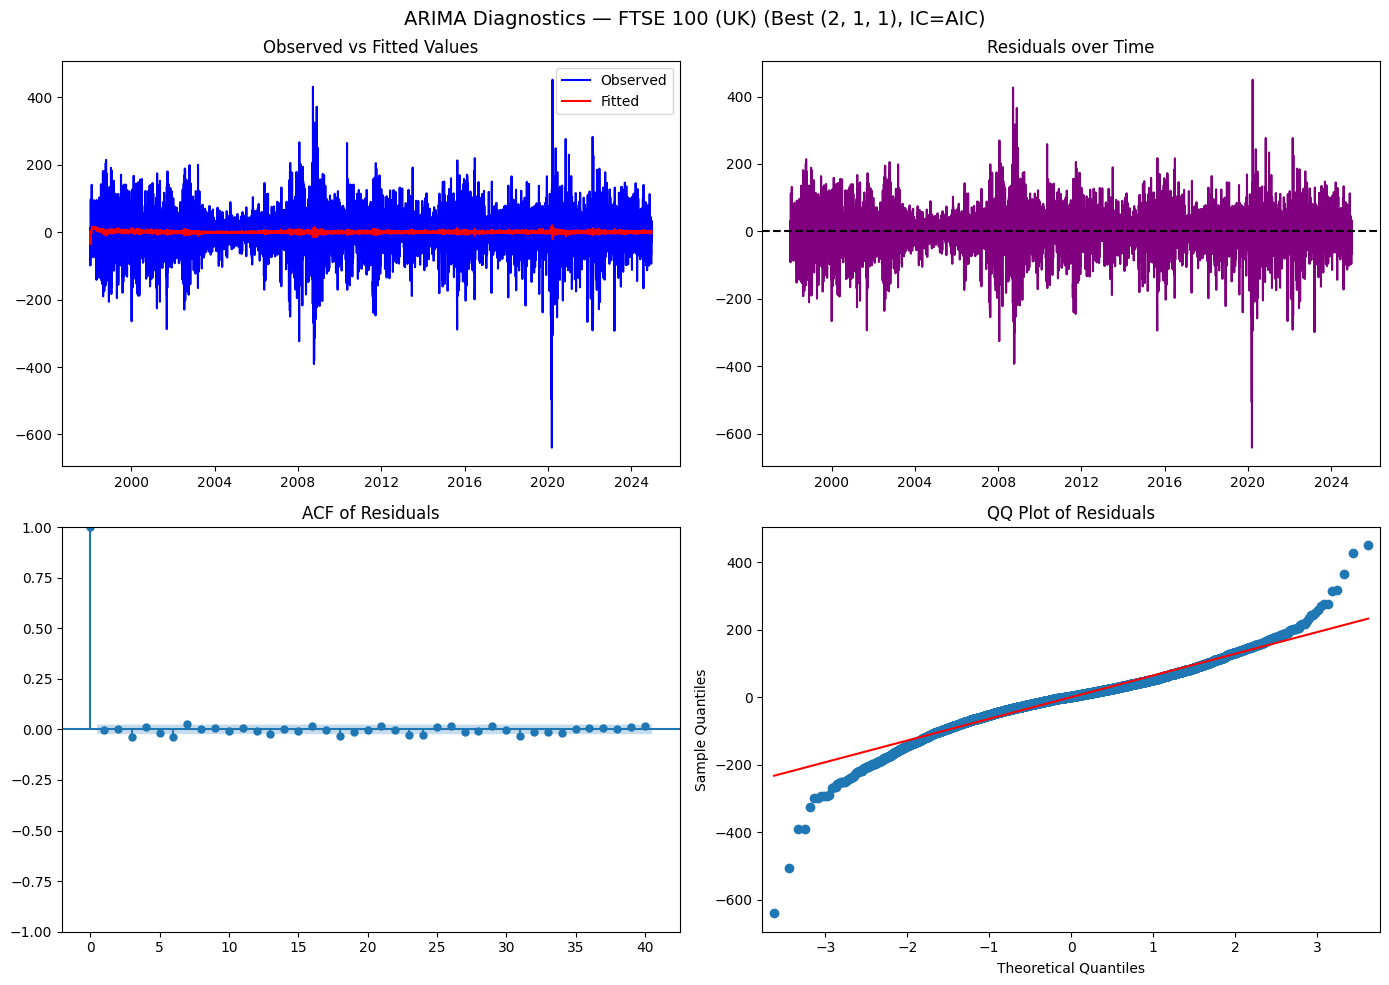


📊 Running ARIMA for DAX (Germany)
⚖️ DAX (Germany): Cutoff suggested (1, 1, 1) with Cutoff AIC=85007.38, but AIC preferred (0,1,1) with AIC=85006.26


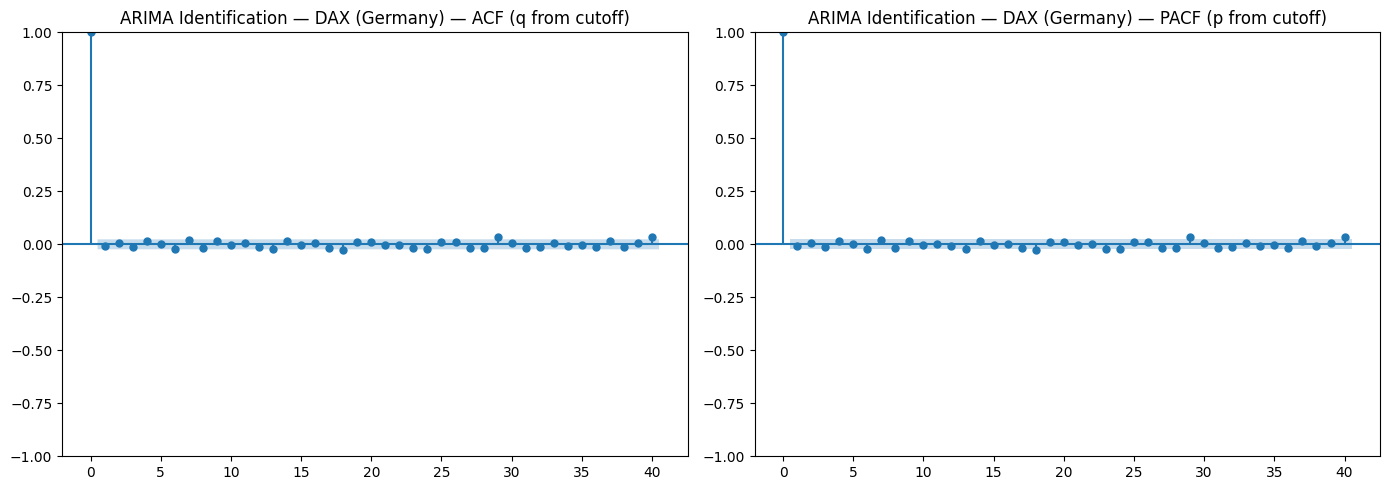


--- ARIMA Order Selection Summary ---

✅ Best ARIMA order for DAX (Germany): (0, 1, 1)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



--- ARIMA Model Summary ---
                               SARIMAX Results                                
Dep. Variable:          DAX (Germany)   No. Observations:                 6924
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -42501.128
Date:                Sun, 21 Sep 2025   AIC                          85006.257
Time:                        21:39:49   BIC                          85019.942
Sample:                             0   HQIC                         85010.975
                               - 6924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      0.001  -1121.748      0.000      -1.001      -0.998
sigma2      1.258e+04     97.428    129.097      0.000    1.24e+04    1.28e+04
Ljung-Box (L1) (Q):    

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


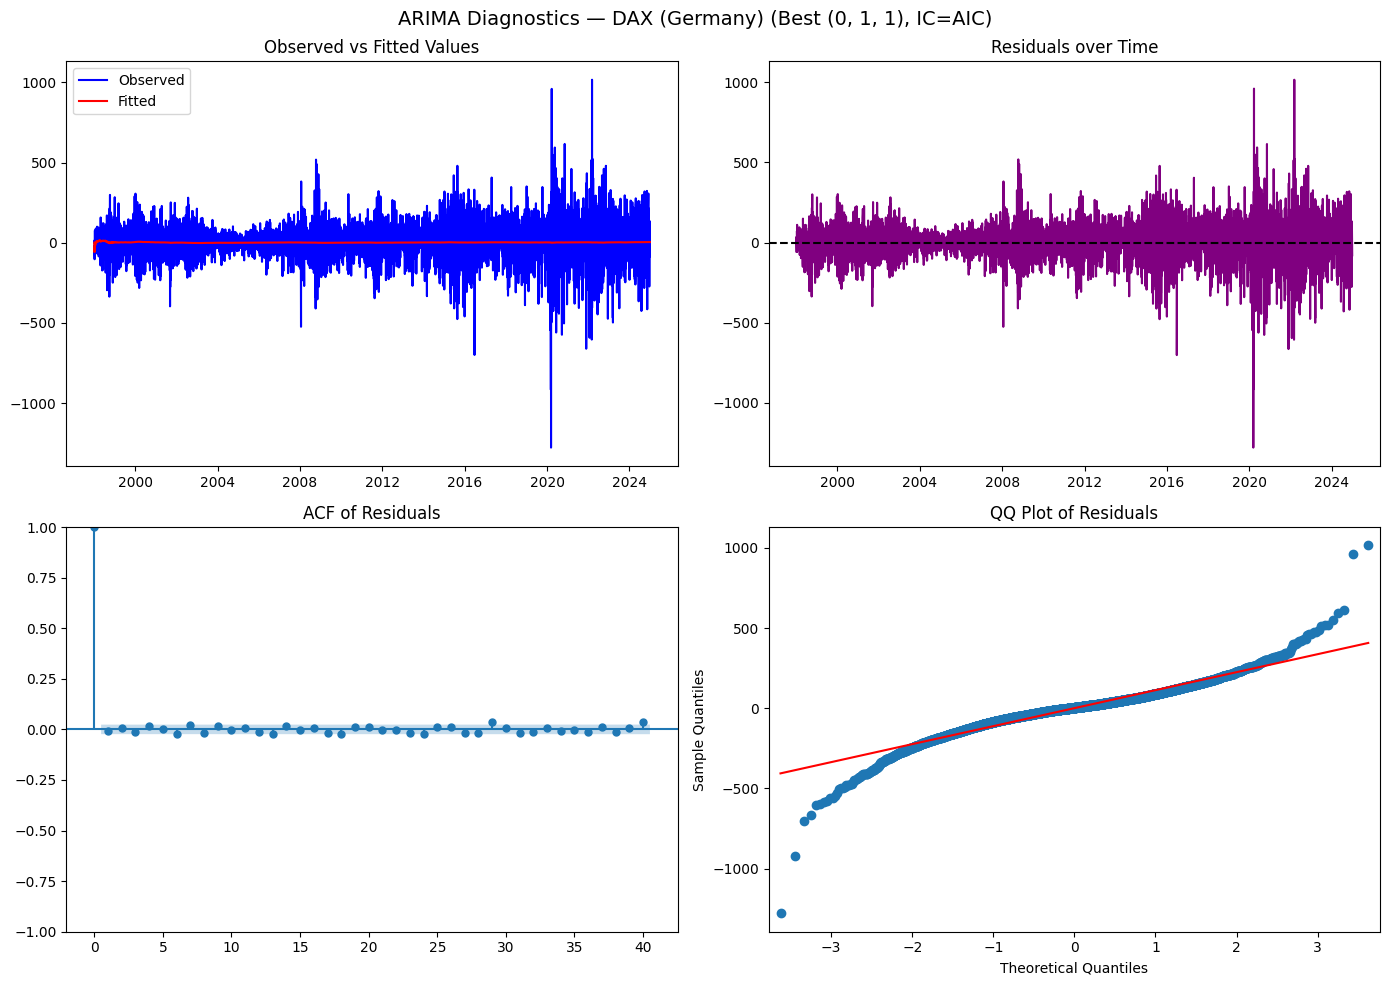


📊 Running ARIMA for CAC 40 (France)
⚖️ CAC 40 (France): Cutoff suggested (1, 1, 1) with Cutoff AIC=76637.36, but AIC preferred (0,1,2) with AIC=76636.63


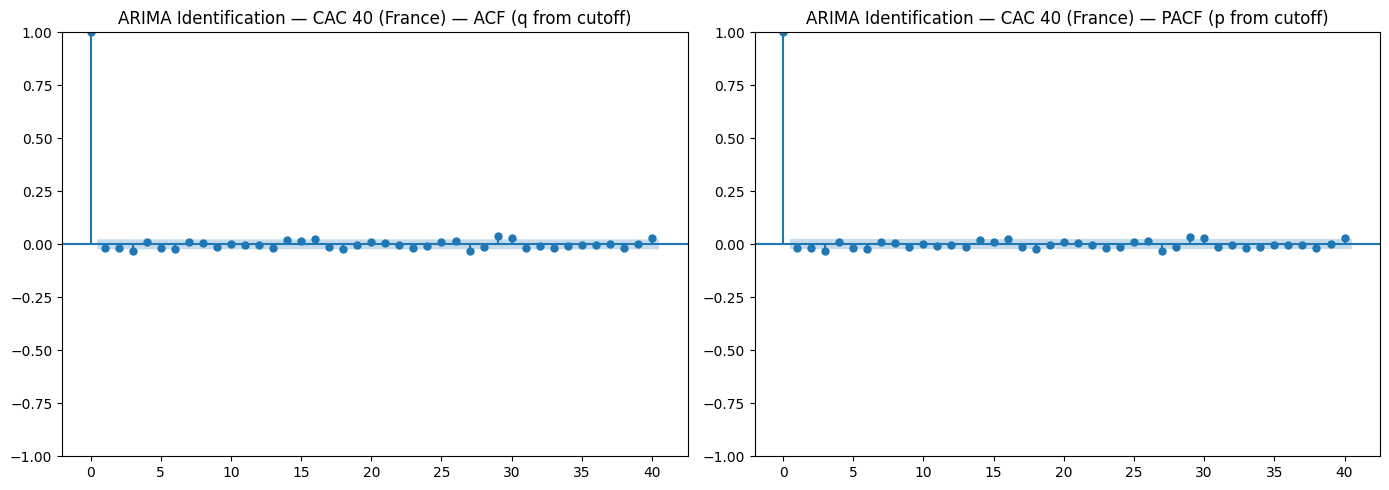


--- ARIMA Order Selection Summary ---

✅ Best ARIMA order for CAC 40 (France): (0, 1, 2)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



--- ARIMA Model Summary ---
                               SARIMAX Results                                
Dep. Variable:        CAC 40 (France)   No. Observations:                 6924
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -38315.314
Date:                Sun, 21 Sep 2025   AIC                          76636.628
Time:                        21:40:02   BIC                          76657.155
Sample:                             0   HQIC                         76643.705
                               - 6924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0154      0.009   -109.940      0.000      -1.034      -0.997
ma.L2          0.0155      0.009      1.740      0.082      -0.002       0.033
sigma2      3751.4311  

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


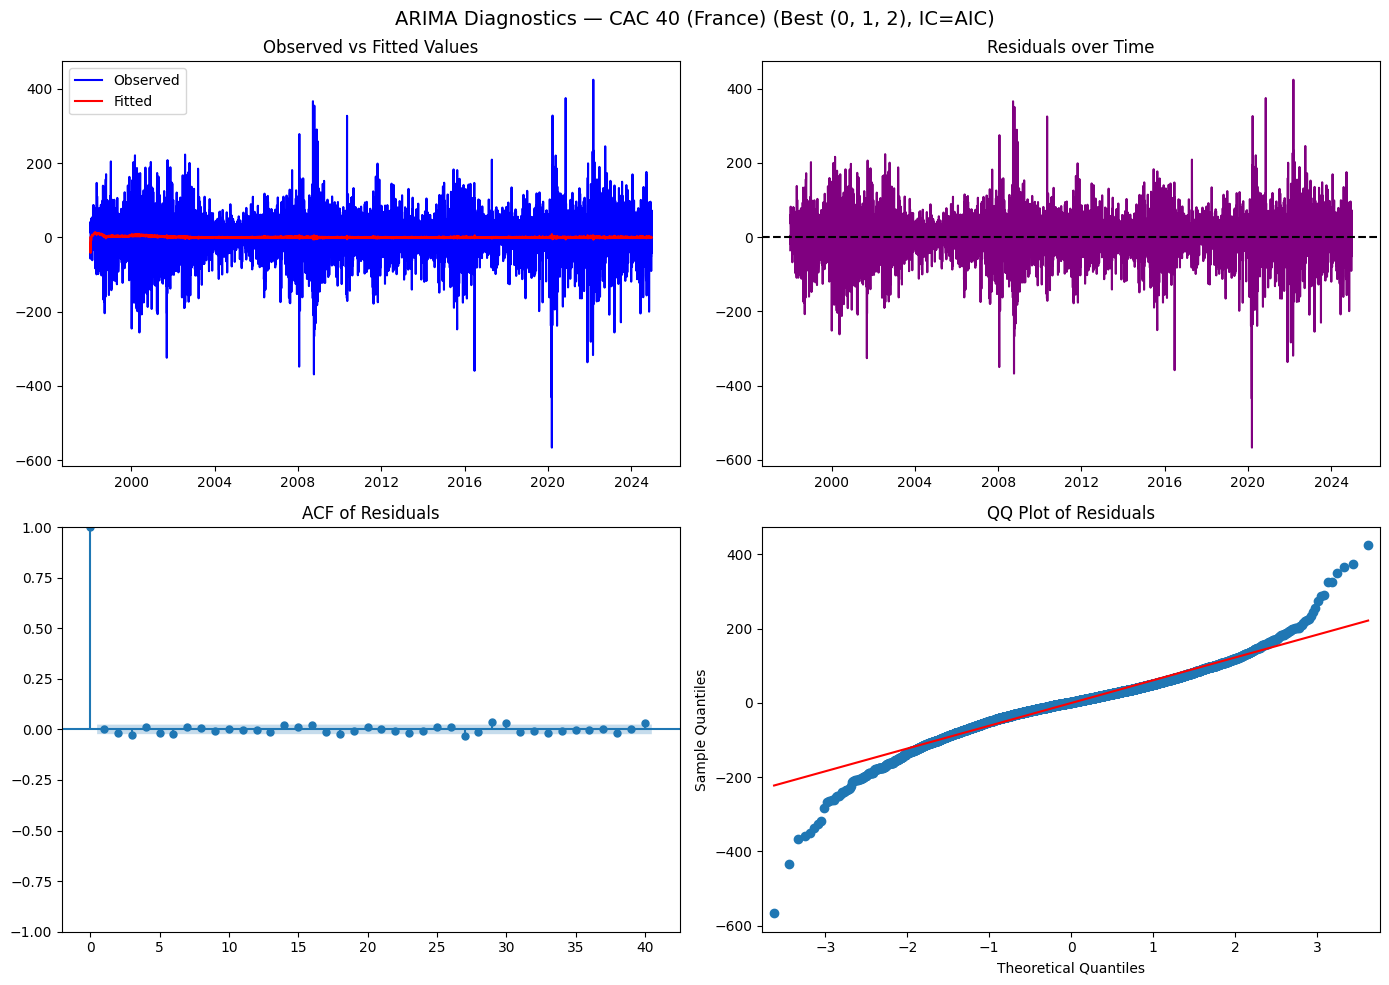


📊 Running ARIMA for SMI (Switzerland)
⚖️ SMI (Switzerland): Cutoff suggested (1, 1, 1) with Cutoff AIC=80954.59, but AIC preferred (2,1,1) with AIC=80950.86


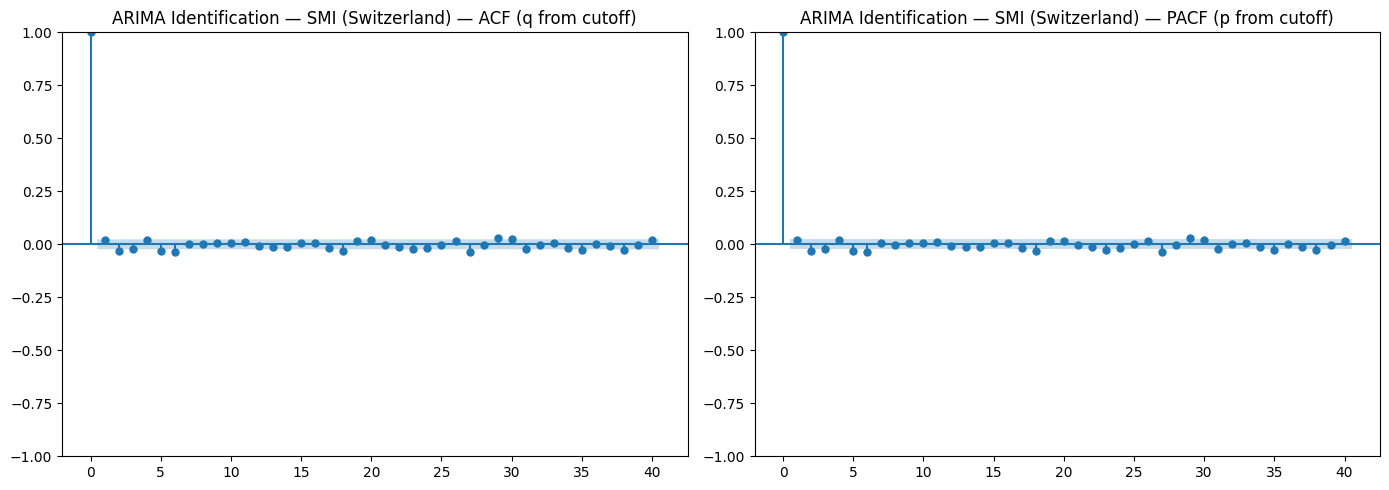


--- ARIMA Order Selection Summary ---

✅ Best ARIMA order for SMI (Switzerland): (2, 1, 1)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



--- ARIMA Model Summary ---
                               SARIMAX Results                                
Dep. Variable:      SMI (Switzerland)   No. Observations:                 6924
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -40471.432
Date:                Sun, 21 Sep 2025   AIC                          80950.863
Time:                        21:40:17   BIC                          80978.234
Sample:                             0   HQIC                         80960.300
                               - 6924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0222      0.007      3.156      0.002       0.008       0.036
ar.L2         -0.0296      0.008     -3.890      0.000      -0.045      -0.015
ma.L1         -0.9997  

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


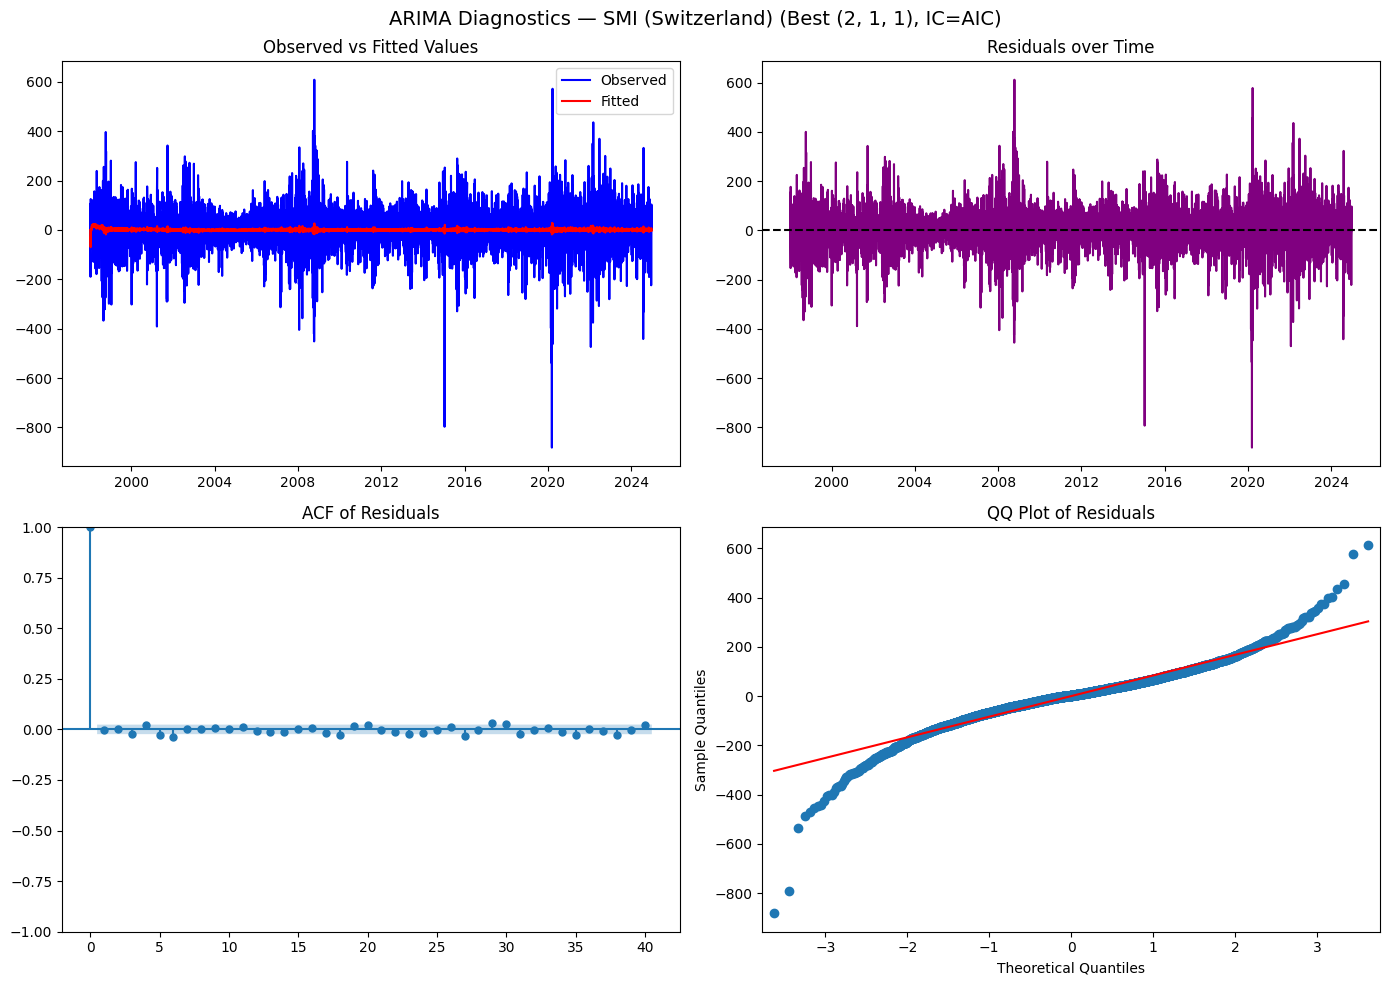


--- 📋 Final ARIMA Summary for All Indices ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Series  cutoff_p  cutoff_d  cutoff_q  AIC_p  AIC_d  AIC_q  \
1      FTSE 100 (UK)         1         1         1      2      1      1   
2      DAX (Germany)         1         1         1      0      1      1   
3    CAC 40 (France)         1         1         1      0      1      2   
4  SMI (Switzerland)         1         1         1      2      1      1   

   IC_value_Cutoff  IC_value_AIC  
1     77303.080000  77295.496299  
2     85007.383309  85006.256906  
3     76637.355583  76636.627600  
4     80954.588375  80950.863390

In [116]:
# ======================
# 🚀 Run for FTSE + Peers
# ======================

series_list = ["FTSE 100 (UK)", "DAX (Germany)", "CAC 40 (France)", "SMI (Switzerland)"]

arima_results_all = run_arima_for_all(adf_delta_close, series_list, d=1, lags=40, ic="aic")

## ARCH/GARCH model


In [117]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
import pandas as pd

def run_garch_for_all(data, series_list, p=1, q=1, dist="t"):
    """
    Run GARCH(p,q) models for FTSE and peers on ΔClose (first difference of prices).

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame of ΔClose prices (stationary).
    series_list : list
        List of human-readable index names.
    p : int, optional
        GARCH order p (ARCH lags). Default = 1.
    q : int, optional
        GARCH order q (GARCH lags). Default = 1.
    dist : str, optional
        Distribution assumption for errors ("normal", "t", "skewt"). Default = "t".

    Returns
    -------
    dict
        Dictionary of fitted results for each index.
    pd.DataFrame
        Summary DataFrame of key GARCH stats across indices.
    """

    results_dict = {}
    summary_rows = []

    for series_name in series_list:
        print(f"\n==============================")
        print(f"⚡ Running GARCH({p},{q}) for {series_name}")
        print(f"==============================")

        # Step 1: Select series (ΔClose)
        if series_name not in data.columns:
            raise KeyError(f"{series_name} not found in DataFrame columns.")
        s = pd.Series(data[series_name]).dropna()

        # Step 2: Fit GARCH model
        model = arch_model(s, vol="GARCH", p=p, q=q, dist=dist, rescale=True)
        res = model.fit(disp="off")
        print(res.summary())

        # Save fitted model
        results_dict[series_name] = res

        # Collect summary stats
        params = res.params
        pvalues = res.pvalues

        alpha = params.get("alpha[1]", 0)
        beta = params.get("beta[1]", 0)
        persistence = alpha + beta

        summary_rows.append({
            "Series": series_name,
            "Order": f"GARCH({p},{q})",
            "Distribution": dist,
            "AIC": res.aic,
            "BIC": res.bic,
            "Alpha (ARCH)": alpha,
            "Alpha p-value": pvalues.get("alpha[1]", None),
            "Beta (GARCH)": beta,
            "Beta p-value": pvalues.get("beta[1]", None),
            "Persistence (α+β)": persistence
        })

        # Step 3: Visualization
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle(f"GARCH({p},{q}) Diagnostics — {series_name}", fontsize=14)

        # ΔClose vs Conditional Volatility
        axes[0, 0].plot(s, color="blue", label="ΔClose")
        axes[0, 0].plot(res.conditional_volatility, color="red", label="Conditional Volatility")
        axes[0, 0].set_title("ΔClose vs Conditional Volatility")
        axes[0, 0].legend()

        # Standardized residuals
        std_resid = res.resid / res.conditional_volatility
        axes[0, 1].plot(std_resid, color="purple")
        axes[0, 1].axhline(0, linestyle="--", color="black")
        axes[0, 1].set_title("Standardized Residuals")

        # ACF of standardized residuals
        sm.graphics.tsa.plot_acf(std_resid.dropna(), lags=40, ax=axes[1, 0])
        axes[1, 0].set_title("ACF of Standardized Residuals")

        # QQ plot
        sm.qqplot(std_resid.dropna(), line="s", ax=axes[1, 1])
        axes[1, 1].set_title("QQ Plot of Standardized Residuals")

        plt.tight_layout()
        plt.show()

    # Final summary DataFrame
    summary_df = pd.DataFrame(summary_rows)
    summary_df.index = summary_df.index + 1

    print("\n--- 📋 GARCH Model Summary for All Indices ---")
    display(summary_df)

    return results_dict, summary_df

*   If α + β < 1 → volatility shocks die out (stationary volatility).
*   If α + β ≈ 1 → volatility is highly persistent (common in financial returns).
*   If α + β > 1 → explosive volatility (bad model).




⚡ Running GARCH(1,1) for FTSE 100 (UK)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                FTSE 100 (UK)   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -37688.3
Distribution:      Standardized Student's t   AIC:                           75386.6
Method:                  Maximum Likelihood   BIC:                           75420.8
                                              No. Observations:                 6924
Date:                      Sun, Sep 21 2025   Df Residuals:                     6923
Time:                              21:40:18   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


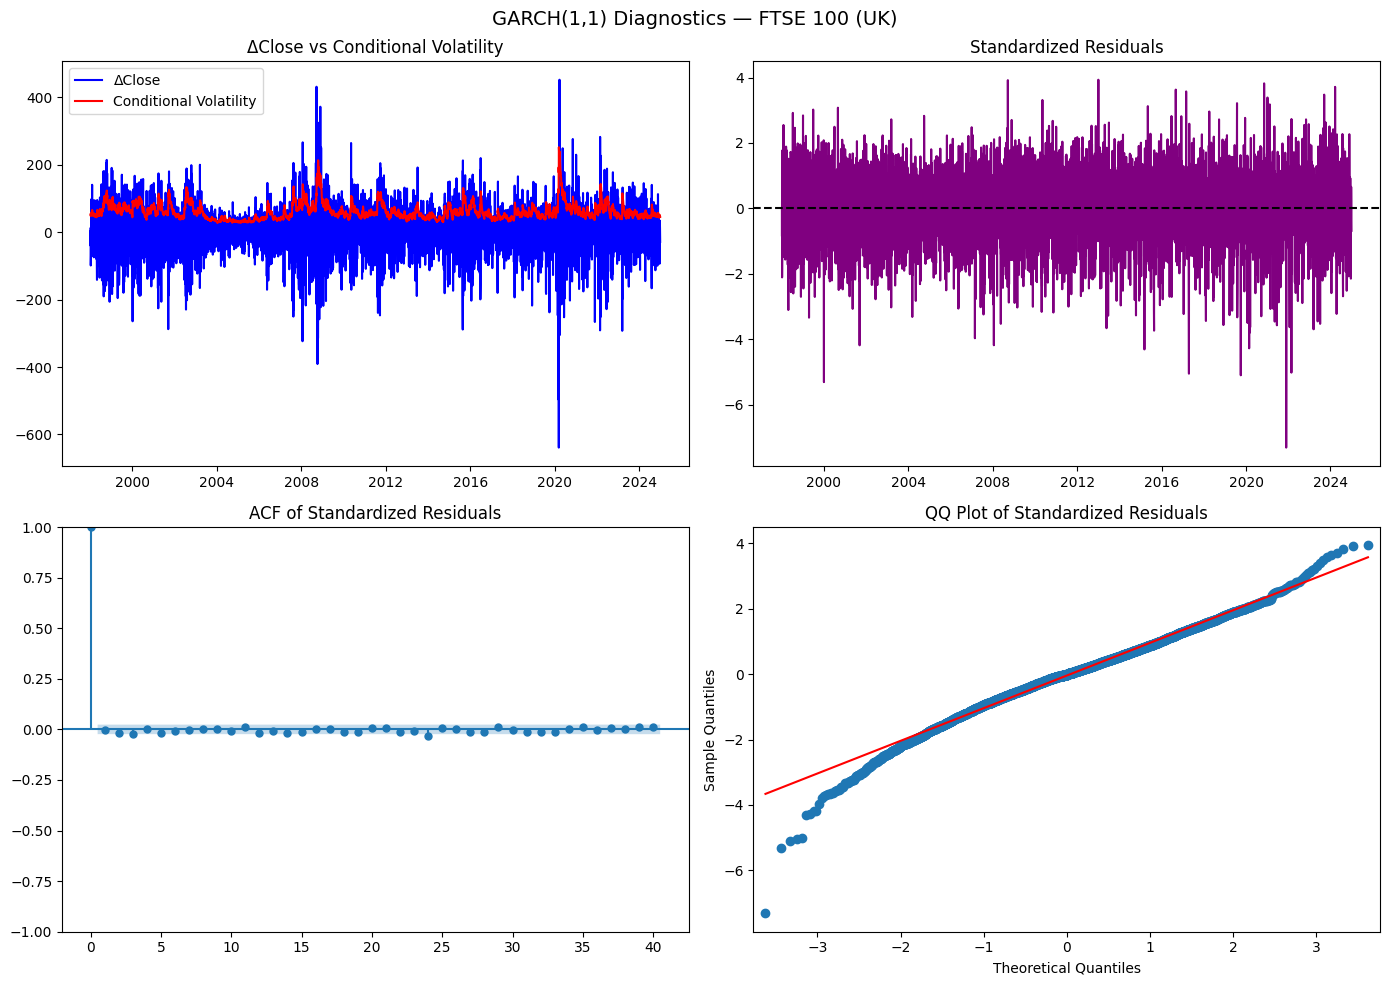


⚡ Running GARCH(1,1) for DAX (Germany)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                DAX (Germany)   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -25154.5
Distribution:      Standardized Student's t   AIC:                           50319.1
Method:                  Maximum Likelihood   BIC:                           50353.3
                                              No. Observations:                 6924
Date:                      Sun, Sep 21 2025   Df Residuals:                     6923
Time:                              21:40:19   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


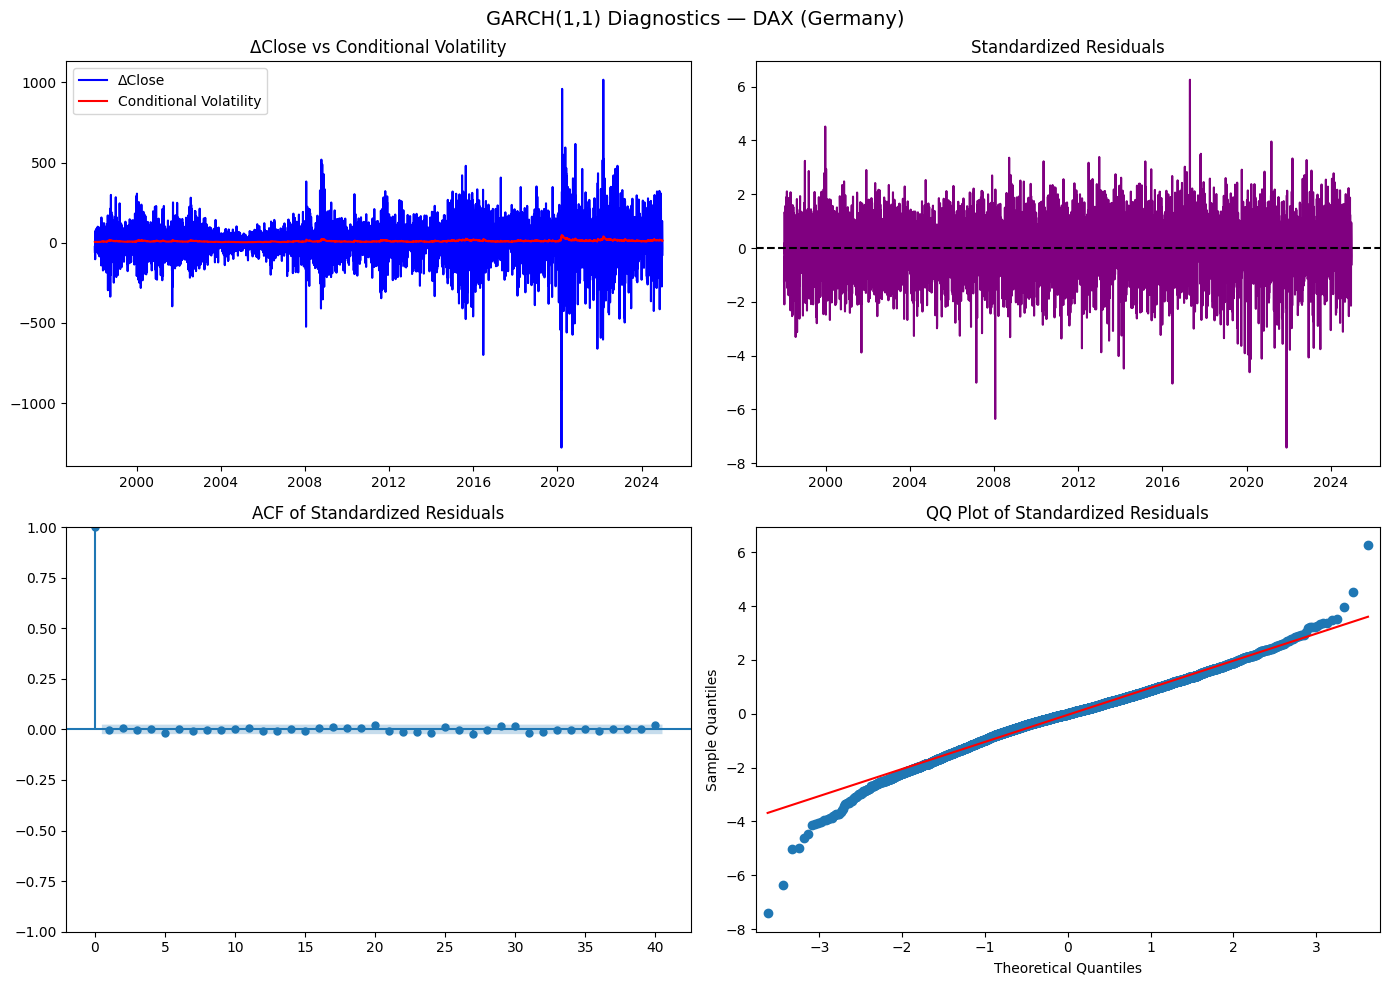


⚡ Running GARCH(1,1) for CAC 40 (France)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:              CAC 40 (France)   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -37344.2
Distribution:      Standardized Student's t   AIC:                           74698.4
Method:                  Maximum Likelihood   BIC:                           74732.6
                                              No. Observations:                 6924
Date:                      Sun, Sep 21 2025   Df Residuals:                     6923
Time:                              21:40:20   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-----------------------------------------------

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


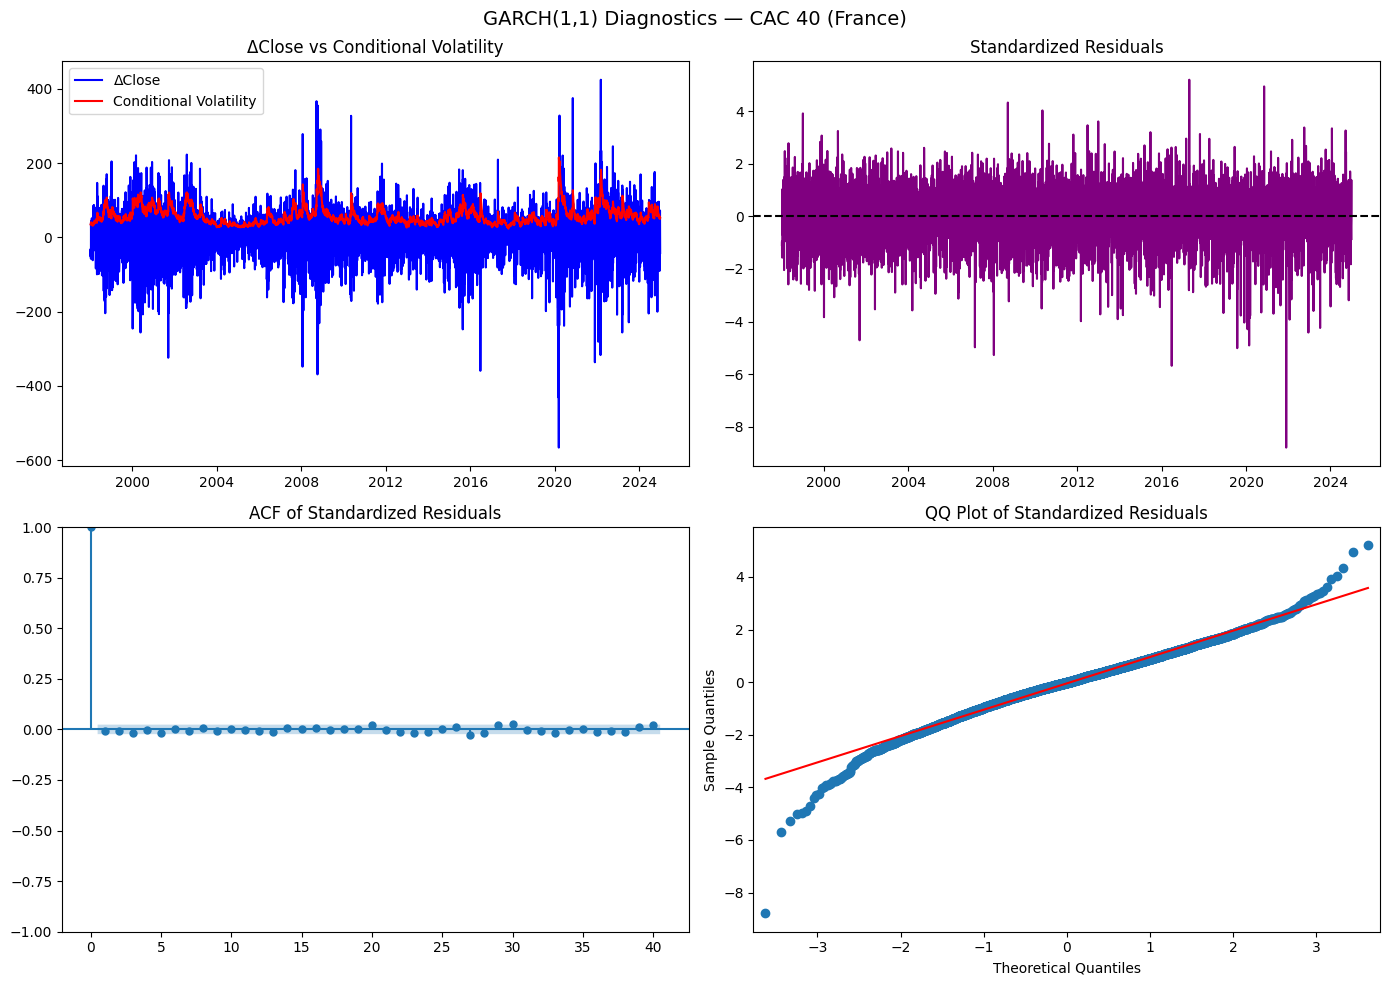


⚡ Running GARCH(1,1) for SMI (Switzerland)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:            SMI (Switzerland)   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -39374.3
Distribution:      Standardized Student's t   AIC:                           78758.6
Method:                  Maximum Likelihood   BIC:                           78792.8
                                              No. Observations:                 6924
Date:                      Sun, Sep 21 2025   Df Residuals:                     6923
Time:                              21:40:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
---------------------------------------------

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


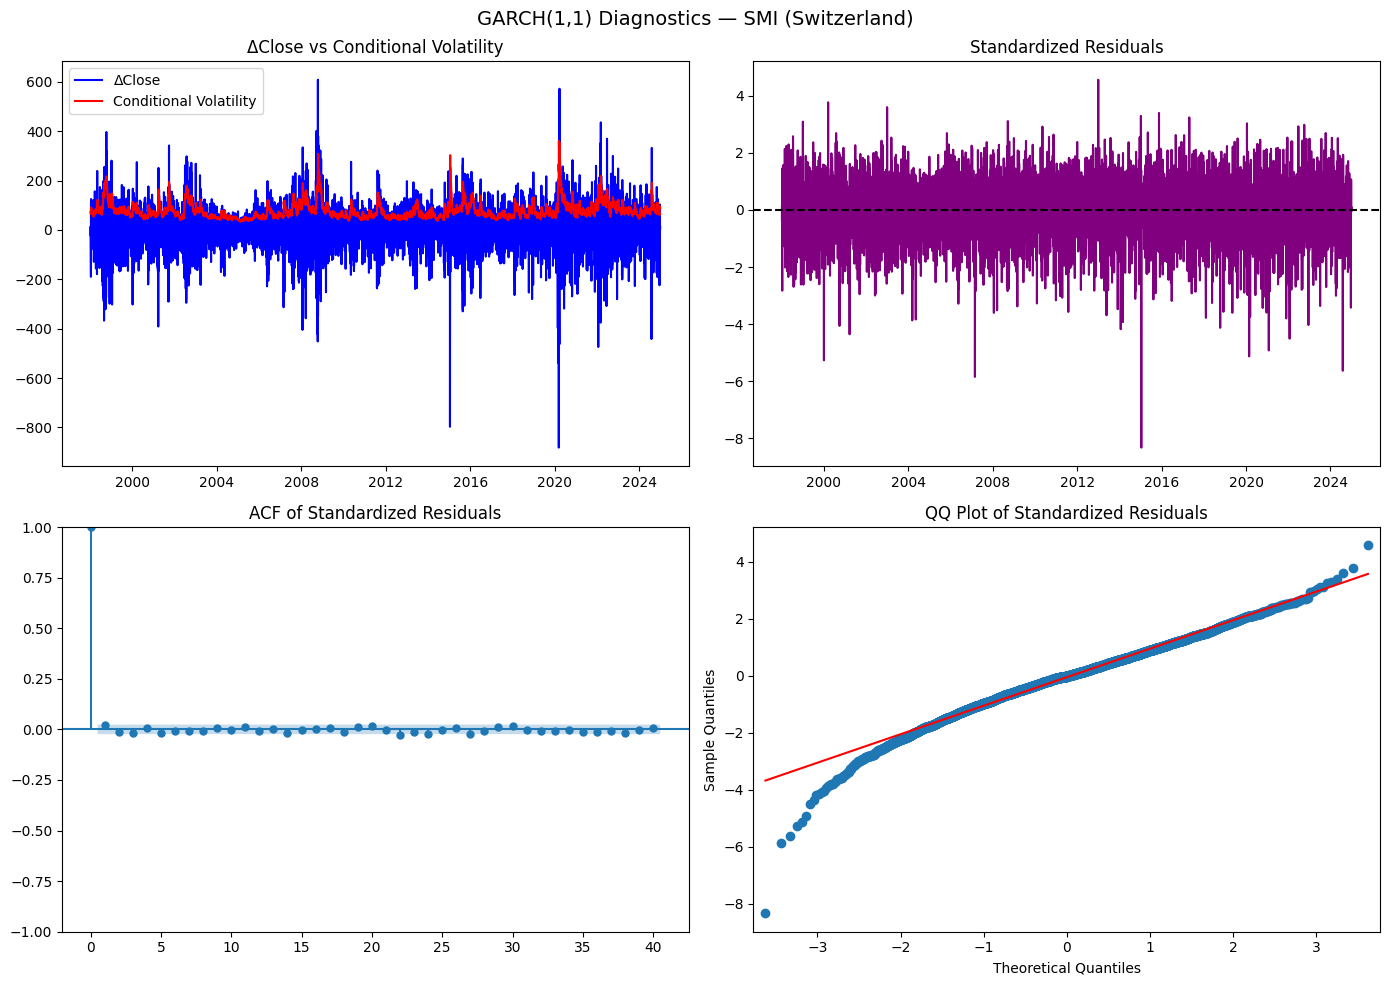


--- 📋 GARCH Model Summary for All Indices ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Series       Order Distribution           AIC           BIC  \
1      FTSE 100 (UK)  GARCH(1,1)            t  75386.634784  75420.848529   
2      DAX (Germany)  GARCH(1,1)            t  50319.058177  50353.271921   
3    CAC 40 (France)  GARCH(1,1)            t  74698.411699  74732.625443   
4  SMI (Switzerland)  GARCH(1,1)            t  78758.609590  78792.823335   

   Alpha (ARCH)  Alpha p-value  Beta (GARCH)  Beta p-value  Persistence (α+β)  
1      0.085255   1.524095e-11      0.907410           0.0           0.992666  
2      0.068034   4.571501e-17      0.931966           0.0           1.000000  
3      0.079042   1.844627e-15      0.914934           0.0           0.993976  
4      0.102516   3.289526e-19      0.885889           0.0           0.988406

In [118]:
# ======================
# 🚀 Run GARCH for FTSE + Peers (ΔClose)
# ======================

series_list = ["FTSE 100 (UK)", "DAX (Germany)", "CAC 40 (France)", "SMI (Switzerland)"]

garch_results_all, garch_summary = run_garch_for_all(adf_delta_close, series_list, p=1, q=1, dist="t")

## Granger Causality test

/tmp/ipython-input-75488144.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  europe_index = yf.download(list(tickers.values()), start=START_DATE, end=END_DATE, progress=True)["Close"]
[                       0%                       ]/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b51c536d9b0>
[**********************50%                       ]  2 of 4 completed/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



📌 Optimal lags (AIC) for ΔClose series:
{'CAC 40 (France)': 6, 'FTSE 100 (UK)': 6, 'DAX (Germany)': 29, 'SMI (Switzerland)': 22}


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for 


📋 Granger Causality Summary (ΔClose, AIC lags):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Cause             Effect  Lag  Min p-value Significance  \
1   SMI (Switzerland)    CAC 40 (France)    6       0.0002          ***   
2     CAC 40 (France)      DAX (Germany)    6       0.0022          ***   
3   SMI (Switzerland)      DAX (Germany)   22       0.0077          ***   
4       DAX (Germany)  SMI (Switzerland)   22       0.0355           **   
5   SMI (Switzerland)      FTSE 100 (UK)    6       0.0381           **   
6       FTSE 100 (UK)    CAC 40 (France)    6       0.0400           **   
7     CAC 40 (France)      FTSE 100 (UK)    6       0.0660            *   
8       DAX (Germany)    CAC 40 (France)    6       0.0712            *   
9     CAC 40 (France)  SMI (Switzerland)    6       0.1023                
10      DAX (Germany)      FTSE 100 (UK)    6       0.1112                
11      FTSE 100 (UK)      DAX (Germany)    6       0.1325                
12      FTSE 100 (UK)  SMI (Switzerland)    6       0.1915                

                                         All p-values  
1    [0.0212, 0.0002, 0.0005, 0.0003, 0.0007, 0.0013]  
2    [0.0022, 0.0061, 0.0054, 0.0163, 0.0063, 0.0059]  
3   [0.7691, 0.0224, 0.054, 0.0963, 0.1475, 0.2174...  
4   [0.3735, 0.0506, 0.0509, 0.09, 0.1022, 0.0767,...  
5       [0.71, 0.1854, 0.0685, 0.085, 0.0381, 0.0425]  
6        [0.0692, 0.0834, 0.04, 0.044, 0.057, 0.0713]  
7       [0.1237, 0.1452, 0.066, 0.1135, 0.16, 0.1546]  
8    [0.0902, 0.2244, 0.3861, 0.5107, 0.3024, 0.0712]  
9    [0.4655, 0.1469, 0.1023, 0.1812, 0.2591, 0.3554]  
10   [0.5652, 0.1798, 0.1779, 0.3126, 0.2658, 0.1112]  
11    [0.6616, 0.341, 0.1325, 0.2524, 0.2701, 0.3071]  
12      [0.7366, 0.6256, 0.1915, 0.3466, 0.43, 0.576]

/tmp/ipython-input-75488144.py:111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = annot_matrix.applymap(format_annot)


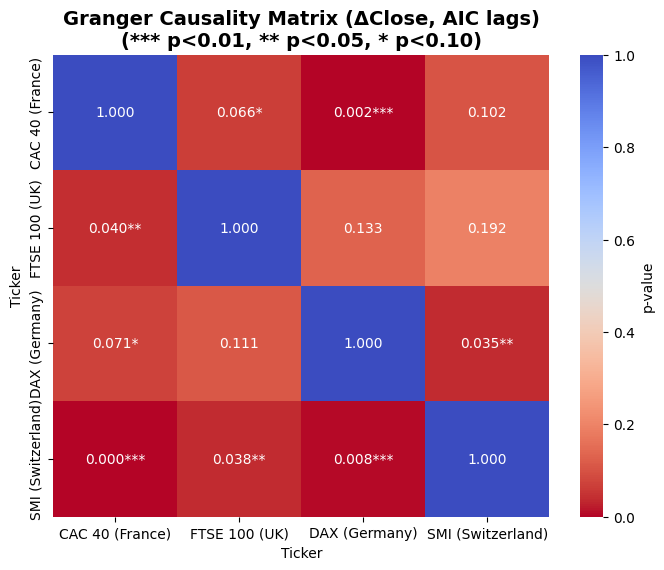

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [119]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# 1) Download data
# -------------------------
tickers = {
    'CAC 40 (France)': '^FCHI',
    'DAX (Germany)': '^GDAXI',
    'FTSE 100 (UK)': '^FTSE',
    'SMI (Switzerland)': '^SSMI'
}

START_DATE = "1998-01-01"
END_DATE   = "2024-12-31"

print(f"Downloading data {START_DATE} → {END_DATE}...")
europe_index = yf.download(list(tickers.values()), start=START_DATE, end=END_DATE, progress=True)["Close"]

# Rename ticker symbols to human-friendly names
rename_map = {v: k for k, v in tickers.items()}
europe_index = europe_index.rename(columns=rename_map)

# -------------------------
# 2) ΔClose (first difference)
# -------------------------
delta_close = europe_index.diff().dropna()

# -------------------------
# 3) Run ADF test to extract optimal lags (AIC only)
# -------------------------
lag_map = {}
for col in delta_close.columns:
    s = delta_close[col].dropna()
    if len(s) > 0:
        stat, p, usedlag, nobs, crit, icbest = adfuller(s, regression="c", autolag="AIC")
        lag_map[col] = usedlag

print("\n📌 Optimal lags (AIC) for ΔClose series:")
print(lag_map)

# -------------------------
# 4) Pairwise Granger causality tests
# -------------------------
results = []
pval_matrix = pd.DataFrame(index=delta_close.columns, columns=delta_close.columns)

for i, col_x in enumerate(delta_close.columns):
    for j, col_y in enumerate(delta_close.columns):
        if i == j:
            pval_matrix.loc[col_x, col_y] = 1.0  # self-causality p=1
            continue

        lag = min(lag_map.get(col_x, 5), lag_map.get(col_y, 5))  # safe lag
        test_data = delta_close[[col_x, col_y]].dropna()

        try:
            gc_res = grangercausalitytests(test_data, maxlag=lag, verbose=False)
            pvals = [round(gc_res[l][0]["ssr_chi2test"][1], 4) for l in range(1, lag+1)]
            min_p = min(pvals)

            # Add significance stars
            if min_p < 0.01:
                signif = "***"
            elif min_p < 0.05:
                signif = "**"
            elif min_p < 0.10:
                signif = "*"
            else:
                signif = ""

            results.append({
                "Cause": col_x,
                "Effect": col_y,
                "Lag": lag,
                "Min p-value": min_p,
                "Significance": signif,
                "All p-values": pvals
            })

            pval_matrix.loc[col_x, col_y] = min_p

        except Exception:
            pval_matrix.loc[col_x, col_y] = np.nan

# -------------------------
# 5) Summarize results
# -------------------------
gc_df = pd.DataFrame(results).sort_values(by="Min p-value").reset_index(drop=True)
gc_df.index = gc_df.index + 1   # ✅ Start index at 1

print("\n📋 Granger Causality Summary (ΔClose, AIC lags):")
display(gc_df)

# -------------------------
# 6) Causality Matrix (heatmap with stars for significance)
# -------------------------
# Create annotation matrix (p-value + star if significant)
annot_matrix = pval_matrix.copy().astype(float)

def format_annot(val):
    if pd.isna(val):
        return ""
    stars = "***" if val < 0.01 else ("**" if val < 0.05 else ("*" if val < 0.10 else ""))
    return f"{val:.3f}{stars}"

annot_matrix = annot_matrix.applymap(format_annot)

plt.figure(figsize=(8,6))
sns.heatmap(
    pval_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "p-value"},
    vmin=0, vmax=1
)
plt.title("Granger Causality Matrix (ΔClose, AIC lags)\n(*** p<0.01, ** p<0.05, * p<0.10)", fontsize=14, fontweight="bold")
plt.show()


# Prediction

In [120]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
import pandas as pd

def run_arima_garch_auto(data, series_list, arima_results, garch_summary, dist="t", ic="aic"):
    """
    Run ARIMA-GARCH models automatically using best ARIMA and GARCH orders
    from previous results.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame of differenced log/ΔClose returns (stationary).
    series_list : list
        List of human-readable index names.
    arima_results : pd.DataFrame
        Output DataFrame from run_arima_for_all (contains best ARIMA orders).
    garch_summary : pd.DataFrame
        Output summary DataFrame from run_garch_for_all (contains GARCH orders).
    dist : str, optional
        Distribution assumption for errors ("normal", "t", "skewt"). Default = "t".
    ic : str, optional
        Information criterion for ARIMA order selection ("aic" or "bic"). Default = "aic".

    Returns
    -------
    dict
        Dictionary of fitted ARIMA-GARCH results for each index.
    pd.DataFrame
        Summary DataFrame of key ARIMA-GARCH stats across indices.
    """

    results_dict = {}
    summary_rows = []

    # Normalize IC input
    ic = ic.lower()
    if ic not in ["aic", "bic"]:
        raise ValueError("ic must be either 'aic' or 'bic'")

    for series_name in series_list:
        print(f"\n==============================")
        print(f"🔥 Running ARIMA-GARCH for {series_name}")
        print(f"==============================")

        # Step 1: Extract best ARIMA order based on chosen IC
        row_arima = arima_results[arima_results["Series"] == series_name].iloc[0]

        if ic == "aic":
            arima_order = (
                int(row_arima["AIC_p"]),
                int(row_arima["AIC_d"]),
                int(row_arima["AIC_q"])
            )
        else:  # ic == "bic"
            arima_order = (
                int(row_arima["BIC_p"]),
                int(row_arima["BIC_d"]),
                int(row_arima["BIC_q"])
            )

        # Step 2: Extract best GARCH order
        row_garch = garch_summary[garch_summary["Series"] == series_name].iloc[0]
        garch_order_str = row_garch["Order"]  # e.g. "GARCH(1,1)"
        garch_p = int(garch_order_str.split("(")[1].split(",")[0])
        garch_q = int(garch_order_str.split(",")[1].replace(")", ""))

        print(f"📌 Best ARIMA order ({ic.upper()}) = {arima_order}, Best GARCH order = ({garch_p},{garch_q})")

        # Step 3: Prepare series
        if series_name not in data.columns:
            raise KeyError(f"{series_name} not found in DataFrame columns.")
        s = pd.Series(data[series_name]).dropna()

        # Step 4: Fit ARIMA–GARCH
        model = arch_model(
            s,
            mean="ARX",
            lags=arima_order[0],    # AR lags
            vol="GARCH",
            p=garch_p,
            q=garch_q,
            dist=dist,
            rescale=True
        )
        res = model.fit(disp="off")
        print(res.summary())

        results_dict[series_name] = res

        # Step 5: Collect summary stats
        params = res.params
        pvalues = res.pvalues
        alpha = params.get("alpha[1]", 0)
        beta = params.get("beta[1]", 0)
        persistence = alpha + beta

        summary_rows.append({
            "Series": series_name,
            "ARIMA Order": arima_order,
            "GARCH Order": f"({garch_p},{garch_q})",
            "Distribution": dist,
            "IC Used": ic.upper(),
            "AIC": res.aic,
            "BIC": res.bic,
            "Alpha (ARCH)": alpha,
            "Alpha p-value": pvalues.get("alpha[1]", None),
            "Beta (GARCH)": beta,
            "Beta p-value": pvalues.get("beta[1]", None),
            "Persistence (α+β)": persistence
        })

        # Step 6: Diagnostics
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle(f"ARIMA{arima_order}-GARCH({garch_p},{garch_q}) Diagnostics — {series_name}", fontsize=14)

        # Series vs Conditional Volatility
        axes[0, 0].plot(s, color="blue", label="Series")
        axes[0, 0].plot(res.conditional_volatility, color="red", label="Conditional Volatility")
        axes[0, 0].set_title("Series vs Conditional Volatility")
        axes[0, 0].legend()

        # Standardized residuals
        std_resid = res.resid / res.conditional_volatility
        axes[0, 1].plot(std_resid, color="purple")
        axes[0, 1].axhline(0, linestyle="--", color="black")
        axes[0, 1].set_title("Standardized Residuals")

        # ACF of standardized residuals
        sm.graphics.tsa.plot_acf(std_resid.dropna(), lags=40, ax=axes[1, 0])
        axes[1, 0].set_title("ACF of Standardized Residuals")

        # QQ plot
        sm.qqplot(std_resid.dropna(), line="s", ax=axes[1, 1])
        axes[1, 1].set_title("QQ Plot of Standardized Residuals")

        plt.tight_layout()
        plt.show()

    # Final summary DataFrame
    summary_df = pd.DataFrame(summary_rows)
    summary_df.index = summary_df.index + 1

    print("\n--- 📋 Final ARIMA-GARCH Model Summary for All Indices ---")
    display(summary_df)

    return results_dict, summary_df


🔥 Running ARIMA-GARCH for FTSE 100 (UK)
📌 Best ARIMA order (AIC) = (2, 1, 1), Best GARCH order = (1,1)
                              AR - GARCH Model Results                              
Dep. Variable:                FTSE 100 (UK)   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -37673.3
Distribution:      Standardized Student's t   AIC:                           75360.6
Method:                  Maximum Likelihood   BIC:                           75408.5
                                              No. Observations:                 6922
Date:                      Sun, Sep 21 2025   Df Residuals:                     6919
Time:                              21:40:23   Df Model:                            3
                                    Mean Model                                   
                    coef    std err          t   

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


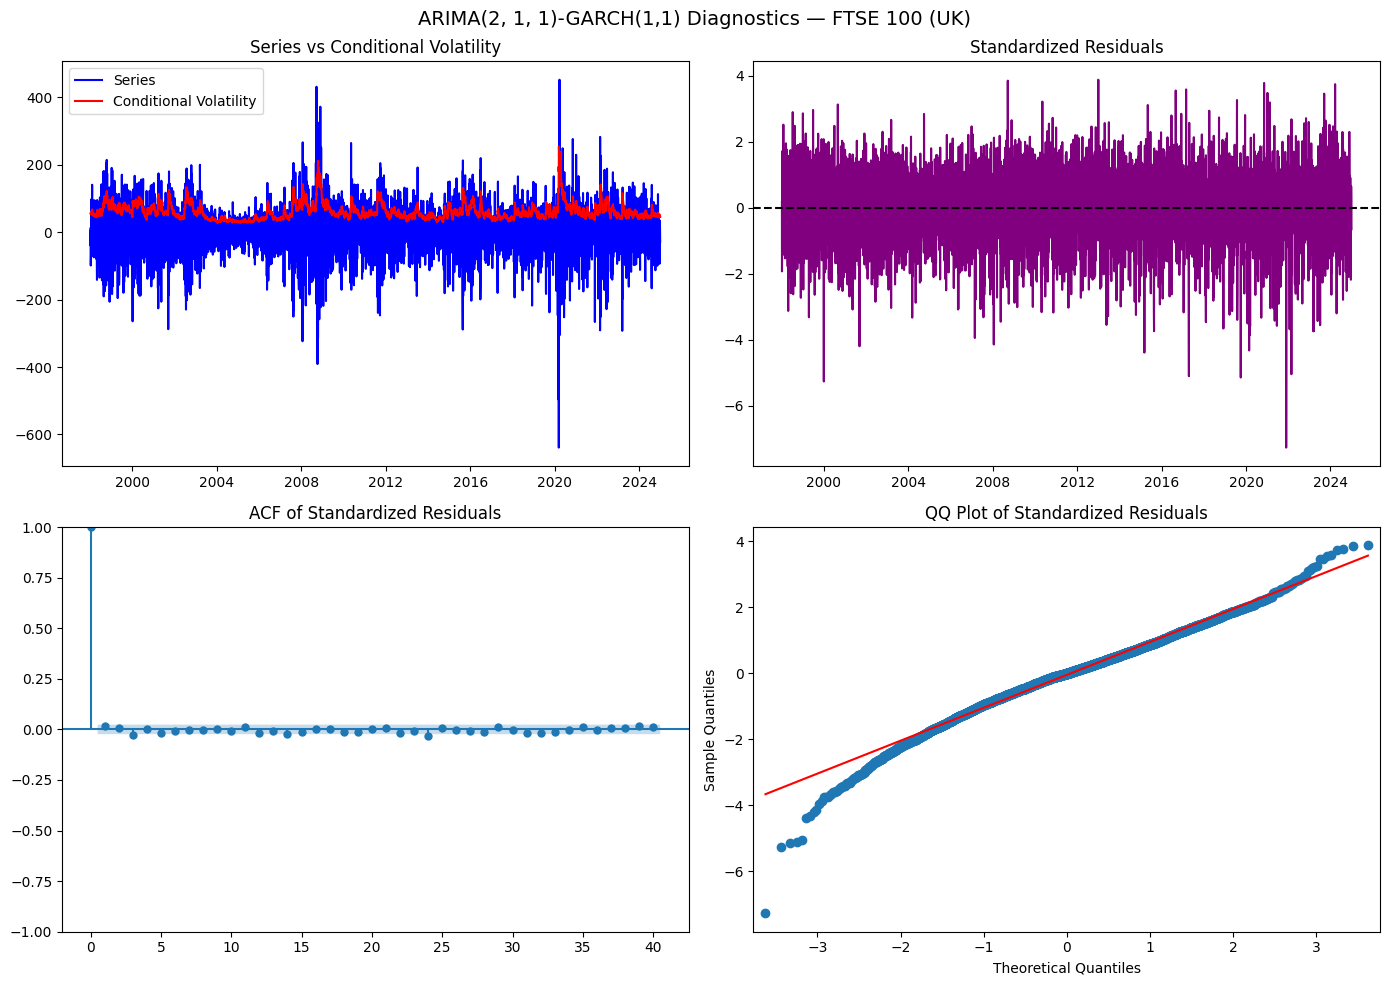


🔥 Running ARIMA-GARCH for DAX (Germany)
📌 Best ARIMA order (AIC) = (0, 1, 1), Best GARCH order = (1,1)
                              AR - GARCH Model Results                              
Dep. Variable:                DAX (Germany)   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -25154.5
Distribution:      Standardized Student's t   AIC:                           50319.1
Method:                  Maximum Likelihood   BIC:                           50353.3
                                              No. Observations:                 6924
Date:                      Sun, Sep 21 2025   Df Residuals:                     6923
Time:                              21:40:24   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


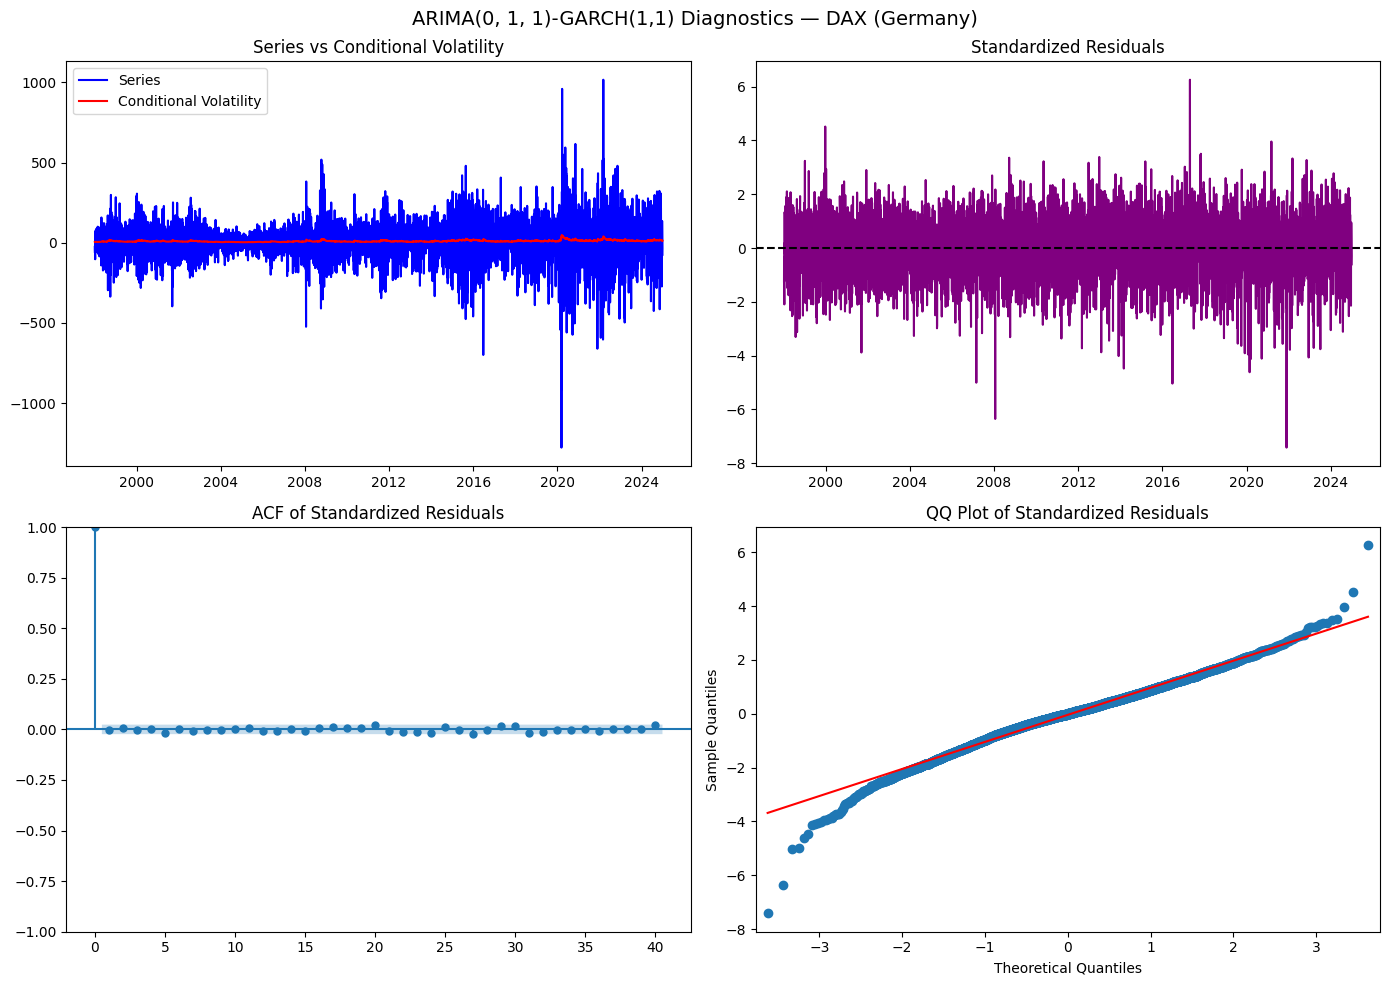


🔥 Running ARIMA-GARCH for CAC 40 (France)
📌 Best ARIMA order (AIC) = (0, 1, 2), Best GARCH order = (1,1)
                              AR - GARCH Model Results                              
Dep. Variable:              CAC 40 (France)   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -37344.2
Distribution:      Standardized Student's t   AIC:                           74698.4
Method:                  Maximum Likelihood   BIC:                           74732.6
                                              No. Observations:                 6924
Date:                      Sun, Sep 21 2025   Df Residuals:                     6923
Time:                              21:40:25   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


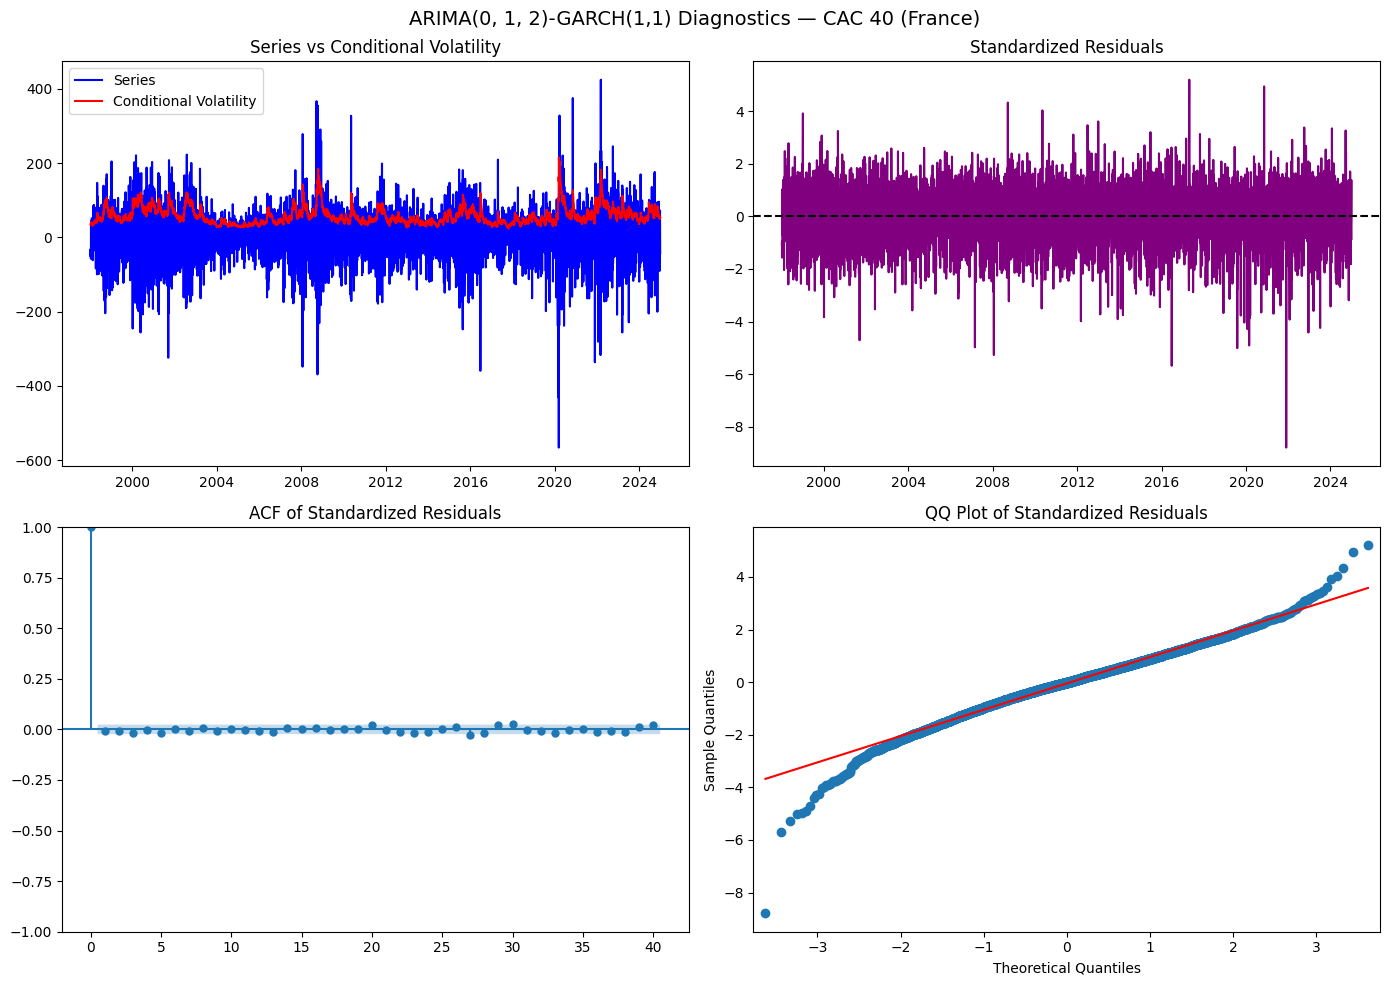


🔥 Running ARIMA-GARCH for SMI (Switzerland)
📌 Best ARIMA order (AIC) = (2, 1, 1), Best GARCH order = (1,1)
                              AR - GARCH Model Results                              
Dep. Variable:            SMI (Switzerland)   R-squared:                      -0.001
Mean Model:                              AR   Adj. R-squared:                 -0.001
Vol Model:                            GARCH   Log-Likelihood:               -39361.3
Distribution:      Standardized Student's t   AIC:                           78736.6
Method:                  Maximum Likelihood   BIC:                           78784.5
                                              No. Observations:                 6922
Date:                      Sun, Sep 21 2025   Df Residuals:                     6919
Time:                              21:40:26   Df Model:                            3
                                    Mean Model                                   
                    coef    std err          

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


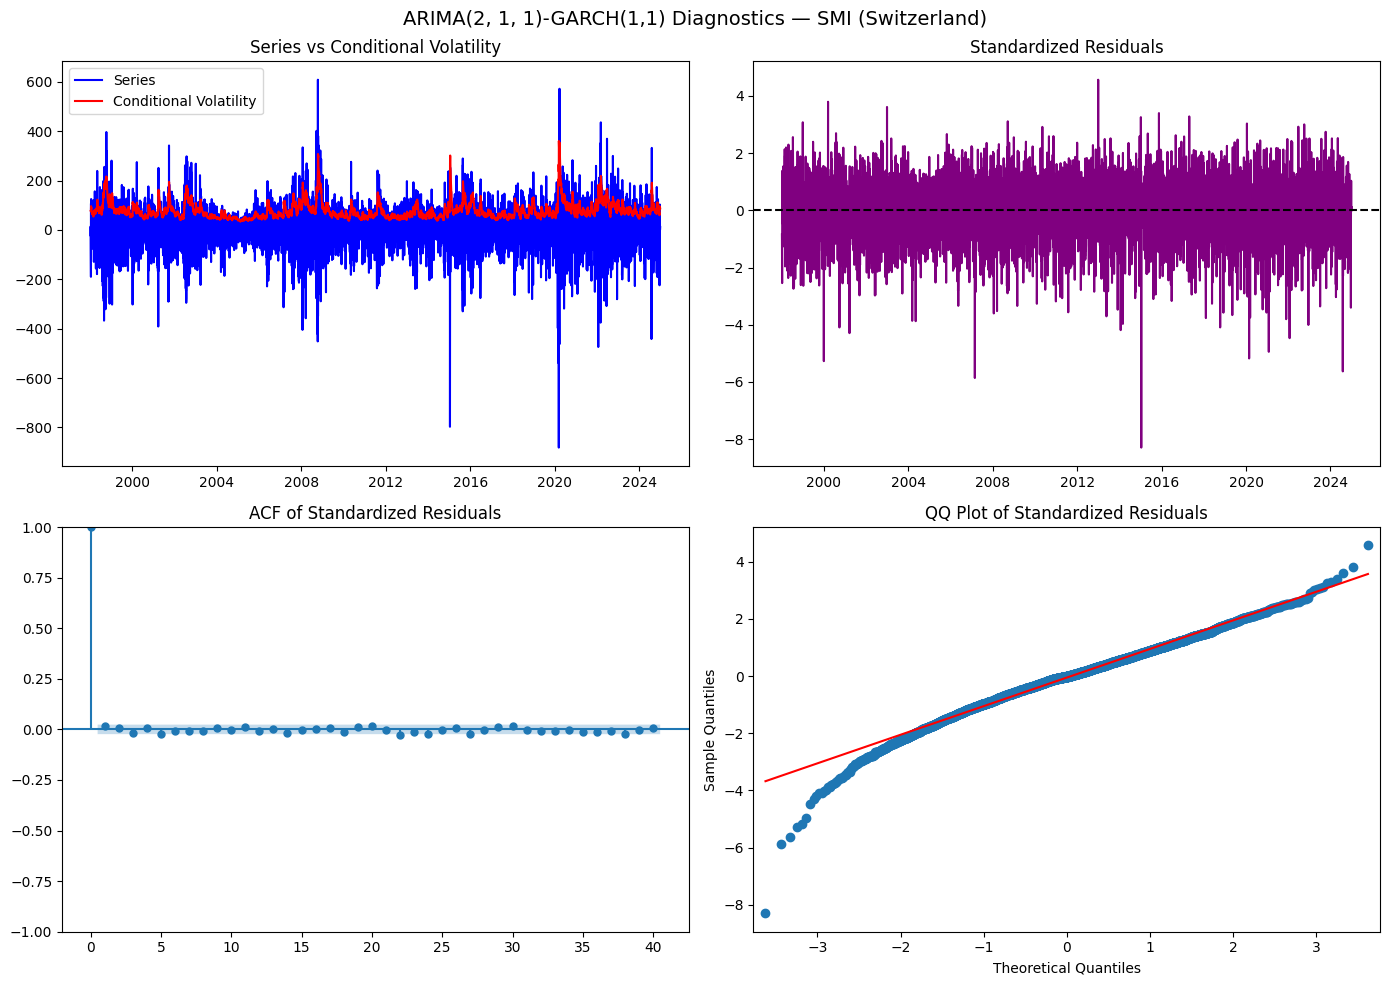


--- 📋 Final ARIMA-GARCH Model Summary for All Indices ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Series ARIMA Order GARCH Order Distribution IC Used  \
1      FTSE 100 (UK)   (2, 1, 1)       (1,1)            t     AIC   
2      DAX (Germany)   (0, 1, 1)       (1,1)            t     AIC   
3    CAC 40 (France)   (0, 1, 2)       (1,1)            t     AIC   
4  SMI (Switzerland)   (2, 1, 1)       (1,1)            t     AIC   

            AIC           BIC  Alpha (ARCH)  Alpha p-value  Beta (GARCH)  \
1  75360.614745  75408.511965      0.084623   1.688841e-11      0.908117   
2  50319.058177  50353.271921      0.068034   4.571501e-17      0.931966   
3  74698.411699  74732.625443      0.079042   1.844627e-15      0.914934   
4  78736.592513  78784.489733      0.102641   3.120550e-19      0.885743   

   Beta p-value  Persistence (α+β)  
1           0.0           0.992740  
2           0.0           1.000000  
3           0.0           0.993976  
4           0.0           0.988384

In [121]:
# ======================
# Example Run (auto-picks ARIMA by AIC or BIC + GARCH order)
# ======================
series_list = ["FTSE 100 (UK)", "DAX (Germany)", "CAC 40 (France)", "SMI (Switzerland)"]

arima_garch_results_all, arima_garch_summary = run_arima_garch_auto(
    adf_delta_close,
    series_list,
    arima_results=arima_results_all,   # from run_arima_for_all
    garch_summary=garch_summary,       # from run_garch_for_all
    dist="t",
    ic="aic"   # or "bic"
)

In [122]:
# Define train-test split ratio
#train_size = 0.8   # 80% train, 20% test

# Example: FTSE 100 series
#ftse_series = adf_delta_close["FTSE 100 (UK)"].dropna()

# Index split point
#split_idx = int(len(ftse_series) * train_size)

# Train/Test split
#ftse_train = ftse_series.iloc[:split_idx]
#ftse_test = ftse_series.iloc[split_idx:]

#print(f"FTSE 100 Series Length: {len(ftse_series)}")
#print(f"Train size: {len(ftse_train)} | Test size: {len(ftse_test)}")

## ARIMA-GARCH model prediction

/tmp/ipython-input-2332732363.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  train_raw = yf.download(list(tickers.values()), start=EUROPE_START_DATE, end=EUROPE_END_DATE, progress=True)["Close"]
[                       0%                       ]/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b514216da90>
[**********************50%                       ]  2 of 4 completed/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime


/tmp/ipython-input-2332732363.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  test_raw = yf.download(list(tickers.values()), start=TEST_START_DATE, end=TEST_END_DATE, progress=True)["Close"]
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
[                       0%                       ]/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b51cfbf9a


🔮 Forecasting CAC 40 (France)...


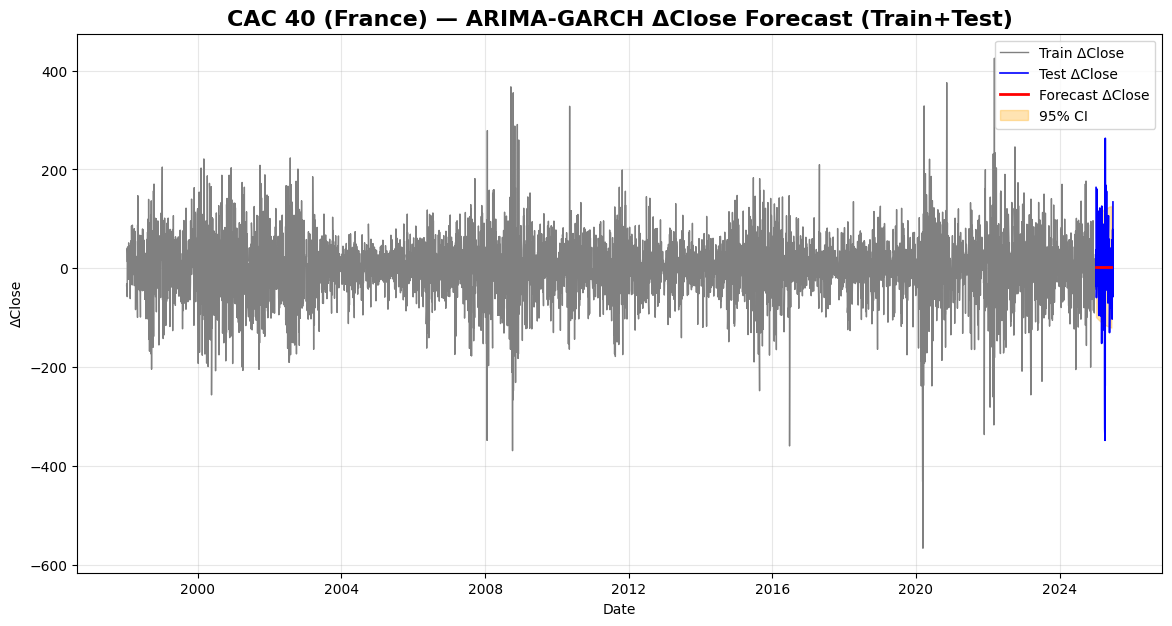

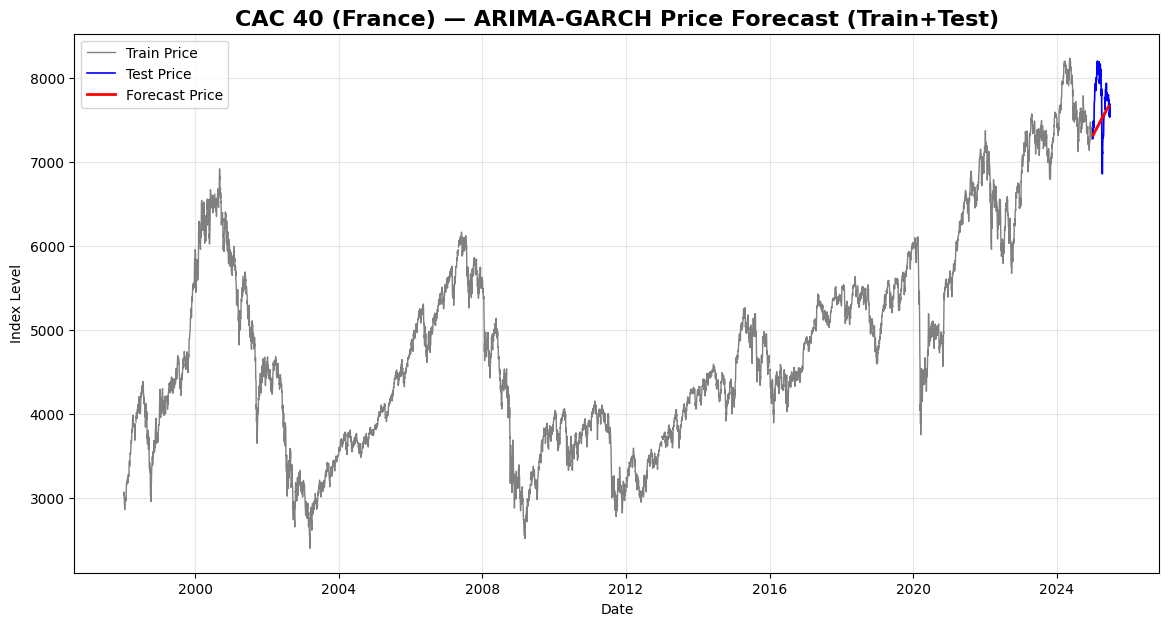

📊 Evaluation for CAC 40 (France):
   RMSE ΔClose = 93.0327
   MAPE ΔClose = 99.7933%
   RMSE Price  = 457.3389
   MAPE Price  = 5.0008%

🔮 Forecasting DAX (Germany)...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


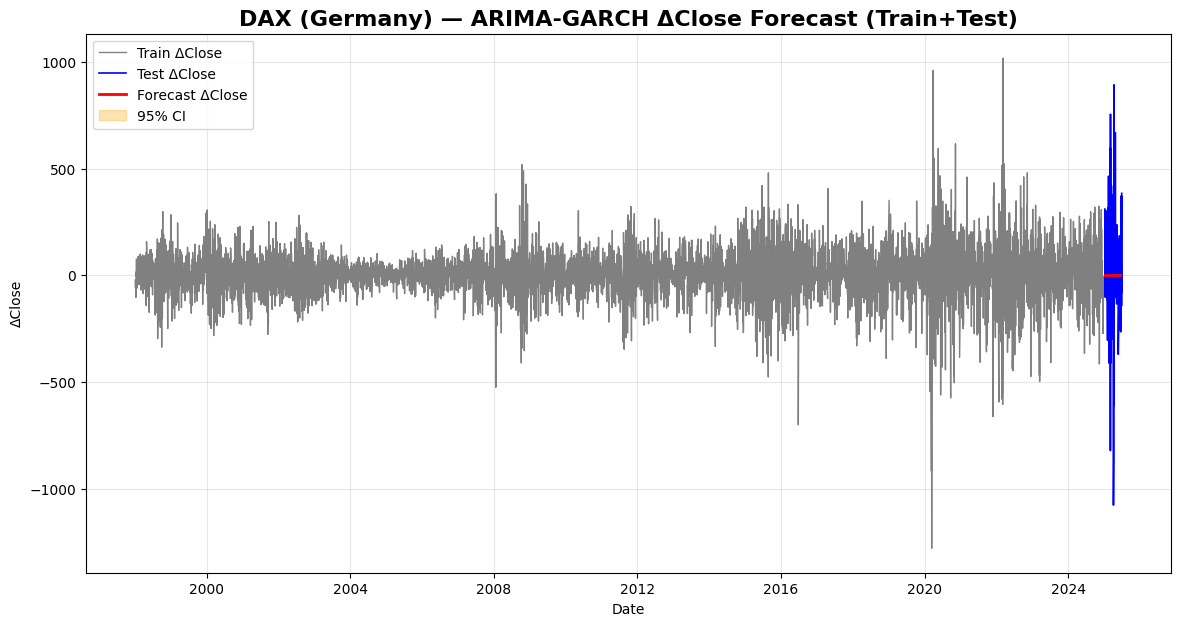

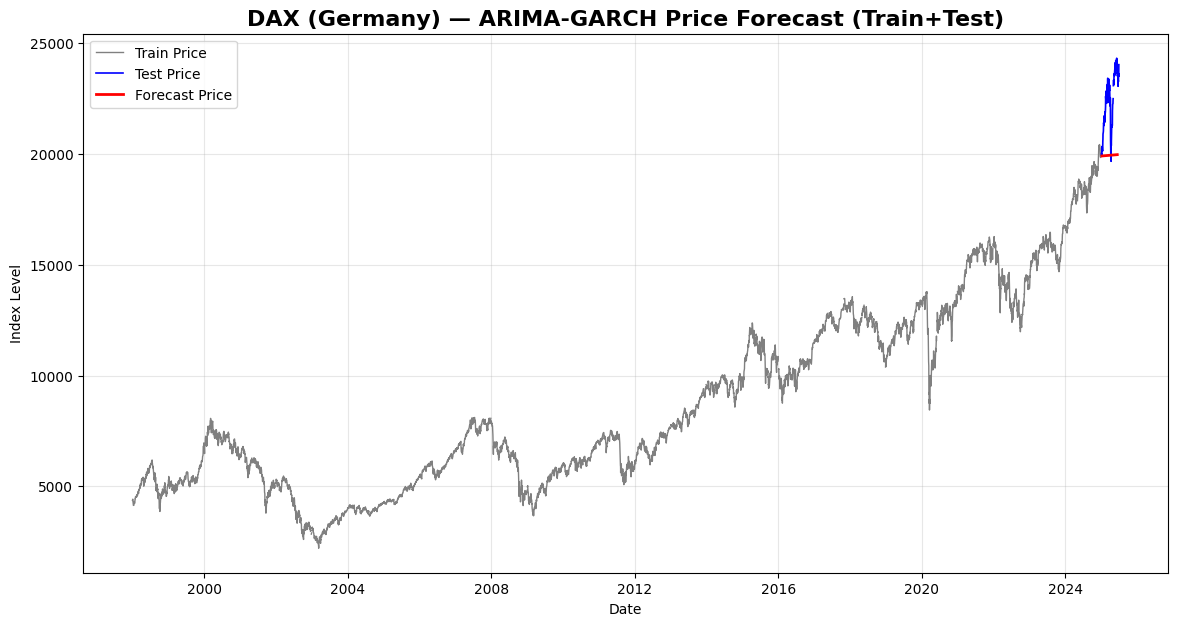

📊 Evaluation for DAX (Germany):
   RMSE ΔClose = 311.4918
   MAPE ΔClose = 99.0021%
   RMSE Price  = 2455.6272
   MAPE Price  = 9.6495%

🔮 Forecasting FTSE 100 (UK)...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


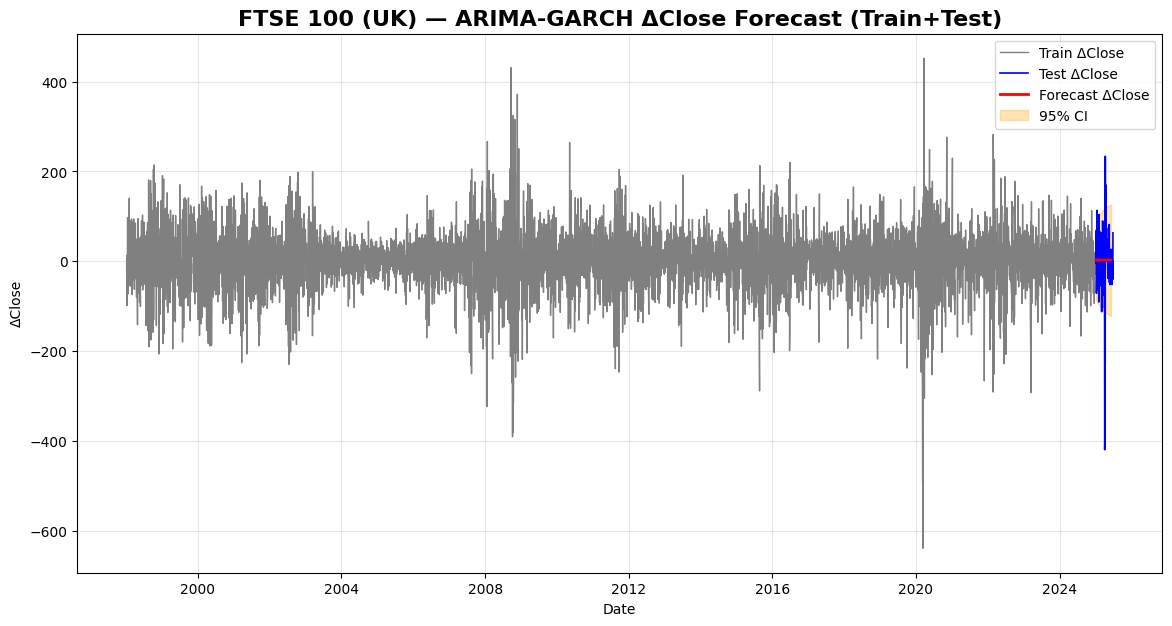

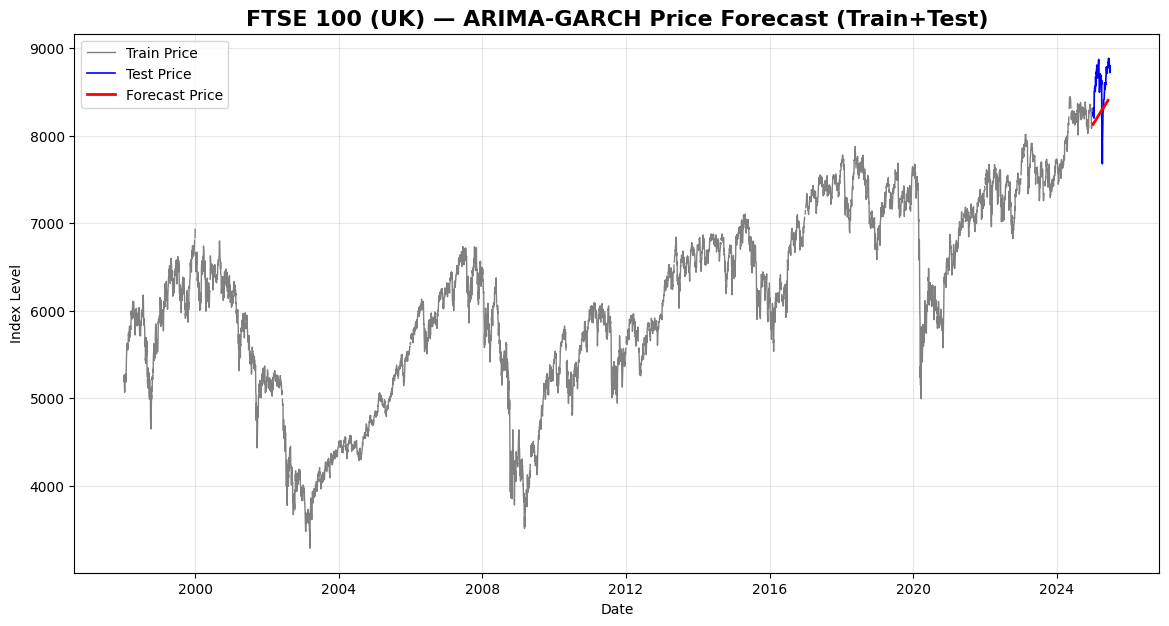

📊 Evaluation for FTSE 100 (UK):
   RMSE ΔClose = 85.2331
   MAPE ΔClose = 131.1793%
   RMSE Price  = 364.9334
   MAPE Price  = 3.8258%

🔮 Forecasting SMI (Switzerland)...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


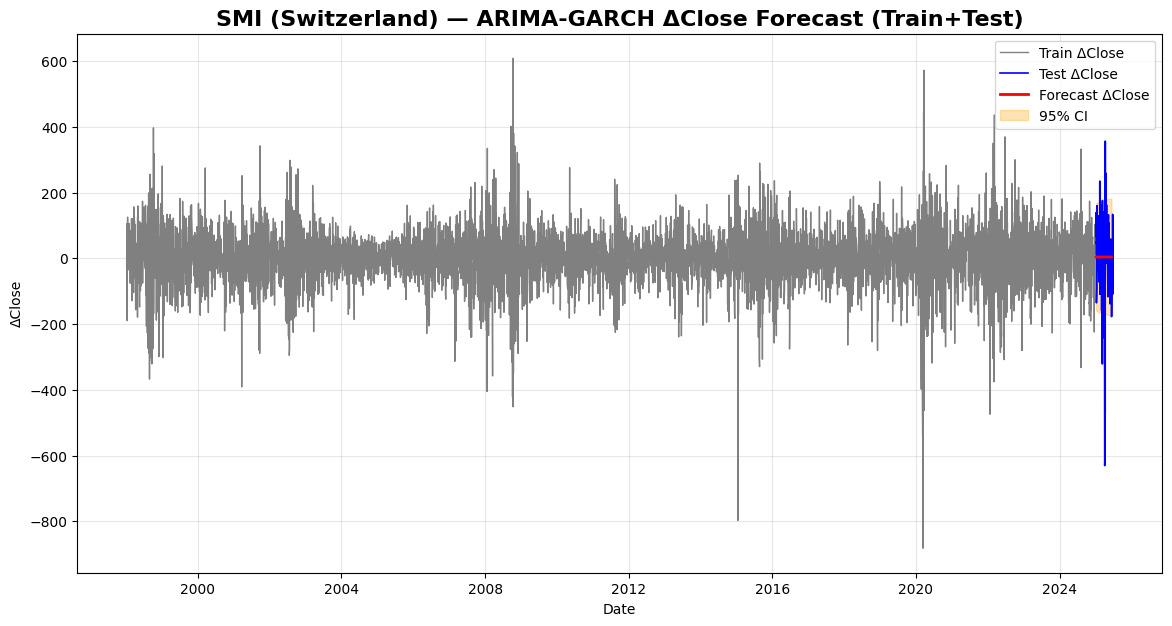

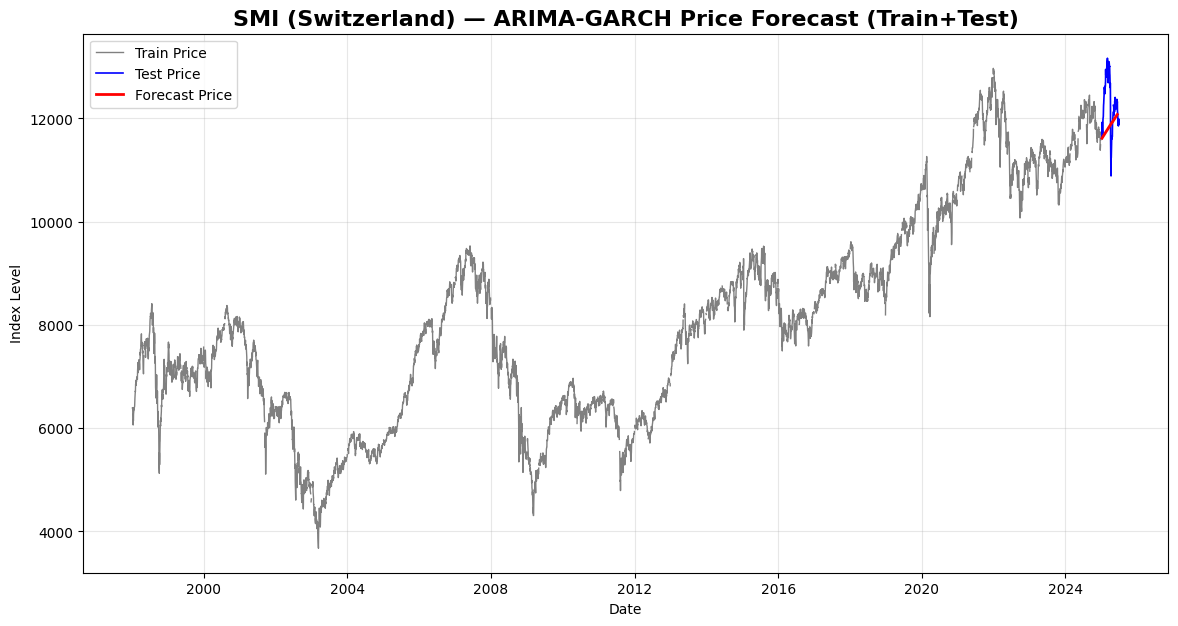

📊 Evaluation for SMI (Switzerland):
   RMSE ΔClose = 147.5068
   MAPE ΔClose = 100.6300%
   RMSE Price  = 785.3942
   MAPE Price  = 5.1989%

📋 Forecast Accuracy Summary (2025-H1):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


RMSE ΔClose  MAPE ΔClose   RMSE Price  MAPE Price
Series                                                              
CAC 40 (France)      93.032705     0.997933   457.338880    0.050008
DAX (Germany)       311.491824     0.990021  2455.627173    0.096495
FTSE 100 (UK)        85.233097     1.311793   364.933401    0.038258
SMI (Switzerland)   147.506759     1.006300   785.394223    0.051989

In [123]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ======================
# 1. Download Data
# ======================
tickers = {
    'CAC 40 (France)': '^FCHI',
    'DAX (Germany)': '^GDAXI',
    'FTSE 100 (UK)': '^FTSE',
    'SMI (Switzerland)': '^SSMI'
}

EUROPE_START_DATE = "1998-01-01"
EUROPE_END_DATE = "2024-12-31"
TEST_START_DATE = "2025-01-01"
TEST_END_DATE = "2025-06-30"

print(f"Downloading train data {EUROPE_START_DATE} → {EUROPE_END_DATE}...")
train_raw = yf.download(list(tickers.values()), start=EUROPE_START_DATE, end=EUROPE_END_DATE, progress=True)["Close"]

print(f"Downloading test data {TEST_START_DATE} → {TEST_END_DATE}...")
test_raw = yf.download(list(tickers.values()), start=TEST_START_DATE, end=TEST_END_DATE, progress=True)["Close"]

# Rename ticker symbols to friendly names
rename_map = {v: k for k, v in tickers.items()}
train_data = train_raw.rename(columns=rename_map)
test_data = test_raw.rename(columns=rename_map)

# Ensure consistent columns
common_cols = train_data.columns.intersection(test_data.columns)
train_data = train_data[common_cols]
test_data = test_data[common_cols]

# ======================
# 2. ΔClose (first difference)
# ======================
train_returns = train_data.diff().dropna()
test_returns = test_data.diff().dropna()

# ======================
# 3. Forecast Function
# ======================
def forecast_arima_garch(results_dict, series_name, train_prices, train_returns, test_prices, test_returns):
    """
    Forecast out-of-sample ΔClose and reconstruct price levels using fitted ARIMA-GARCH.
    """
    res = results_dict[series_name]
    steps = len(test_returns)

    forecast = res.forecast(horizon=steps)
    mean_fc = forecast.mean.iloc[-1].values
    var_fc = forecast.variance.iloc[-1].values
    vol_fc = np.sqrt(var_fc)

    # ΔClose forecast
    fc = pd.DataFrame({
        "Mean Forecast ΔClose": mean_fc,
        "Volatility Forecast": vol_fc,
        "Lower CI (95%) ΔClose": mean_fc - 1.96 * vol_fc,
        "Upper CI (95%) ΔClose": mean_fc + 1.96 * vol_fc,
        "Actual ΔClose": test_returns.values
    }, index=test_returns.index)

    # Price forecast
    last_train_price = train_prices.iloc[-1]
    cum_fc = np.cumsum(mean_fc)
    price_fc = last_train_price + cum_fc

    fc["Forecast Price"] = pd.Series(price_fc, index=test_prices.index[:steps])
    fc["Actual Price"] = test_prices.iloc[:steps].values

    return fc.dropna()

# ======================
# 4. Run Forecasts for All Indices
# ======================
summary_eval = []

for series_name in tickers.keys():
    print(f"\n🔮 Forecasting {series_name}...")

    # Forecast
    fc = forecast_arima_garch(arima_garch_results_all,
                              series_name,
                              train_data[series_name],
                              train_returns[series_name],
                              test_data[series_name],
                              test_returns[series_name])

    # --- Evaluation inline ---
    rmse_returns = np.sqrt(mean_squared_error(fc["Actual ΔClose"], fc["Mean Forecast ΔClose"]))
    mape_returns = mean_absolute_percentage_error(fc["Actual ΔClose"], fc["Mean Forecast ΔClose"])
    rmse_price = np.sqrt(mean_squared_error(fc["Actual Price"], fc["Forecast Price"]))
    mape_price = mean_absolute_percentage_error(fc["Actual Price"], fc["Forecast Price"])

    summary_eval.append({
        "Series": series_name,
        "RMSE ΔClose": rmse_returns,
        "MAPE ΔClose": mape_returns,
        "RMSE Price": rmse_price,
        "MAPE Price": mape_price
    })

    # --- Plot ΔClose forecast (Train+Test) ---
    plt.figure(figsize=(14,7))
    plt.plot(train_returns[series_name], label="Train ΔClose", color="gray", linewidth=1)
    plt.plot(test_returns[series_name], label="Test ΔClose", color="blue", linewidth=1.2)
    plt.plot(fc["Mean Forecast ΔClose"], label="Forecast ΔClose", color="red", linewidth=2)
    plt.fill_between(fc.index,
                     fc["Lower CI (95%) ΔClose"],
                     fc["Upper CI (95%) ΔClose"],
                     color="orange", alpha=0.3, label="95% CI")
    plt.title(f"{series_name} — ARIMA-GARCH ΔClose Forecast (Train+Test)", fontsize=16, fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("ΔClose")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # --- Plot Price forecast (Train+Test) ---
    plt.figure(figsize=(14,7))
    plt.plot(train_data[series_name], label="Train Price", color="gray", linewidth=1)
    plt.plot(test_data[series_name], label="Test Price", color="blue", linewidth=1.2)
    plt.plot(fc["Forecast Price"], label="Forecast Price", color="red", linewidth=2)
    plt.title(f"{series_name} — ARIMA-GARCH Price Forecast (Train+Test)", fontsize=16, fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Index Level")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # --- Print evaluation metrics clearly ---
    print(f"📊 Evaluation for {series_name}:")
    print(f"   RMSE ΔClose = {rmse_returns:.4f}")
    print(f"   MAPE ΔClose = {mape_returns:.4%}")
    print(f"   RMSE Price  = {rmse_price:.4f}")
    print(f"   MAPE Price  = {mape_price:.4%}")

# ======================
# 5. Summary Table
# ======================
eval_df = pd.DataFrame(summary_eval).set_index("Series")
print("\n📋 Forecast Accuracy Summary (2025-H1):")
display(eval_df)


## LTSM prediction

/tmp/ipython-input-363692391.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  train_raw = yf.download(list(tickers.values()), start=EUROPE_START_DATE, end=EUROPE_END_DATE, progress=True)["Close"]
[                       0%                       ]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b51cc101940>
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  r


🧠 Training LSTM on ΔClose — CAC 40 (France)
   Best val_loss: 1.118968


/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


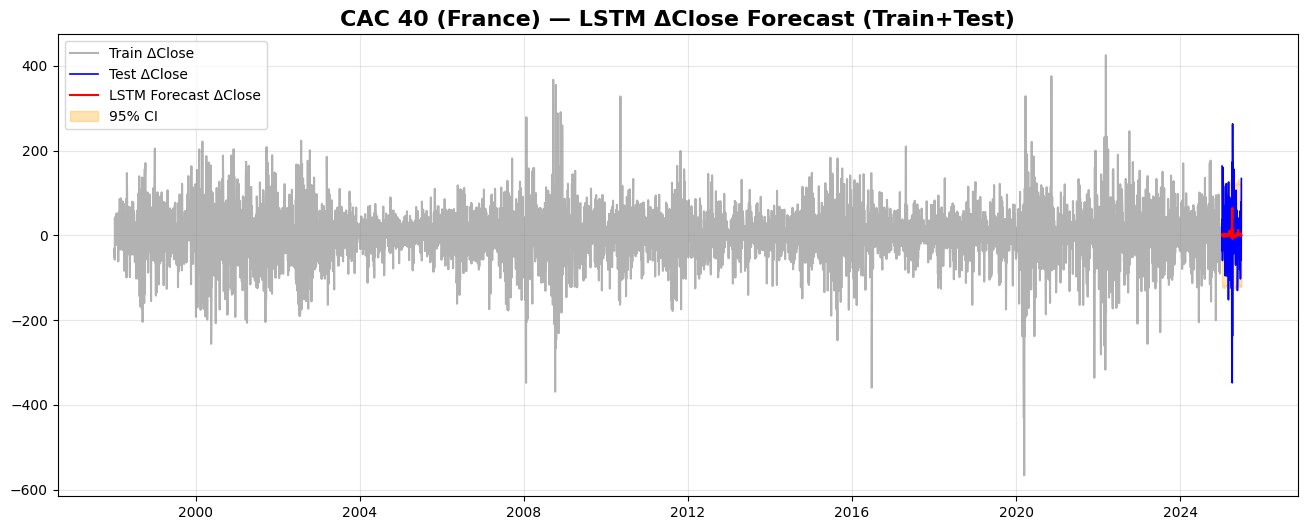

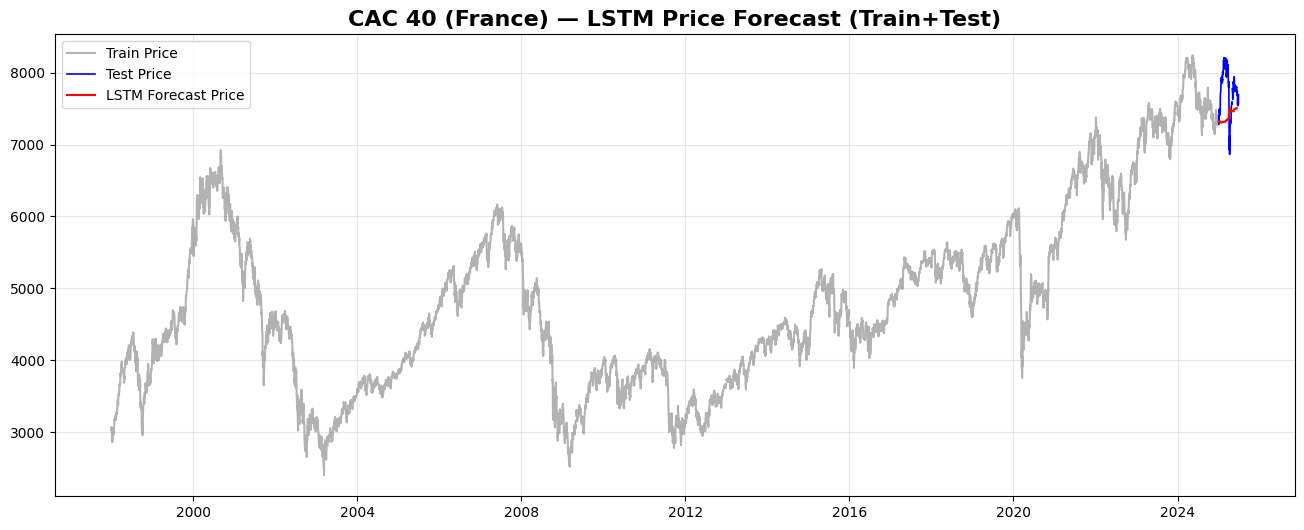

📊 Metrics for CAC 40 (France)
   RMSE (Price): 523.1903
   MAE  (Price): 459.0131

🧠 Training LSTM on ΔClose — FTSE 100 (UK)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


   Best val_loss: 0.756551


/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


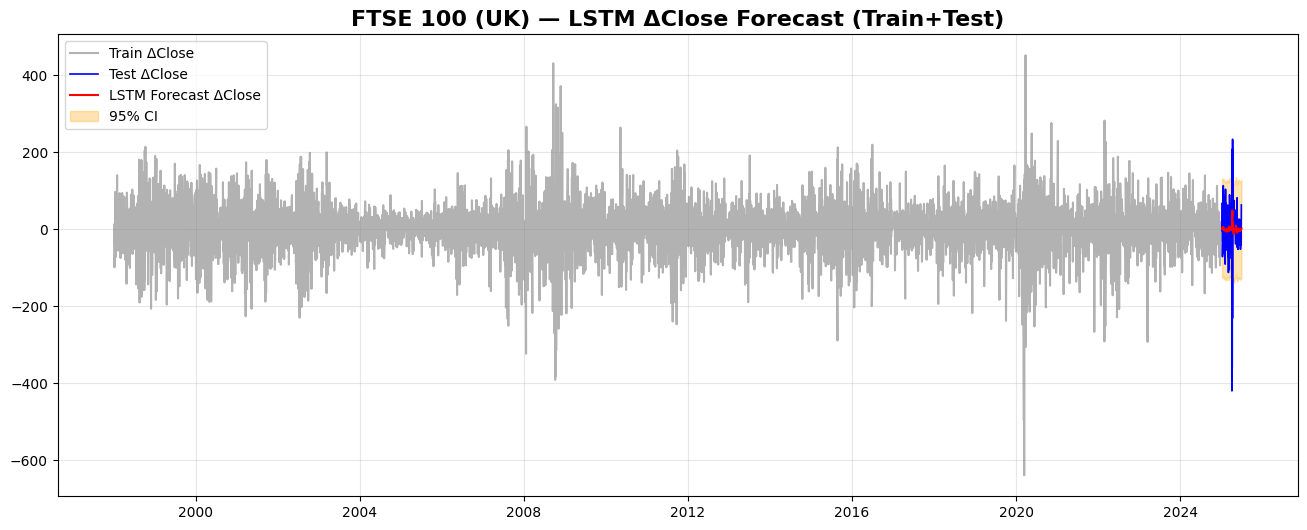

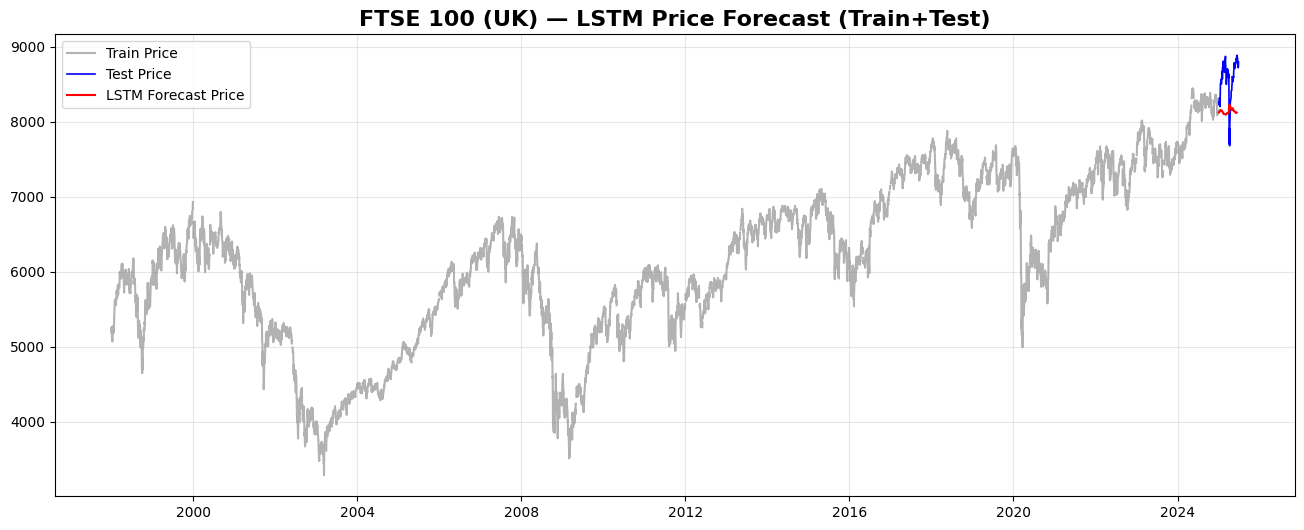

📊 Metrics for FTSE 100 (UK)
   RMSE (Price): 500.3255
   MAE  (Price): 462.3060

🧠 Training LSTM on ΔClose — DAX (Germany)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


   Best val_loss: 1.620345


/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


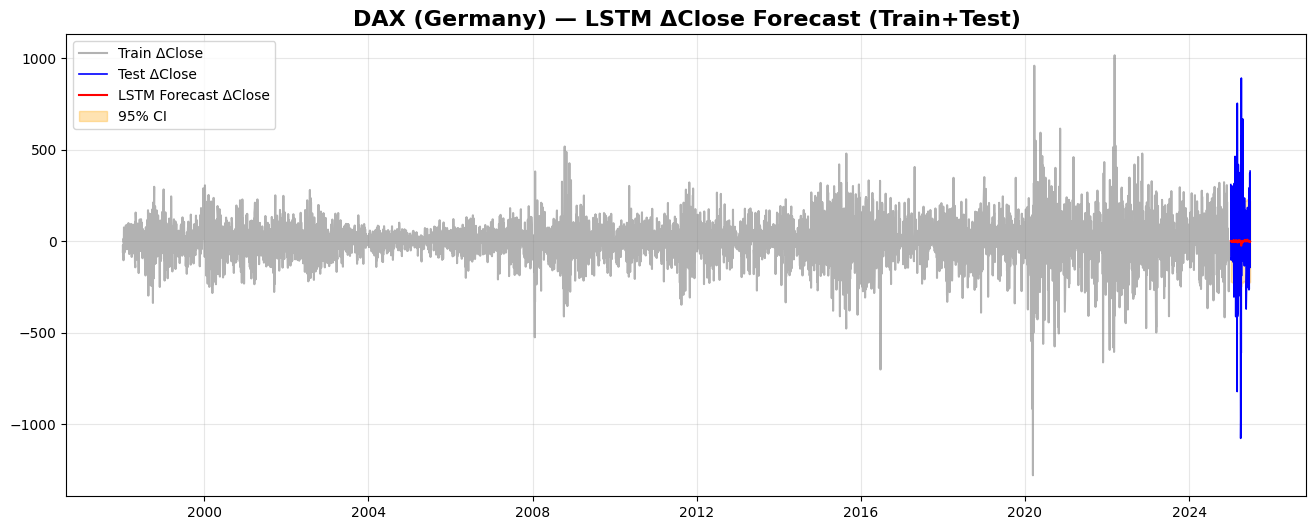

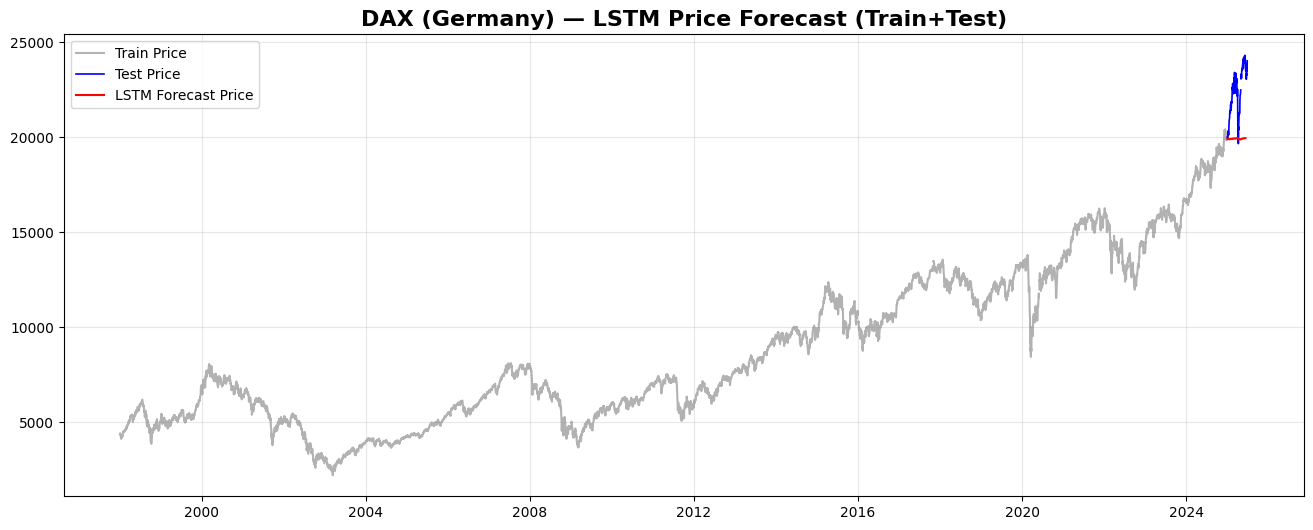

📊 Metrics for DAX (Germany)
   RMSE (Price): 2711.1612
   MAE  (Price): 2420.8712

🧠 Training LSTM on ΔClose — SMI (Switzerland)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


   Best val_loss: 1.046462


/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


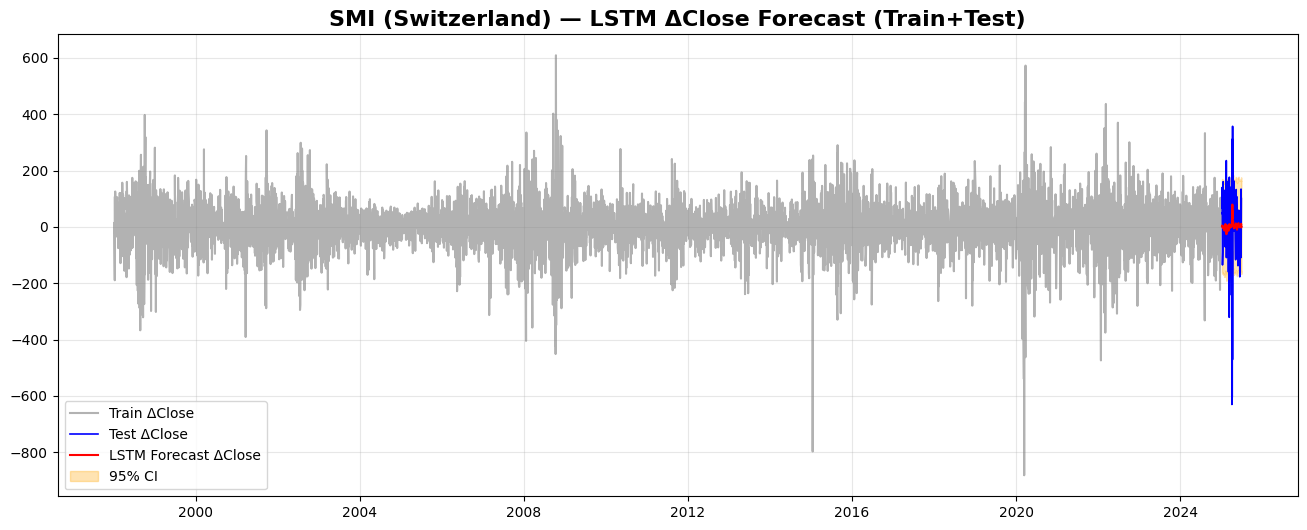

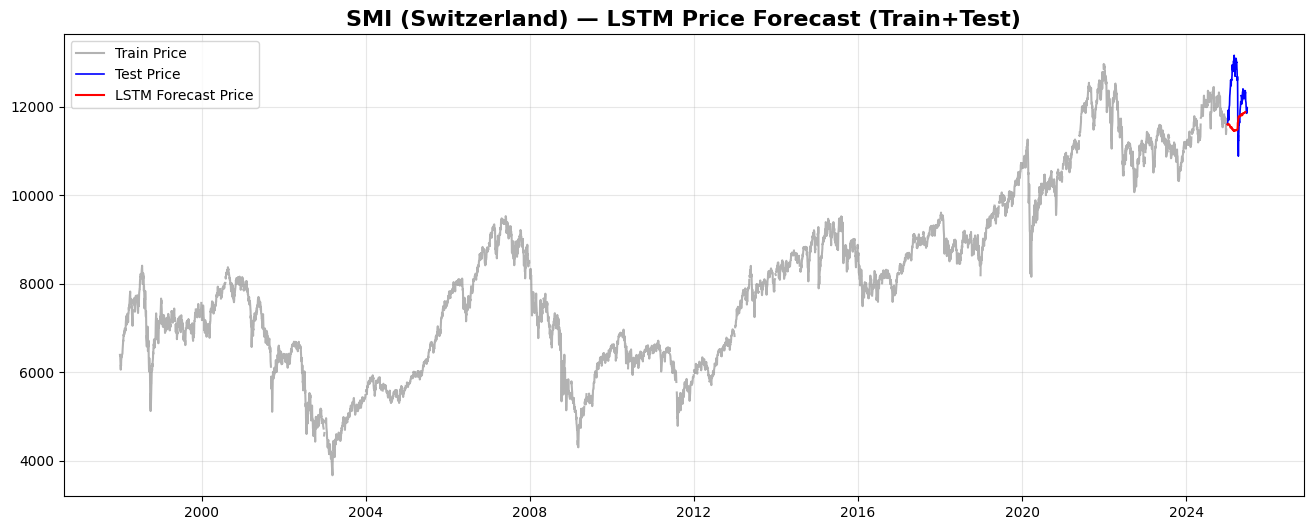

📊 Metrics for SMI (Switzerland)
   RMSE (Price): 937.4936
   MAE  (Price): 773.0619

📋 LSTM Forecast — Summary Metrics (Test 2025-H1)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


RMSE (Price)  MAE (Price)
Series                                      
CAC 40 (France)      523.190308   459.013094
FTSE 100 (UK)        500.325516   462.305983
DAX (Germany)       2711.161242  2420.871171
SMI (Switzerland)    937.493604   773.061937

In [124]:
# ===== LSTM for ΔClose Forecasting with Confidence Intervals =====
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------------------------------------------------
# 1) Data download
# ---------------------------------------------------------------------
tickers = {
    'CAC 40 (France)': '^FCHI',
    'DAX (Germany)': '^GDAXI',
    'FTSE 100 (UK)': '^FTSE',
    'SMI (Switzerland)': '^SSMI'
}

EUROPE_START_DATE = "1998-01-01"
EUROPE_END_DATE   = "2024-12-31"
TEST_START_DATE   = "2025-01-01"
TEST_END_DATE     = "2025-06-30"

print(f"Downloading train data {EUROPE_START_DATE} → {EUROPE_END_DATE}...")
train_raw = yf.download(list(tickers.values()), start=EUROPE_START_DATE, end=EUROPE_END_DATE, progress=True)["Close"]

print(f"Downloading test data {TEST_START_DATE} → {TEST_END_DATE}...")
test_raw  = yf.download(list(tickers.values()),  start=TEST_START_DATE,   end=TEST_END_DATE,   progress=True)["Close"]

# Rename ticker symbols → human-friendly names
rename_map = {v: k for k, v in tickers.items()}
train_px = train_raw.rename(columns=rename_map)
test_px  = test_raw.rename(columns=rename_map)

# Align columns
common_cols = train_px.columns.intersection(test_px.columns)
train_px = train_px[common_cols]
test_px  = test_px[common_cols]

# ---------------------------------------------------------------------
# 2) Compute ΔClose
# ---------------------------------------------------------------------
train_diff = train_px.diff().dropna()
test_diff  = test_px.diff().dropna()

# ---------------------------------------------------------------------
# 3) Helper: create sliding windows
# ---------------------------------------------------------------------
def make_sequences(series: pd.Series, seq_len: int):
    vals = series.values.astype(np.float32)
    X, y = [], []
    for i in range(seq_len, len(vals)):
        X.append(vals[i-seq_len:i])
        y.append(vals[i])
    X = np.array(X).reshape(-1, seq_len, 1)
    y = np.array(y).reshape(-1,)
    return X, y

# ---------------------------------------------------------------------
# 4) Helper: build compact LSTM
# ---------------------------------------------------------------------
def build_lstm(input_shape, units=64, dropout=0.2):
    model = Sequential([
        LSTM(units, input_shape=input_shape, return_sequences=False),
        Dropout(dropout),
        Dense(32, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mse")
    return model

# ---------------------------------------------------------------------
# 5) Train & evaluate per index
# ---------------------------------------------------------------------
SEQ_LEN = 60  # lookback window
summary_rows = []

for name in common_cols:
    print(f"\n🧠 Training LSTM on ΔClose — {name}")

    # a) Extract series
    train_series = train_diff[name].dropna()
    test_series  = test_diff[name].dropna()

    # b) Scale using train only
    scaler = StandardScaler()
    train_scaled = pd.Series(
        scaler.fit_transform(train_series.values.reshape(-1,1)).ravel(),
        index=train_series.index
    )
    test_scaled = pd.Series(
        scaler.transform(test_series.values.reshape(-1,1)).ravel(),
        index=test_series.index
    )

    # c) Sequences (train)
    X_train, y_train = make_sequences(train_scaled, SEQ_LEN)

    # d) Build & fit model
    model = build_lstm(input_shape=(SEQ_LEN,1), units=64, dropout=0.2)
    es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=0)
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=100,
        batch_size=64,
        callbacks=[es],
        verbose=0
    )
    print(f"   Best val_loss: {min(history.history['val_loss']):.6f}")

    # e) Rolling 1-step-ahead predictions
    last_window = train_scaled.values[-SEQ_LEN:].copy()
    preds_scaled = []
    for x in test_scaled.values:
        pred = model.predict(last_window.reshape(1, SEQ_LEN, 1), verbose=0)[0,0]
        preds_scaled.append(pred)
        last_window = np.append(last_window[1:], x)

    # f) Inverse scale predictions
    preds_diff = scaler.inverse_transform(np.array(preds_scaled).reshape(-1,1)).ravel()
    actual_diff = test_series.values

    # g) Estimate residual σ from train set for CI
    train_preds_scaled = model.predict(X_train, verbose=0).ravel()
    train_preds = scaler.inverse_transform(train_preds_scaled.reshape(-1,1)).ravel()
    resid = train_series.values[SEQ_LEN:] - train_preds
    sigma = np.std(resid)

    lower_diff = preds_diff - 1.96*sigma
    upper_diff = preds_diff + 1.96*sigma

    # h) Reconstruct price path with CI
    last_train_price = train_px[name].iloc[-1]
    pred_prices = last_train_price + np.cumsum(preds_diff)
    lower_prices = last_train_price + np.cumsum(lower_diff)
    upper_prices = last_train_price + np.cumsum(upper_diff)
    actual_prices = test_px[name].dropna().iloc[:len(preds_diff)].values  # ✅ fix NaN issue

    # -----------------------
    # i) Metrics
    # -----------------------
    if len(actual_prices) == len(pred_prices):
        rmse_price = np.sqrt(mean_squared_error(actual_prices, pred_prices))
        mae_price  = mean_absolute_error(actual_prices, pred_prices)
    else:
        print(f"⚠️ Skipping metrics for {name}: length mismatch (actual={len(actual_prices)}, pred={len(pred_prices)})")
        rmse_price, mae_price = np.nan, np.nan

    summary_rows.append({
        "Series": name,
        "RMSE (Price)": rmse_price,
        "MAE (Price)": mae_price
    })

    # -----------------------
    # j) Plots
    # -----------------------

    # ΔClose — Train + Test + Forecast
    plt.figure(figsize=(16,6))
    plt.plot(train_diff[name], color="gray", alpha=0.6, label="Train ΔClose")
    plt.plot(test_diff[name], color="blue", linewidth=1.2, label="Test ΔClose")
    plt.plot(test_diff.index[:len(preds_diff)], preds_diff, color="red", linewidth=1.5, label="LSTM Forecast ΔClose")
    plt.fill_between(test_diff.index[:len(preds_diff)], lower_diff, upper_diff, color="orange", alpha=0.3, label="95% CI")
    plt.title(f"{name} — LSTM ΔClose Forecast (Train+Test)", fontsize=16, fontweight="bold")
    plt.legend(); plt.grid(alpha=0.3)
    plt.show()

    # Price — Train + Test + Forecast
    plt.figure(figsize=(16,6))
    plt.plot(train_px[name], color="gray", alpha=0.6, label="Train Price")
    plt.plot(test_px[name], color="blue", linewidth=1.2, label="Test Price")
    plt.plot(test_px.index[:len(preds_diff)], pred_prices, color="red", linewidth=1.5, label="LSTM Forecast Price")
    plt.title(f"{name} — LSTM Price Forecast (Train+Test)", fontsize=16, fontweight="bold")
    plt.legend(); plt.grid(alpha=0.3)
    plt.show()

    # Print metrics neatly
    print(f"📊 Metrics for {name}")
    print(f"   RMSE (Price): {rmse_price:.4f}")
    print(f"   MAE  (Price): {mae_price:.4f}")

# ---------------------------------------------------------------------
# 6) Summary table
# ---------------------------------------------------------------------
summary_df = pd.DataFrame(summary_rows).set_index("Series")
print("\n📋 LSTM Forecast — Summary Metrics (Test 2025-H1)")
display(summary_df)
